This notebook has been used to analyze pre-processed neuroimaging data in the article "Obesity accelerates brain ageing: a multimodal imaging study". In particular, Grey Matter (GM) measures and White Matter (WM) measures, have been used to predict age and the obesity status following a machine learning approach.

In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # this module is useful to work with numerical arrays
import pandas as pd  # this module is useful to work with tabular data
import scipy  #thid module is useful to work with mathematical and statistical computations
from scipy import stats
import seaborn as sns  # plotting library
import sklearn  #this module allows to leverage models and techniques from the machine learning framework
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn import metrics
import plotly.express as px  #plotting library
import plotly.graph_objects as go
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# BRAIN RELATED DATA

In [2]:
brain_values = pd.ExcelFile('/content/drive/MyDrive/SC/CCO/WM_values.xlsx')
wm = pd.read_excel(brain_values, header=[0, 1])
gm = pd.read_excel(brain_values, 'GM_Pure')
glob_meas = pd.read_excel(brain_values, 'Global_Measures')

In [3]:
wm

Subjects Fractional Anysotropy (FA)                                    \
     Subjects                   Body_CC     Fornix   Genu_CC L_Ant_Cor_Rad   
0    CC110045                   0.814325  0.637251  0.835634      0.595523   
1    CC110069                   0.790589  0.623583  0.795406      0.541869   
2    CC110101                   0.825606  0.518415  0.836832      0.572077   
3    CC110187                   0.802544  0.546115  0.832048      0.553619   
4    CC110319                   0.827607  0.620511  0.846815      0.608742   
..        ...                        ...       ...       ...           ...   
530  CC722542                   0.718321  0.288346  0.740697      0.447570   
531  CC722651                   0.757914  0.278458  0.755473      0.496135   
532  CC722891                   0.766340  0.181183  0.762226      0.458749   
533  CC723197                   0.726466  0.287153  0.715600      0.403615   
534  CC723395                   0.802903  0.465190  0.811268      0.534051   

                                                                      ...  \
    L_Ant_Limb_Inter_Cap L_Cereb_Ped L_Cing_Hipp    L_Cing     L_CST  ...   
0               0.651053    0.809512    0.650254  0.705529  0.727232  ...   
1               0.652176    0.834385    0.590712  0.713626  0.681640  ...   
2               0.640604    0.796912    0.587068  0.721470  0.687734  ...   
3               0.690804    0.843346    0.564802  0.706909  0.713817  ...   
4               0.681399    0.829788    0.629604  0.755576  0.797379  ...   
..                   ...         ...         ...       ...       ...  ...   
530             0.612258    0.720094    0.514259  0.653632  0.652662  ...   
531             0.663692    0.799258    0.575097  0.672443  0.759497  ...   
532             0.629829    0.808772    0.569585  0.677044  0.706099  ...   
533             0.575925    0.761030    0.531030  0.650542  0.763233  ...   
534             0.650975    0.780948    0.552760  0.742935  0.678157  ...   

    Radial Diffusivity (RD)                                           \
            R_Post_Thal_Rad R_Retrol_Inter_Cap R_Sag_Strat    R_SFOF   
0                  0.000281           0.000261    0.000280  0.000299   
1                  0.000270           0.000239    0.000268  0.000312   
2                  0.000270           0.000261    0.000281  0.000291   
3                  0.000259           0.000255    0.000281  0.000318   
4                  0.000261           0.000249    0.000303  0.000286   
..                      ...                ...         ...       ...   
530                0.000416           0.000322    0.000370  0.000396   
531                0.000317           0.000284    0.000349  0.000368   
532                0.000338           0.000304    0.000369  0.000358   
533                0.000404           0.000379    0.000420  0.000432   
534                0.000309           0.000290    0.000327  0.000413   

                                                                              
        R_SLF R_Sup_Cereb_Ped R_Sup_Cor_Rad   R_Tapet R_Unc_Fasc Splenium_CC  
0    0.000311        0.000227      0.000296  0.000327   0.000380    0.000121  
1    0.000304        0.000231      0.000304  0.000303   0.000349    0.000137  
2    0.000311        0.000232      0.000300  0.000338   0.000317    0.000137  
3    0.000308        0.000201      0.000314  0.000281   0.000321    0.000130  
4    0.000302        0.000204      0.000290  0.000305   0.000333    0.000126  
..        ...             ...           ...       ...        ...         ...  
530  0.000407        0.000216      0.000448  0.000554   0.000444    0.000194  
531  0.000342        0.000199      0.000352  0.000402   0.000403    0.000166  
532  0.000319        0.000185      0.000316  0.000610   0.000442    0.000183  
533  0.000366        0.000194      0.000397  0.000735   0.000366    0.000197  
534  0.000305        0.000147      0.000342  0.000348   0.000388    0.000124  

[535 rows x 196 columns

In [4]:
gm

Subjects     Ang_Gyrus    Cent_Operc      Cing_Ant     Cing_Post  \
0    CC110045  11534.008250   8268.005914  10733.007677   9075.006491   
1    CC110069   8279.003948   7803.003721   8714.004155   9382.004474   
2    CC110101  12618.006017  10942.005218   9518.004539  11043.005266   
3    CC110187   9517.006807   6149.004398  10235.007321   9977.007136   
4    CC110319  10258.004891  10641.005074  11367.005420  13101.006247   
..        ...           ...           ...           ...           ...   
530  CC722542   6936.993798   5920.994706  10716.990418   7255.993513   
531  CC722651   6629.995258   5419.996123   9011.993554   6103.995634   
532  CC722891   5494.000655   4262.000508   9545.001138   7054.000841   
533  CC723197   7345.005254   6377.004561   7950.005686   6960.004978   
534  CC723395   5342.999363   5742.999315   8076.999037   8011.999045   

          Cuneus  Frontal_Pole  Front_Operc  Heschl_Gyrus     IFG_Oper  ...  \
0    4434.003171  52137.037291  4035.002886   2440.001745  5966.004267  ...   
1    3534.001685  57204.027277  2831.001350   2691.001283  4351.002075  ...   
2    4394.002095  57135.027244  3451.001646   3146.001500  4831.002304  ...   
3    5904.004223  58015.041496  3546.002536   1986.001420  4868.003482  ...   
4    5161.002461  69014.032908  3623.001728   4011.001913  5582.002662  ...   
..           ...           ...          ...           ...          ...  ...   
530  3151.997182  42334.962150  2471.997790   1554.998610  2801.997495  ...   
531  2301.998353  37997.972822  2108.998492   1683.998796  2958.997884  ...   
532  2700.000322  34399.004101  2076.000247   1024.000122  3195.000381  ...   
533  2700.001931  37346.026712  1998.001429   1196.000855  3246.002322  ...   
534  2094.999750  39288.995316  1916.999771   1283.999847  3129.999627  ...   

              SPL      STA_Ant     STS_Post  Subcallosal  Sup_Front_Gyrus  \
0     9679.006923  2423.001733  8098.005792  5111.003656     22453.016060   
1     7047.003360  2841.001355  7908.003771  4263.002033     17222.008212   
2     7501.003577  2385.001137  9365.004466  4039.001926     17526.008357   
3    10330.007389  1887.001350  7282.005208  4647.003324     20415.014602   
4    11005.005248  2747.001310  9632.004593  5840.002785     24957.011900   
..            ...          ...          ...          ...              ...   
530   8011.992837  1912.998290  4947.995576  4747.995755     13609.987832   
531   6627.995259  1688.998792  4380.996866  3443.997537     12892.990778   
532   6195.000739  1432.000171  3424.000408  3896.000464     12184.001452   
533   5467.003910  1556.001113  5165.003694  3278.002345     15990.011437   
534   7651.999088  1646.999804  4241.999494  3464.999587     11356.998646   

       Supracalc     Temp_Pole      TFC_Ant     TFC_Post          TOF  
0    1131.000809  16052.011481  2432.001740  7244.005181  7694.005503  
1    1185.000565  17918.008544  2470.001178  6828.003256  7587.003618  
2    1456.000694  16986.008100  1807.000862  7414.003535  6680.003185  
3    1246.000891  19795.014158  2814.002013  6875.004917  5369.003840  
4    1351.000644  18663.008899  2839.001354  8696.004147  6049.002884  
..           ...           ...          ...          ...          ...  
530   591.999471  15501.986140  2078.998141  5639.994957  5117.995424  
531   549.999607  14031.989964  1787.998721  4687.996647  3918.997197  
532   587.000070  11202.001335  1425.000170  4176.000498  4843.000577  
533   809.000579  14199.010156  1589.001137  5030.003598  4405.003151  
534   423.999949  11920.998579  1361.999838  4994.999405  4691.999441  

[535 rows x 49 columns]

In [5]:
glob_meas

Subjects    Tot_Brain       CSF    Unnamed: 3      Gray    Unnamed: 5  \
0    CC110045  1624748.125  0.740164  471354.34375  0.748789  9.448517e+05   
1    CC110069  1623859.750  0.747043  557124.25000  0.714856  9.097974e+05   
2    CC110101  1810440.750  0.718994  509974.25000  0.704939  1.041026e+06   
3    CC110187  1528032.125  0.709024  435071.31250  0.742676  9.102016e+05   
4    CC110319  1815117.750  0.738380  527219.25000  0.749730  1.050794e+06   
..        ...          ...       ...           ...       ...           ...   
530  CC722542  1706577.375  0.791380  671252.43750  0.688105  8.516582e+05   
531  CC722651  1572468.875  0.798651  657687.56250  0.674530  7.704074e+05   
532  CC722891  1607608.250  0.785513  652404.12500  0.641553  7.854191e+05   
533  CC723197  1636085.125  0.768728  624695.43750  0.677153  8.533846e+05   
534  CC723395  1550659.875  0.783495  595213.93750  0.662664  7.634729e+05   

        White   Unnamed: 7     CSF_Corr    Gray_Corr   White_Corr  
0    0.805832  705326.5000  348879.5165  707494.5502  568374.6641  
1    0.820771  678983.3750  416195.7711  650374.1123  557289.8637  
2    0.794156  893920.3750  366668.4259  733860.1799  709912.2293  
3    0.821005  662079.5000  308476.0023  675984.9020  543570.5799  
4    0.827891  770655.3750  389288.1498  787811.4108  638018.6491  
..        ...          ...          ...          ...          ...  
530  0.812365  725451.3125  531215.7540  586030.3001  589331.2555  
531  0.808975  652112.5625  525262.8295  519662.9288  527542.7602  
532  0.821886  719380.0625  512471.9214  503887.9558  591248.4020  
533  0.797230  725000.5625  480220.8743  577871.9590  577992.1984  
534  0.810029  714031.9375  466347.1440  505926.0307  578386.5763  

[535 rows x 11 columns]

In [6]:
tot_brain = glob_meas.Tot_Brain
tot_brain

0      1624748.125
1      1623859.750
2      1810440.750
3      1528032.125
4      1815117.750
          ...     
530    1706577.375
531    1572468.875
532    1607608.250
533    1636085.125
534    1550659.875
Name: Tot_Brain, Length: 535, dtype: float64

##Measures of WM

### Data used

In [7]:
data_types = ['Fractional Anysotropy (FA)', 'Mean Diffusivity (MD)', 'Axial Diffusivity (L1)',
              'Radial Diffusivity (RD)']
wm_type = data_types[0]
wm[wm_type]

Body_CC     Fornix   Genu_CC  L_Ant_Cor_Rad  L_Ant_Limb_Inter_Cap  \
0    0.814325  0.637251  0.835634       0.595523              0.651053   
1    0.790589  0.623583  0.795406       0.541869              0.652176   
2    0.825606  0.518415  0.836832       0.572077              0.640604   
3    0.802544  0.546115  0.832048       0.553619              0.690804   
4    0.827607  0.620511  0.846815       0.608742              0.681399   
..        ...       ...       ...            ...                   ...   
530  0.718321  0.288346  0.740697       0.447570              0.612258   
531  0.757914  0.278458  0.755473       0.496135              0.663692   
532  0.766340  0.181183  0.762226       0.458749              0.629829   
533  0.726466  0.287153  0.715600       0.403615              0.575925   
534  0.802903  0.465190  0.811268       0.534051              0.650975   

     L_Cereb_Ped  L_Cing_Hipp    L_Cing     L_CST  L_Ext_Cap  ...  \
0       0.809512     0.650254  0.705529  0.727232   0.509496  ...   
1       0.834385     0.590712  0.713626  0.681640   0.537587  ...   
2       0.796912     0.587068  0.721470  0.687734   0.522364  ...   
3       0.843346     0.564802  0.706909  0.713817   0.568547  ...   
4       0.829788     0.629604  0.755576  0.797379   0.522422  ...   
..           ...          ...       ...       ...        ...  ...   
530     0.720094     0.514259  0.653632  0.652662   0.473072  ...   
531     0.799258     0.575097  0.672443  0.759497   0.494968  ...   
532     0.808772     0.569585  0.677044  0.706099   0.491257  ...   
533     0.761030     0.531030  0.650542  0.763233   0.484108  ...   
534     0.780948     0.552760  0.742935  0.678157   0.504551  ...   

     R_Retrol_Inter_Cap  R_Sag_Strat    R_SFOF     R_SLF  R_Sup_Cereb_Ped  \
0              0.685546     0.671573  0.574164  0.601784         0.734931   
1              0.726512     0.698504  0.568906  0.619200         0.742266   
2              0.685873     0.679480  0.578421  0.605158         0.722013   
3              0.692628     0.663883  0.570451  0.604128         0.769561   
4              0.701167     0.649057  0.619917  0.615675         0.750472   
..                  ...          ...       ...       ...              ...   
530            0.627883     0.581721  0.492354  0.516825         0.738032   
531            0.676944     0.612193  0.513711  0.585360         0.785865   
532            0.663833     0.616930  0.557981  0.615323         0.797622   
533            0.601333     0.578612  0.489186  0.584216         0.794497   
534            0.674598     0.654351  0.497263  0.627916         0.847231   

     R_Sup_Cor_Rad   R_Tapet  R_Unc_Fasc  Splenium_CC  Splenium_CC.1  
0         0.602587  0.673611    0.564048     0.875898            NaN  
1         0.569911  0.680808    0.594092     0.864956            NaN  
2         0.592789  0.639964    0.635357     0.857631            NaN  
3         0.567197  0.720531    0.637246     0.869043            NaN  
4         0.603624  0.694742    0.617324     0.868982            NaN  
..             ...       ...         ...          ...            ...  
530       0.454040  0.486848    0.480121     0.806981            NaN  
531       0.583914  0.643419    0.529639     0.842114            NaN  
532       0.626589  0.440394    0.519358     0.828918            NaN  
533       0.553051  0.493394    0.610413     0.814529            NaN  
534       0.551077  0.693902    0.604800     0.879137            NaN  

[535 rows x 49 columns]

Let's create an array for each specific WM measure containing values for all brain regions of the whole sample. N.B. the last values has to been removed.

In [8]:
if wm_type == data_types[3]:
    wm_values = np.array([wm[wm_type].iloc[s].values for s in range(wm[wm_type].shape[0])])
else:
    wm_values = np.array([wm[wm_type].iloc[s].values[0:-1] for s in range(wm[wm_type].shape[0])])
print('The white matter measure that is gonna be used is: ' + wm_type)
print(wm_values.shape)

The white matter measure that is gonna be used is: Fractional Anysotropy (FA)
(535, 48)


##Measure of GM

Let's create an array containing all the GM volumes for all brain regions of the whole sample standardized.

In [9]:
gm.iloc[0].values

array(['CC110045', np.float64(11534.00825), np.float64(8268.005914),
       np.float64(10733.007677), np.float64(9075.006491),
       np.float64(4434.003171), np.float64(52137.037291),
       np.float64(4035.002886), np.float64(2440.001745),
       np.float64(5966.004267), np.float64(5466.00391),
       np.float64(11048.007902), np.float64(3315.002371),
       np.float64(2973.002126), np.float64(7184.005138),
       np.float64(5340.003819), np.float64(14981.010715),
       np.float64(33446.023922), np.float64(9556.006835),
       np.float64(4332.003098), np.float64(17504.01252),
       np.float64(3223.002305), np.float64(10653.00762),
       np.float64(9209.006587), np.float64(7768.005556),
       np.float64(13877.009926), np.float64(11999.008582),
       np.float64(13149.009405), np.float64(5145.00368),
       np.float64(2986.002136), np.float64(3931.002812),
       np.float64(3102.002219), np.float64(3100.002217),
       np.float64(22561.016137), np.float64(28501.020386),
       np.f

In [10]:
gm_values = np.array([gm.iloc[s].values[1:] / tot_brain[s] for s in
                      range(gm.shape[0])])  #the 1st value is taken out because it's the subject's ID
print(gm_values.shape)

(535, 48)


# OTHER DATA

Other variables are stored in the next dataframe:

In [11]:
data = pd.read_excel('drive/MyDrive/SC/CCO/For_Marco.xlsx')
data

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
0    CC110045  24.50         100          4    1         90.5          63.5   
1    CC110069  28.67         -58          4    1         94.5          61.5   
2    CC110101  23.33          63          4    0        108.5          63.0   
3    CC110187  25.25        -100          4    1        116.0          71.5   
4    CC110319  28.42         100          4    1        104.0          50.5   
..        ...    ...         ...        ...  ...          ...           ...   
530  CC722542  79.33         100          4    0        149.5          72.0   
531  CC722651  79.83         100          1    1        122.5          63.5   
532  CC722891  84.42          89          0    1        136.5          73.0   
533  CC723197  80.08         100          4    1        186.0          94.0   
534  CC723395  86.08          90          3    1        102.0          50.5   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12  \
0          61.5  21.66    30      1          NaN         Sex   
1          62.0  22.09    28      1          NaN       Group   
2          78.5  20.39    30      1          NaN         NaN   
3          79.0  21.52    30      1          NaN         NaN   
4          48.5  24.23    30      1          NaN         NaN   
..          ...    ...   ...    ...          ...         ...   
530        51.0  30.96    30      3          NaN         NaN   
531        60.5  22.46    28      1          NaN         NaN   
532        76.0  26.11    26      2          NaN         NaN   
533        64.0  22.72    29      1          NaN         NaN   
534        68.0  30.85    28      3          NaN         NaN   

          Unnamed: 13 Unnamed: 14            Unnamed: 15  Unnamed: 16  \
0              0=Male    1=Female                    NaN          NaN   
1    1= Normal weight         NaN  2=Slightly overweight          NaN   
2                 NaN         NaN                    NaN          NaN   
3                 NaN         NaN                    NaN          NaN   
4                 NaN         NaN                    NaN          NaN   
..                ...         ...                    ...          ...   
530               NaN         NaN                    NaN          NaN   
531               NaN         NaN                    NaN          NaN   
532               NaN         NaN                    NaN          NaN   
533               NaN         NaN                    NaN          NaN   
534               NaN         NaN                    NaN          NaN   

    Unnamed: 17  
0           NaN  
1       3=Obese  
2           NaN  
3           NaN  
4           NaN  
..          ...  
530         NaN  
531         NaN  
532         NaN  
533         NaN  
534         NaN  

[535 rows x 18 columns]

The sample will be split in 3 groups:


1.   Normal weight
2.   Sligtly overweight
3.   Obese

Only the first and the last ones will be taken into account within this study.



In [12]:
norm_weight_ss = data[data['Group'] == 1]
slight_overweight_ss = data[data['Group'] == 2]
obese_ss = data[data['Group'] == 3]

print('there are', len(norm_weight_ss), 'normal weight subjects ')
print('there are', len(slight_overweight_ss), 'slight overweight subjects ')
print('there are', len(obese_ss), 'obese subjects ')

there are 261 normal weight subjects 
there are 183 slight overweight subjects 
there are 91 obese subjects 


In [13]:
print('NW min BMI', norm_weight_ss.BMI.min())
print('NW max BMI', norm_weight_ss.BMI.max())
print('OB min BMI', obese_ss.BMI.min())
print('OB max BMI', obese_ss.BMI.max())

NW min BMI 18.55
NW max BMI 24.98
OB min BMI 30.01
OB max BMI 48.32


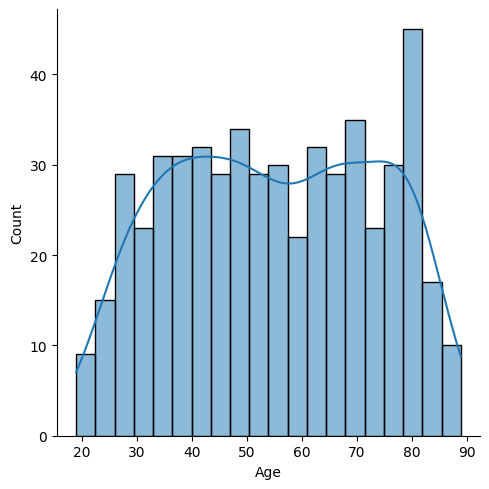

In [14]:
sns.displot(data=data, x='Age', bins=20, kde=True)

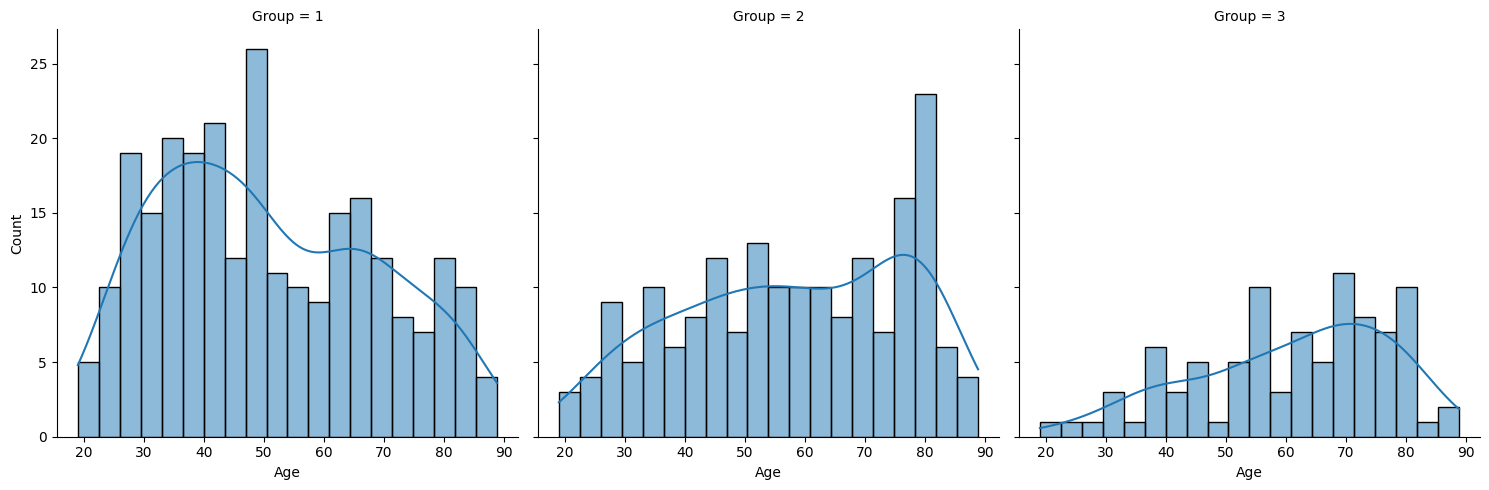

In [15]:
sns.displot(data=data, x='Age', col='Group', bins=20, kde=True)

In [16]:
print('###### NORM WEIGHT ######')
print('\n#### AGE #####')
print(norm_weight_ss.Age.mean())
print(norm_weight_ss.Age.std())

print('\n#### EDUCATION #####')
print(norm_weight_ss.Education.mean())
print(norm_weight_ss.Education.std())
print('\n#### MMSE #####')
print(norm_weight_ss.MMSE.mean())
print(norm_weight_ss.MMSE.std())
print('\n#### GENDER #####\n')
print(norm_weight_ss.Sex.mean())
print(norm_weight_ss.Sex.std())
print(norm_weight_ss.Sex.sum())
print('\n')
print('\n###### OBESE ######')
print('\n#### AGE #####')
print(obese_ss.Age.mean())
print(obese_ss.Age.std())
print('\n#### EDUCATION #####')
print(obese_ss.Education.mean())
print(obese_ss.Education.std())
print('\n#### MMSE #####')
print(obese_ss.MMSE.mean())
print(obese_ss.MMSE.std())
print('\n#### GENDER #####\n')
print(obese_ss.Sex.mean())
print(obese_ss.Sex.std())
print(obese_ss.Sex.sum())

print('\n#####################')
print(stats.ttest_ind(norm_weight_ss.Age, obese_ss.Age))
print(stats.ttest_ind(norm_weight_ss.Education, obese_ss.Education))
print(stats.ttest_ind(norm_weight_ss.MMSE, obese_ss.MMSE))

###### NORM WEIGHT ######

#### AGE #####
50.58030651340996
18.019438305029517

#### EDUCATION #####
3.5134099616858236
0.9946067354528006

#### MMSE #####
29.011494252873565
1.2724378740182474

#### GENDER #####

0.5210727969348659
0.5005155020148199
136



###### OBESE ######

#### AGE #####
60.94241758241758
16.113082768749635

#### EDUCATION #####
2.8241758241758244
1.442169712569737

#### MMSE #####
28.373626373626372
1.4579159528309327

#### GENDER #####

0.5824175824175825
0.4958927766258002
53

#####################
TtestResult(statistic=np.float64(-4.8502589277338615), pvalue=np.float64(1.8587174495148842e-06), df=np.float64(350.0))
TtestResult(statistic=np.float64(5.024447824134182), pvalue=np.float64(8.067896531728956e-07), df=np.float64(350.0))
TtestResult(statistic=np.float64(3.9615545668603778), pvalue=np.float64(9.02524197613552e-05), df=np.float64(350.0))


# OBESE-MATCHED SPLIT

In this section the obese group (O) and a control sample of norm-weight (NWc) subjects matched by age, gender and education with O will be used as test groups. The remaining norm-weighted subjects and the entire set of slight overweigt individuals (SOW) will be used for training the model. Therefore, in this section an out-of-sample prediction is conducted.

In [17]:
#MATCH AGE GENDER & EDUCATION
if True:  #False True
    obese_ss = data[data.Group == 3]
    ob_indexes = []
    match_indexes = []
    norm_sample = norm_weight_ss
    ob_excluded = []
    for i in range(obese_ss.shape[0]):
        norm_match = (np.abs(norm_sample[(norm_sample.Sex == obese_ss.iloc[i]['Sex'])
                                         & (np.abs(norm_sample.Education - obese_ss.iloc[i]['Education']) <= 1)].Age -
                             obese_ss.iloc[i]['Age']).sort_values())
        if np.abs(norm_match.iloc[0]) <= 5:
            match_ind = norm_match.index[0]
            ob_indexes.append(i)
            match_indexes.append(match_ind)
            norm_sample = norm_sample.drop(match_ind)
        else:
            ob_excluded.append(i)
    norm_test = norm_weight_ss.loc[match_indexes]
    obese_ss_df = obese_ss
    obese_ss = obese_ss.iloc[ob_indexes]
    excluded_obese = obese_ss.iloc[ob_excluded]
    ob_age = obese_ss.Age

In [18]:
excluded_obese

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
62   CC220198  37.42         100          4    1        116.5          81.5   
179  CC320621  46.08         100          4    1        118.0          72.5   
243  CC420061  57.17         100          4    0        157.0          99.5   
255  CC420162  52.00         100          3    1        111.5          82.0   
268  CC420231  54.67          68          4    0        140.0          94.0   
303  CC510258  59.58         100          4    0        102.0          61.0   
443  CC620549  73.67         100          4    1        115.0          67.0   
445  CC620560  72.50          88          4    0        129.0          76.0   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12 Unnamed: 13  \
62         59.0  31.82    26      3          NaN         NaN         NaN   
179        54.0  34.44    28      3          NaN         NaN         NaN   
243        78.0  32.28    26      3          NaN         NaN         NaN   
255        69.5  30.65    28      3          NaN         NaN         NaN   
268        77.5  34.60    29      3          NaN         NaN         NaN   
303        60.0  38.34    30      3          NaN         NaN         NaN   
443        61.0  31.43    29      3          NaN         NaN         NaN   
445        70.5  30.72    28      3          NaN         NaN         NaN   

    Unnamed: 14 Unnamed: 15  Unnamed: 16 Unnamed: 17  
62          NaN         NaN          NaN         NaN  
179         NaN         NaN          NaN         NaN  
243         NaN         NaN          NaN         NaN  
255         NaN         NaN          NaN         NaN  
268         NaN         NaN          NaN         NaN  
303         NaN         NaN          NaN         NaN  
443         NaN         NaN          NaN         NaN  
445         NaN         NaN          NaN         NaN

In [19]:
print('NWc group has size:', norm_test.shape)
print('O group has size:', obese_ss.shape)

NWc group has size: (83, 18)
O group has size: (83, 18)


##Data distribution (NWc vs O)

Let's plot the distributions of the other variables in the O vs NWc sample.

In [20]:
n_bins = 10
bins_sample = pd.cut(data.Age, bins=n_bins, retbins=True)[1]
bins_sample

array([18.93008, 25.992  , 32.984  , 39.976  , 46.968  , 53.96   ,
       60.952  , 67.944  , 74.936  , 81.928  , 88.92   ])

(0.0, 21.0)

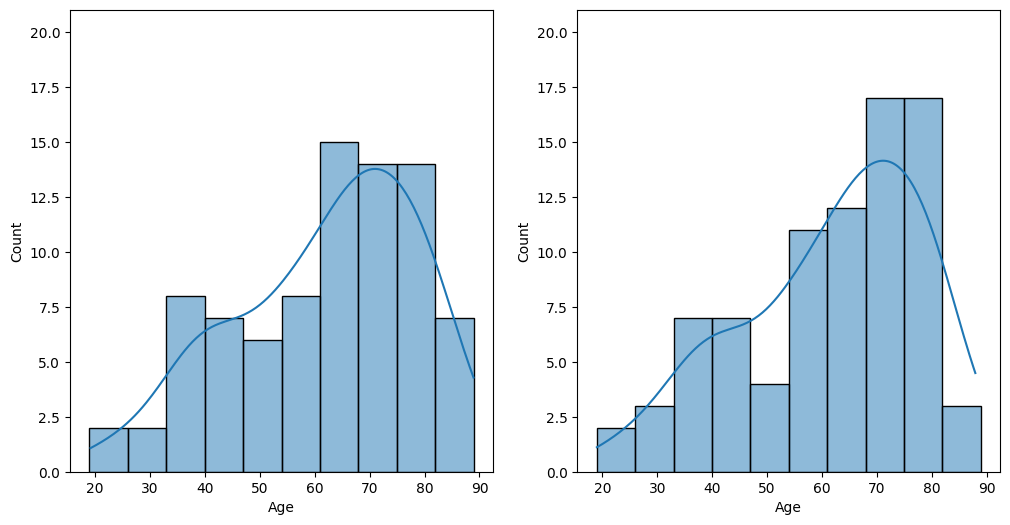

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='Age', bins=bins_sample, kde=True, ax=axes[0])
sns.histplot(data=obese_ss, x='Age', bins=bins_sample, kde=True, ax=axes[1])
axes[0].set_ylim([0, 21])
axes[1].set_ylim([0, 21])

(0.0, 70.0)

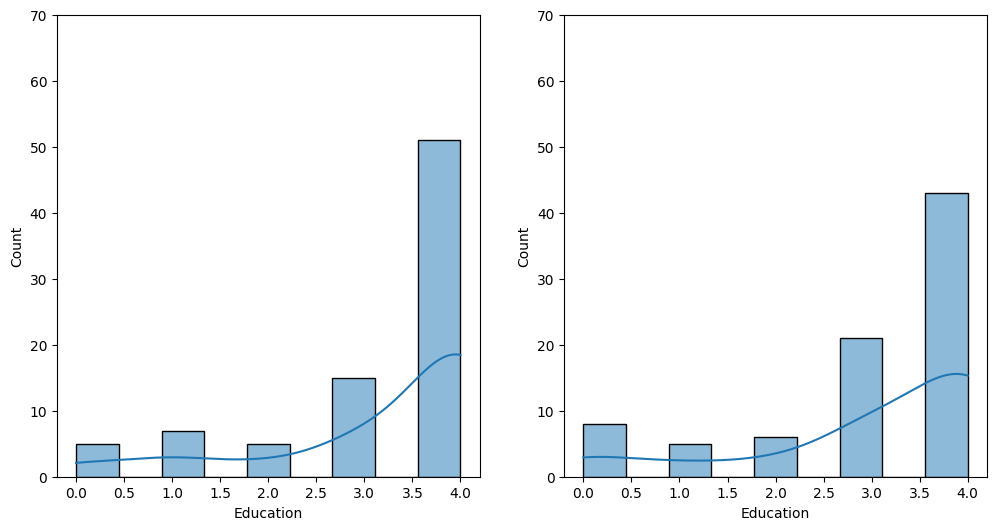

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='Education', kde=True, ax=axes[0])
sns.histplot(data=obese_ss, x='Education', kde=True, ax=axes[1])
axes[0].set_ylim([0, 70])
axes[1].set_ylim([0, 70])

(0.0, 45.0)

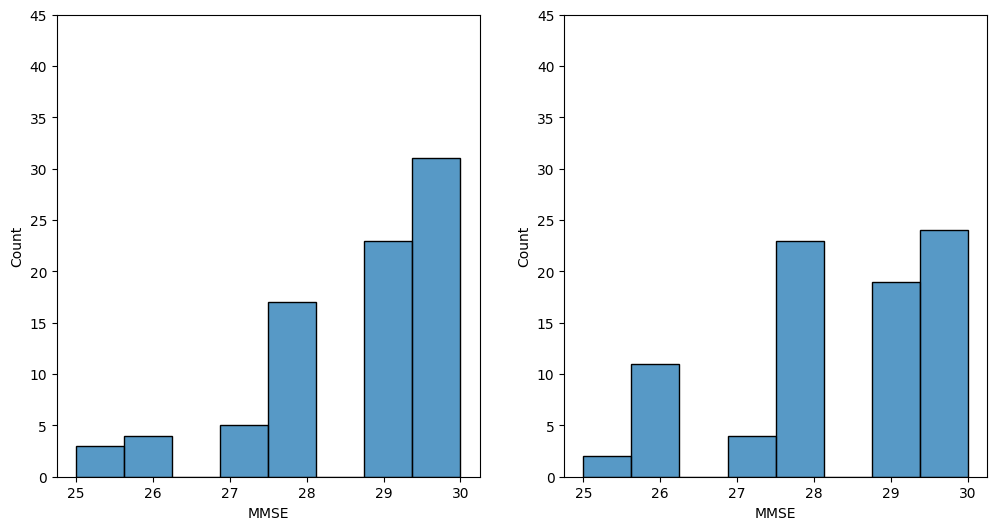

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=norm_test, x='MMSE', ax=axes[0])
sns.histplot(data=obese_ss, x='MMSE', ax=axes[1])
axes[0].set_ylim([0, 45])
axes[1].set_ylim([0, 45])

The two groups showed no significant differences in age, gender, and education, scores, as we anticipated, and also in MMSE score.

In [24]:
print('###### NORM WEIGHT ######')
print('\n#### AGE #####')
print('mean', norm_test.Age.mean())
print('std', norm_test.Age.std())

print('\n#### EDUCATION #####')
print('mean', norm_test.Education.mean())
print('std', norm_test.Education.std())
print('\n#### MMSE #####')
print('mean', norm_test.MMSE.mean())
print('std', norm_test.MMSE.std())
print('\n#### GENDER #####')
print('mean', norm_test.Sex.mean())
print('std', norm_test.Sex.std())
print(norm_test.Sex.sum())
print('\n')
print('\n###### OBESE ######')
print('#### AGE #####')
print('mean', obese_ss.Age.mean())
print('std', obese_ss.Age.std())
print('\n#### EDUCATION #####')
print('mean', obese_ss.Education.mean())
print('std', obese_ss.Education.std())
print('\n#### MMSE #####')
print('mean', obese_ss.MMSE.mean())
print('std', obese_ss.MMSE.std())
print('\n#### GENDER #####')
print('mean', obese_ss.Sex.mean())
print('std', obese_ss.Sex.std())
print(obese_ss.Sex.sum())
print('\n')
print('\n#########  P-VALUES   ############')
tt_age = stats.ttest_ind(norm_test.Age, obese_ss.Age)
tt_ed = stats.ttest_ind(norm_test.Education, obese_ss.Education)
tt_mmse = stats.ttest_ind(norm_test.MMSE, obese_ss.MMSE)
print('norm test-obese (age):', tt_age.pvalue)
print('norm test-obese (education)', tt_ed.pvalue)
print('norm test-obese (mmse)', tt_mmse.pvalue)
print('norm test-obese (gender)', stats.chi2_contingency(
    pd.crosstab(index=[np.concatenate([norm_test.Group.values, obese_ss.Group.values])],
                columns=[np.concatenate([norm_test.Sex.values, obese_ss.Sex.values])])).pvalue)

###### NORM WEIGHT ######

#### AGE #####
mean 61.930240963855425
std 16.385125540123845

#### EDUCATION #####
mean 3.2048192771084336
std 1.2372179269022305

#### MMSE #####
mean 28.759036144578314
std 1.3397338782501895

#### GENDER #####
mean 0.5783132530120482
std 0.49683097993894615
48



###### OBESE ######
#### AGE #####
mean 61.66566265060241
std 16.25371283608697

#### EDUCATION #####
mean 3.036144578313253
std 1.3107974033010343

#### MMSE #####
mean 28.42168674698795
std 1.4238429785285809

#### GENDER #####
mean 0.5783132530120482
std 0.49683097993894615
48



#########  P-VALUES   ############
norm test-obese (age): 0.9169471865162
norm test-obese (education) 0.39515105322326016
norm test-obese (mmse) 0.11787039486642165
norm test-obese (gender) 1.0


### Data Organization


First, it is important to standardize the variables used.

In [25]:
norm_train = norm_weight_ss.drop(index=norm_test.index)
norm_train

ID    Age  Handedness  Education  Sex  BP_Systolic  BP_Diastolic  \
0    CC110045  24.50         100          4    1         90.5          63.5   
1    CC110069  28.67         -58          4    1         94.5          61.5   
2    CC110101  23.33          63          4    0        108.5          63.0   
4    CC110319  28.42         100          4    1        104.0          50.5   
5    CC110411  25.25         100          4    0         92.5          54.0   
..        ...    ...         ...        ...  ...          ...           ...   
507  CC721107  79.33         100          4    1        128.0          67.5   
516  CC721434  84.92         100          0    0        113.5          73.0   
524  CC721888  78.92          62          4    1        134.0          75.0   
529  CC722536  80.00         -56          4    1        134.0          59.0   
533  CC723197  80.08         100          4    1        186.0          94.0   

     Heart_Rate    BMI  MMSE  Group  Unnamed: 11 Unnamed: 12  \
0          61.5  21.66    30      1          NaN         Sex   
1          62.0  22.09    28      1          NaN       Group   
2          78.5  20.39    30      1          NaN         NaN   
4          48.5  24.23    30      1          NaN         NaN   
5          61.5  19.40    30      1          NaN         NaN   
..          ...    ...   ...    ...          ...         ...   
507        56.0  24.36    28      1          NaN         NaN   
516        98.5  21.17    25      1          NaN         NaN   
524        77.5  23.01    27      1          NaN         NaN   
529        68.0  20.48    30      1          NaN         NaN   
533        64.0  22.72    29      1          NaN         NaN   

          Unnamed: 13 Unnamed: 14            Unnamed: 15  Unnamed: 16  \
0              0=Male    1=Female                    NaN          NaN   
1    1= Normal weight         NaN  2=Slightly overweight          NaN   
2                 NaN         NaN                    NaN          NaN   
4                 NaN         NaN                    NaN          NaN   
5                 NaN         NaN                    NaN          NaN   
..                ...         ...                    ...          ...   
507               NaN         NaN                    NaN          NaN   
516               NaN         NaN                    NaN          NaN   
524               NaN         NaN                    NaN          NaN   
529               NaN         NaN                    NaN          NaN   
533               NaN         NaN                    NaN          NaN   

    Unnamed: 17  
0           NaN  
1       3=Obese  
2           NaN  
4           NaN  
5           NaN  
..          ...  
507         NaN  
516         NaN  
524         NaN  
529         NaN  
533         NaN  

[178 rows x 18 columns]

In [26]:
nw_sow_train_index = np.concatenate((norm_train.index, slight_overweight_ss.index))
#nw_sow_train_index = np.concatenate((norm_train.index, slight_overweight_ss.index, excluded_obese.index))
train_sample = wm_values[nw_sow_train_index]
x_test = (wm_values[norm_test.index] - np.mean(train_sample)) / np.std(train_sample)
x_train = (train_sample - np.mean(train_sample)) / np.std(train_sample)
print(x_train.shape)
print(x_test.shape)

gm_train_sample = gm_values[nw_sow_train_index]
x_gm_test = (gm_values[norm_test.index] - np.mean(gm_train_sample)) / np.std(gm_train_sample)
x_gm_train = (gm_train_sample - np.mean(gm_train_sample)) / np.std(gm_train_sample)
print(x_gm_train.shape)
print(x_gm_test.shape)

train_age = data.Age[nw_sow_train_index]
y_test = (data.Age[norm_test.index] - np.mean(train_age)) / np.std(train_age)
y_train = (train_age - np.mean(train_age)) / np.std(train_age)
print(y_train.shape)
print(y_test.shape)
norm_ob_age = (ob_age - np.mean(train_age)) / np.std(train_age)

(361, 48)
(83, 48)
(361, 48)
(83, 48)
(361,)
(83,)


In [27]:
train_set = data.iloc[nw_sow_train_index]

<Axes: xlabel='Age', ylabel='Count'>

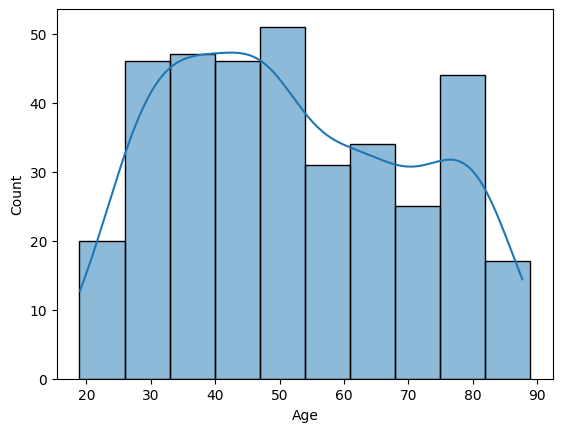

In [28]:
sns.histplot(data=train_set, x='Age', bins=bins_sample, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

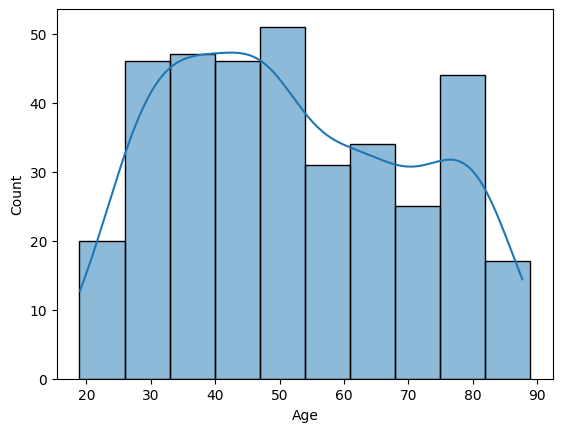

In [29]:
sns.histplot(data=data.iloc[nw_sow_train_index], x='Age', bins=bins_sample, kde=True)

##WM

ElasticNetCV from the scikit-learn library was employed to fit the model. This estimator integrates cross-validation to automatically identify the best α and λ from a specified list of values.

In [30]:
l1_ratio = [0.001, 0.25, 0.5, 0.75, 0.99]
alpha = np.logspace(-5, 5, 100)

In [31]:
n_folds = 10
nw_cat = pd.cut(y_train, bins=5, labels=range(5))
kf = StratifiedKFold(n_splits=n_folds, shuffle=True).split(x_train, nw_cat)

In [32]:
el_reg = ElasticNetCV(alphas=alpha, l1_ratio=l1_ratio, cv=kf, random_state=10)
el_reg.fit(x_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.321941...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
             cv=<generator object _BaseKFold.split at 0x785348e0d5a0>,
             l1_ratio=[0.001, 0.25, 0.5, 0.75, 0.99], random_state=10)

In [33]:
print('best alpha:', el_reg.alpha_)
print('best l1 ratio:', el_reg.l1_ratio_)

best alpha: 0.006734150657750821
best l1 ratio: 0.25


In [34]:
dataframes = []
comparisons = [[y_train, el_reg.predict(x_train)]]
print('score of the model computed on the train dataset:', el_reg.score(x_train, y_train))
comparisons.append([y_test, el_reg.predict(x_test)])
print('score of the model computed on the test dataset:', el_reg.score(x_test, y_test))
for comp in comparisons:
    comp[0] = comp[0] * np.std(train_age) + np.mean(train_age)
    comp[1] = comp[1] * np.std(train_age) + np.mean(train_age)
print('number of comparisons (true age vs prediction):', len(comparisons))
for comp, sample in zip(comparisons, ['train', 'test']):
    print('\nmean absolute error (in years) of the model predictions on the', sample, 'dataset',
          np.mean(np.abs(comp[0] - comp[1])))
    df = pd.DataFrame({sample + ' true age': comp[0], 'prediction': comp[1], 'error': np.abs(comp[1] - comp[0])})
    dataframes.append(df)
    print(df)

score of the model computed on the train dataset: 0.8196982232033458
score of the model computed on the test dataset: 0.6796068739193686
number of comparisons (true age vs prediction): 2

mean absolute error (in years) of the model predictions on the train dataset 6.298773050006598
     train true age  prediction      error
0             24.50   23.618310   0.881690
1             28.67   34.941732   6.271732
2             23.33   31.101875   7.771875
4             28.42   26.442456   1.977544
5             25.25   33.552481   8.302481
..              ...         ...        ...
518           79.25   76.038282   3.211718
519           81.83   70.505886  11.324114
520           80.75   70.071816  10.678184
528           79.42   80.562713   1.142713
532           84.42   74.706334   9.713666

[361 rows x 3 columns]

mean absolute error (in years) of the model predictions on the test dataset 7.439508550425518
     test true age  prediction      error
10           19.17   29.877577  10.70757

In [35]:
train_df = dataframes[0]
train_df['error'] = train_df['prediction'] - train_df['train true age']
test_df = dataframes[1]
test_df['error'] = test_df['prediction'] - test_df['test true age']
print('MEAN ERROR (NW):', test_df['error'].mean())
print('STD ERROR (NW):', test_df['error'].std())

MEAN ERROR (NW): -4.2176266352078065
STD ERROR (NW): 8.246901607138426


### OB

In [36]:
norm_ob_values = (wm_values[obese_ss.index] - np.mean(train_sample)) / np.std(train_sample)
print('O WM dataset has size', norm_ob_values.shape)
ob_predictions = (el_reg.predict(norm_ob_values) * np.std(train_age)) + train_age.mean()
error_ob = ob_predictions - ob_age
print('\nbrain age delta (O):\n')
print(error_ob)
print('\nMEAN ERROR (O): ', error_ob.mean())
print('STD ERROR (O): ', error_ob.std())
print('\n')
ob_score = el_reg.score(norm_ob_values, norm_ob_age)
print('R-squared (O):', ob_score)
abs_err_ob = np.abs(error_ob)
mae_ob = abs_err_ob.mean()
print('Mean Absolute Error (O):', mae_ob)

O WM dataset has size (83, 48)

brain age delta (O):

23     11.681765
37     22.959120
38      6.419047
62     -0.718632
66     11.782610
         ...    
515    -8.581861
523     2.254228
526    -6.287464
530    -4.991995
534    -9.534120
Name: Age, Length: 83, dtype: float64

MEAN ERROR (O):  -2.0059476096314235
STD ERROR (O):  9.971112391513934


R-squared (O): 0.6082416041475931
Mean Absolute Error (O): 7.679874049782411


In [37]:
err_nw_test = test_df['error']
tt_ob = stats.ttest_ind(error_ob, err_nw_test, equal_var=False)
print('norm test and obese:', tt_ob.pvalue)

norm test and obese: 0.12142328270262868


In [38]:
norm_ss_df = dataframes[0].rename(columns={'train true age': "true age", 'error': "absolute error"})
norm_ss_df['error'] = (norm_ss_df['prediction'] - norm_ss_df['true age']).values
norm_ss_df['group'] = np.repeat('TR', len(norm_ss_df))
norm_ss_df

true age  prediction  absolute error      error group
0       24.50   23.618310       -0.881690  -0.881690    TR
1       28.67   34.941732        6.271732   6.271732    TR
2       23.33   31.101875        7.771875   7.771875    TR
4       28.42   26.442456       -1.977544  -1.977544    TR
5       25.25   33.552481        8.302481   8.302481    TR
..        ...         ...             ...        ...   ...
518     79.25   76.038282       -3.211718  -3.211718    TR
519     81.83   70.505886      -11.324114 -11.324114    TR
520     80.75   70.071816      -10.678184 -10.678184    TR
528     79.42   80.562713        1.142713   1.142713    TR
532     84.42   74.706334       -9.713666  -9.713666    TR

[361 rows x 5 columns]

In [39]:
test_ss_df = test_df.rename(columns={'test true age': "true age"})
test_ss_df['group'] = np.repeat('NWc', len(test_df))
ob_df = pd.DataFrame({'true age': ob_age, 'prediction': ob_predictions,
                      'absolute error': np.abs(error_ob), 'error': error_ob,
                      'group': np.repeat('ob', len(ob_age))})
tot_ss_df = pd.concat([norm_ss_df, ob_df, test_ss_df], ignore_index=True)
tot_ss_df

true age  prediction  absolute error     error group
0       24.50   23.618310       -0.881690 -0.881690    TR
1       28.67   34.941732        6.271732  6.271732    TR
2       23.33   31.101875        7.771875  7.771875    TR
3       28.42   26.442456       -1.977544 -1.977544    TR
4       25.25   33.552481        8.302481  8.302481    TR
..        ...         ...             ...       ...   ...
522     79.50   79.149644             NaN -0.350356   NWc
523     83.75   84.647501             NaN  0.897501   NWc
524     84.08   90.180271             NaN  6.100271   NWc
525     82.58   74.928407             NaN -7.651593   NWc
526     86.67   77.063835             NaN -9.606165   NWc

[527 rows x 5 columns]

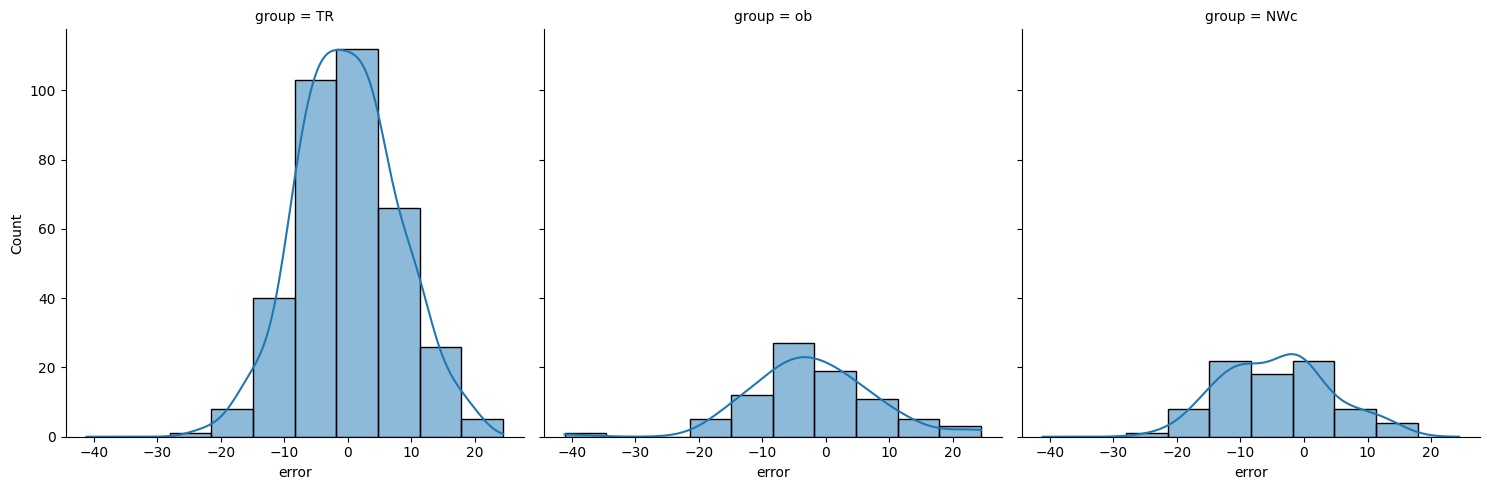

In [40]:
sns.displot(data=tot_ss_df, x='error', col='group', bins=10, kde=True)

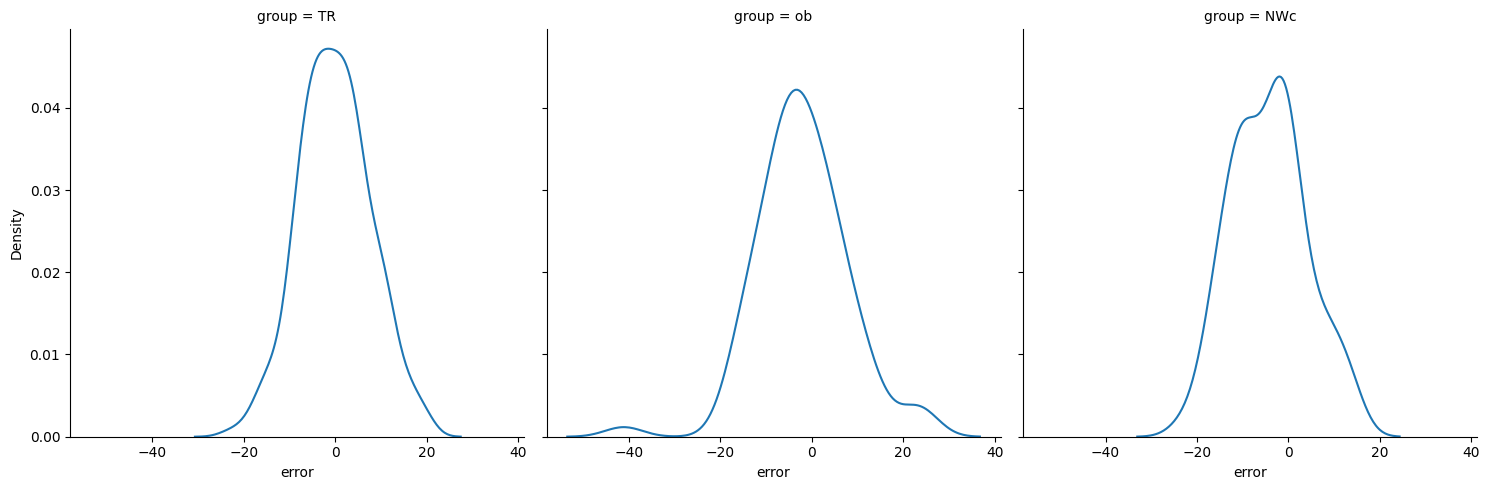

In [41]:
sns.displot(data=tot_ss_df, x='error', col='group', kind='kde', common_norm=False)

In [42]:
fig7 = px.scatter(tot_ss_df, x='true age', y='prediction', labels={'x': 'true age', 'y': 'prediction'}, height=600,
                  facet_col='group')
trace = go.Scatter(x=[18, 100], y=[18, 100], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig7.add_trace(trace, row='all', col='all')
fig7.update_traces(selector=-1, showlegend=True)
fig7.show()

In [43]:
fig6 = px.scatter(tot_ss_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                  trendline="ols", height=600, facet_col='group')
fig6.show()

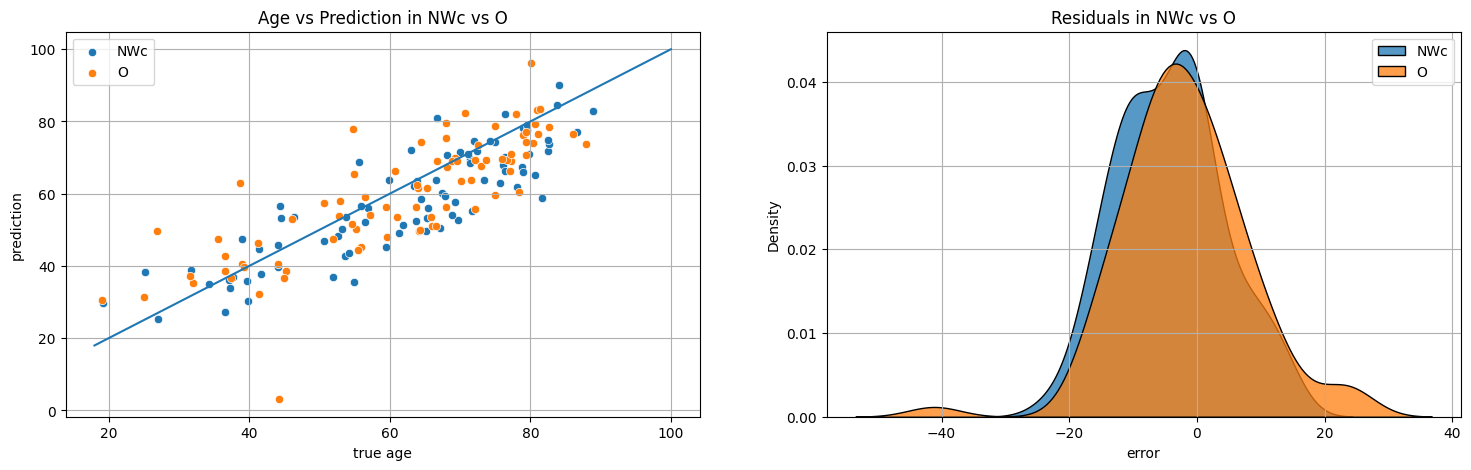

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
sc1 = sns.scatterplot(test_ss_df, x='true age', y='prediction', ax=axes[0], label='NWc')
sc2 = sns.scatterplot(ob_df, x='true age', y='prediction', ax=axes[0], label='O')
sns.lineplot(x=[18, 100], y=[18, 100], ax=axes[0])
kd1 = sns.kdeplot(test_ss_df, x='error', ax=axes[1], multiple='stack', label='NWc')
kd2 = sns.kdeplot(ob_df, x='error', ax=axes[1], multiple='stack', label='O')
axes[0].title.set_text('Age vs Prediction in NWc vs O')
axes[1].title.set_text('Residuals in NWc vs O')
axes[0].legend()
axes[1].legend()
axes[0].grid()
axes[1].grid()


(-40.0, 40.0)

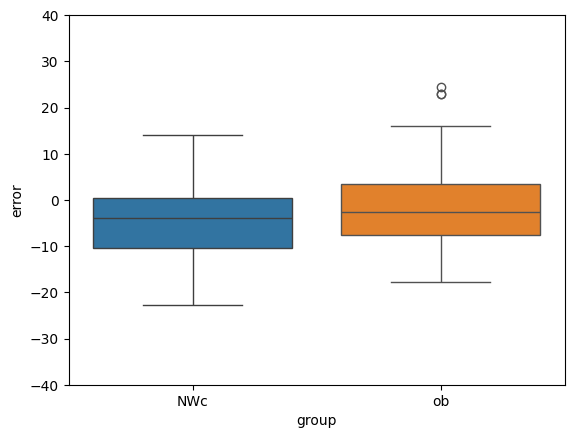

In [45]:
sns.boxplot(data=test_ss_df, x='group', y='error')
sns.boxplot(data=ob_df, x='group', y='error')
plt.ylim(-40, 40)

<Figure size 2000x1200 with 0 Axes>

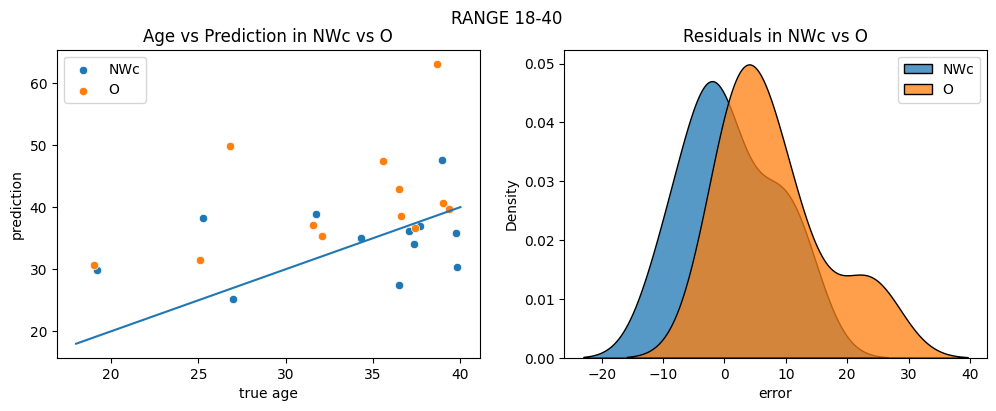

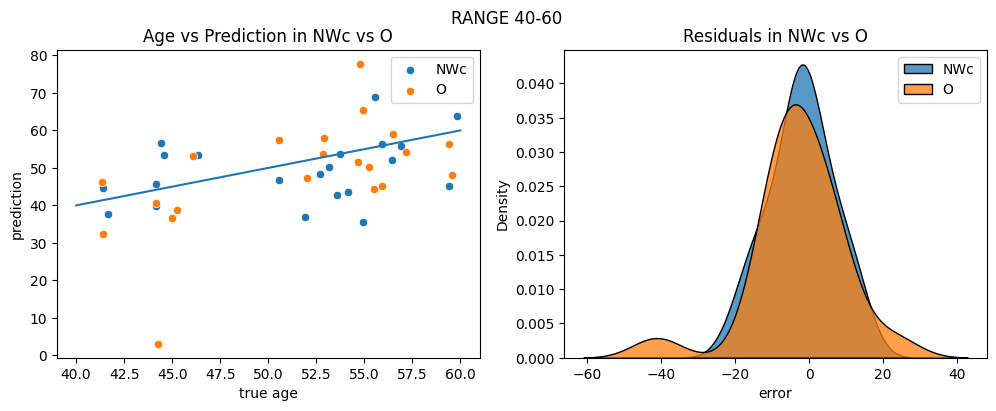

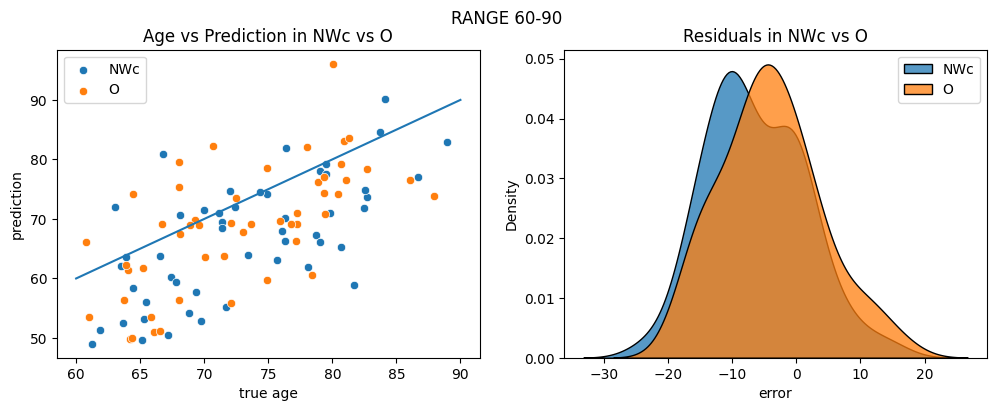

In [46]:
bins = [18, 40, 60, 90]
fig11 = plt.figure(layout='constrained', figsize=(20, 12))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(ncols=2, figsize=(12, 4))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_ss_df[(bins[bin_id] < test_ss_df['true age']) & (test_ss_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_df[(bins[bin_id] <= ob_df['true age']) & (ob_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(test_bin_df, x='true age', y='prediction', ax=axes[0], label='NWc')
    sc2 = sns.scatterplot(ob_bin, x='true age', y='prediction', ax=axes[0], label='O')
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(test_bin_df, x='error', ax=axes[1], multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', ax=axes[1], multiple='stack', label='O')
    axes[0].title.set_text('Age vs Prediction in NWc vs O')
    axes[1].title.set_text('Residuals in NWc vs O')
    axes[0].legend()
    axes[1].legend()

In [47]:
intervals = []
small_df = [test_ss_df, ob_df]
dataf_means = [[], []]
errors_df = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_df)):
        dataf_bin = small_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors_df[dfi].append(dfi_bin['error'].values)
        dataf_means[dfi].append(dfi_bin['error'].mean())
print(intervals)
print(dataf_means)

['18-40', '40-60', '60-90']
[[np.float64(0.9247154565515817), np.float64(-2.1025040859911277), np.float64(-6.340140207901067)], [np.float64(7.98748665808531), np.float64(-2.8587726109455844), np.float64(-4.0461853333314926)]]


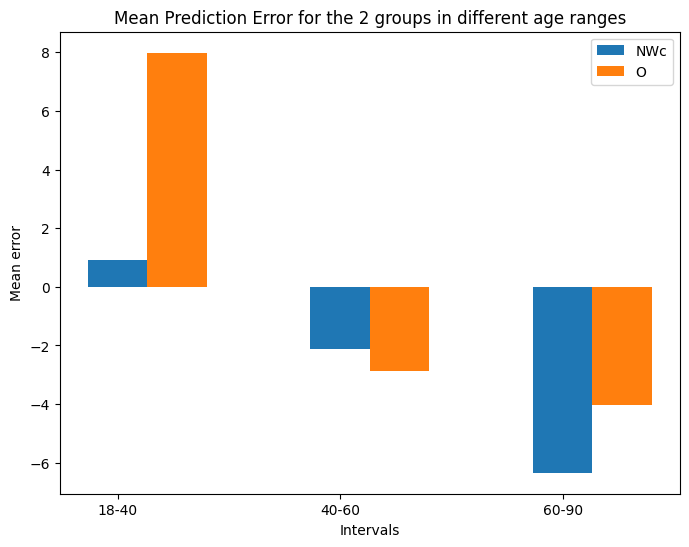

In [48]:
barfig = plt.figure(figsize=(8, 6))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.show()

In [49]:
for bin_i in range(len(errors_df[0])):
    print('#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(errors_df[0][bin_i], errors_df[1][bin_i], equal_var=False)
    print('norm test and obese:', ob_nw_tt.pvalue)

#### BIN [ 18 - 40 ] ####
####### t-test #######
norm test and obese: 0.03940892798517174
#### BIN [ 40 - 60 ] ####
####### t-test #######
norm test and obese: 0.8183637091749412
#### BIN [ 60 - 90 ] ####
####### t-test #######
norm test and obese: 0.13959339623149392


<Figure size 800x600 with 0 Axes>

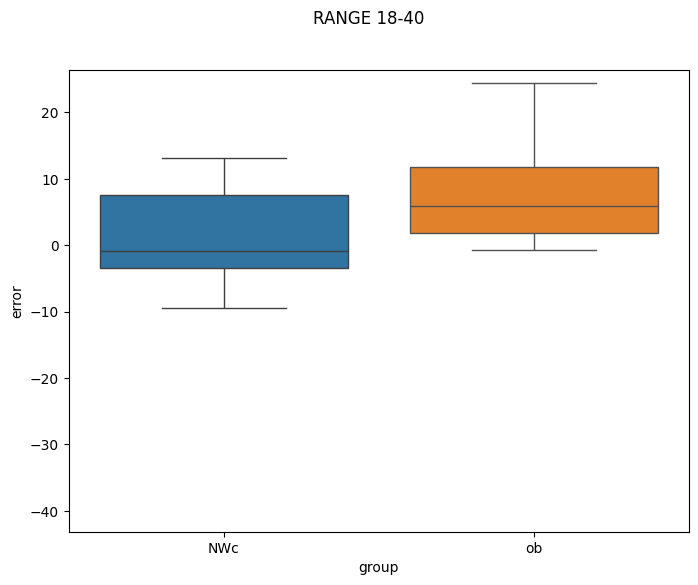

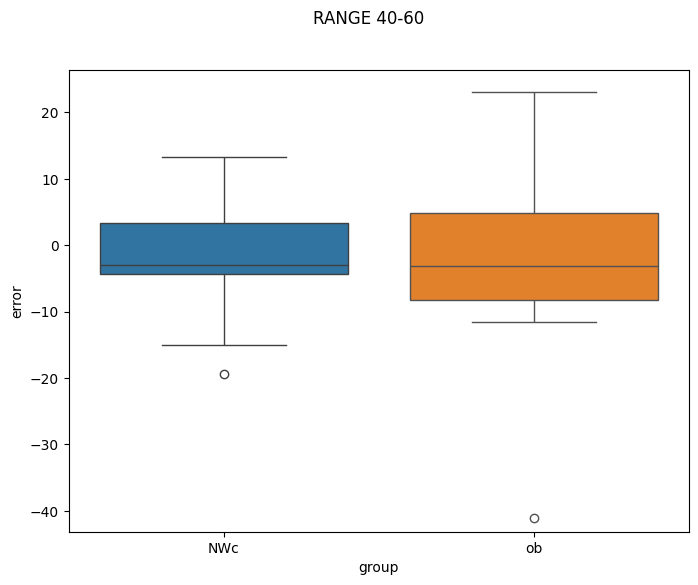

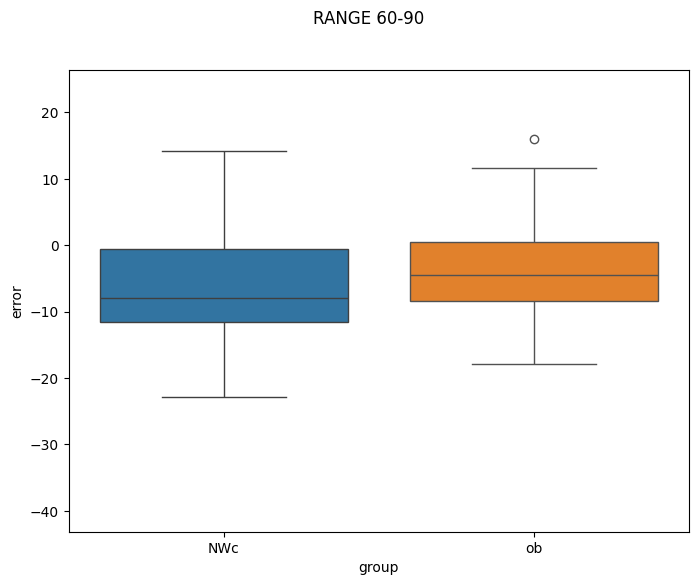

In [50]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 6))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_ss_df[(bins[bin_id] < test_ss_df['true age']) & (test_ss_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_df[(bins[bin_id] <= ob_df['true age']) & (ob_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.boxplot(test_bin_df, x='group', y='error')
    sc2 = sns.boxplot(ob_bin, x='group', y='error')
    plt.ylim([np.min(np.concatenate((ob_df['error'], test_ss_df['error']))) - 2,
              np.max(np.concatenate((ob_df['error'], test_ss_df['error']))) + 2])

###CORRECTIONS


Predicted brain age (as well as brain age delta) typically shows overestimation in younger individuals and underestimation in older individuals. For this reason, it is important to Remove this age-bias to ensure that any further analyses are not influenced by the age-dependence of the predictions.

This correction is typically done by fitting a regression model on predicted age as a function of chronological age. The slope and intercept of the regression model are then used to compute the corrected predicted age, that is used to derive corrected delta values (i.e., corrected brain age delta = corrected predicted age – chronological age)

In [51]:
reg_figure = px.scatter(norm_ss_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                        trendline="ols", height=600, width=800)
#trace = go.Scatter(x=[18,100],y=[0,0], mode='lines', line_color='black', name='no prediction error')
#trace.update(showlegend=False)
#fig6.add_trace(trace, row='all', col='all')
#fig6.update_traces(selector=-1, showlegend=True)
reg_figure.show()

In [52]:
b0, b1 = px.get_trendline_results(reg_figure).px_fit_results.iloc[0].params
print('intercept:', b0)
print('slope:', b1)

intercept: 10.428148868305659
slope: -0.20152220462898432


In [53]:
corr_tr = norm_ss_df['prediction'] - (b1 * norm_ss_df['true age'] + b0)
corr_nw = test_df['prediction'] - (b1 * test_df['test true age'] + b0)
corr_ob = ob_predictions - (b1 * ob_age + b0)
corr_err_tr = corr_tr - norm_ss_df['true age']
corr_err_ob = corr_ob - ob_age
#N.B. This is the same as doing residuals (prediction-true age) - correction
corr_err_nw = corr_nw - test_df['test true age']
correction_train = pd.DataFrame({'true age': norm_ss_df['true age'], 'corr_pred': corr_tr, 'corr_res': corr_err_tr,
                                 'group': np.repeat('TR', len(norm_ss_df['true age']))})
correction_nw_df = pd.DataFrame({'true age': test_df['test true age'], 'corr_pred': corr_nw, 'corr_res': corr_err_nw,
                                 'group': np.repeat('NW', len(test_df['test true age']))})
correction_ob_df = pd.DataFrame(
    {'true age': ob_age, 'corr_pred': corr_ob, 'corr_res': corr_err_ob, 'group': np.repeat('O', len(ob_age))})
tot_corr = pd.concat([correction_train, correction_nw_df, correction_ob_df])

In [54]:
fig92 = px.scatter(tot_corr, x='true age', y='corr_pred', labels={'x': 'true age', 'y': 'corr_pred_error'}, height=600,
                   facet_col='group')
fig92.update_xaxes(showgrid=False)
fig92.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig92.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig92.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig92.add_trace(trace, row='all', col='all')
fig92.show()

In [55]:
fig93 = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'corr_pred_error'},
                   trendline="ols", height=600, facet_col='group')
fig93.update_xaxes(showgrid=False)
fig93.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig93.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig93.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
fig93.show()

####Statistics (corrections)

In [56]:
print('R2 TRAIN:', metrics.r2_score(norm_ss_df['true age'], corr_tr))
print('R2 NW:', metrics.r2_score(test_df['test true age'], corr_nw))
print('R2 OB:', metrics.r2_score(ob_age, corr_ob))

R2 TRAIN: 0.8603094221618721
R2 NW: 0.7666567681893902
R2 OB: 0.6650132002626223


In [57]:
print('MAE TR:', np.abs(corr_err_tr).mean())
print('MAE NW:', np.abs(corr_err_nw).mean())
print('MAE OB:', np.abs(corr_err_ob).mean())


MAE TR: 5.629479772895289
MAE NW: 6.550616961233915
MAE OB: 6.661345500432918


In [58]:
print('MEAN ERROR TR:', corr_err_tr.mean())
print('MEAN ERROR NW:', corr_err_nw.mean())
print('MEAN ERROR OB:', corr_err_ob.mean())

MEAN ERROR TR: 2.0469929229653858e-15
MEAN ERROR NW: -2.1654568112730876
MEAN ERROR OB: -0.007096190680468186


In [59]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -2.17 std 7.61
O mean residuals: -0.01 std: 9.41
O-NW: 2.16


In [60]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -2.17 std 7.61
O mean residuals: -0.01 std: 9.41
O-NW: 2.16


In [61]:
stats.ttest_ind(correction_ob_df['corr_res'], correction_nw_df['corr_res'], equal_var=False)

TtestResult(statistic=np.float64(1.6251595866338842), pvalue=np.float64(0.10613259936265855), df=np.float64(157.13574713091813))

In [62]:
intervals = []
small_df = [correction_nw_df, correction_ob_df]
corr_dataf_means = [[], []]
corr_errors_df = [[], []]
corr_std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_df)):
        dataf_bin = small_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors = dfi_bin['corr_res'].values
        corr_errors_df[dfi].append(errors)
        corr_dataf_means[dfi].append(errors.mean())
        corr_std_devs[dfi].append(errors.std())
print(intervals)
print(corr_dataf_means)
print(corr_std_devs)

['18-40', '40-60', '60-90']
[[np.float64(-2.709112282687871), np.float64(-2.2087815961547945), np.float64(-2.0167830884832227)], [np.float64(4.237279845672621), np.float64(-2.9276245688210123), np.float64(0.200875479413819)]]
[[np.float64(6.359769192375381), np.float64(8.18245141725556), np.float64(7.5521265173528995)], [np.float64(7.711654305934377), np.float64(12.171914600585824), np.float64(7.790330339702247)]]


In [63]:
for bin_i in range(len(corr_errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i], equal_var=False)
    print('norm test and obese (pvalue):', round(ob_nw_tt.pvalue, 3))
    print('norm test and obese (t):', round(ob_nw_tt.statistic, 3))
    print('NW: ', round(corr_dataf_means[0][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[0][bin_i], 2)) + ')')
    print('O: ', round(corr_dataf_means[1][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[1][bin_i], 2)) + ')')
    print('O-NW: ', round(corr_dataf_means[1][bin_i] - corr_dataf_means[0][bin_i], 2))


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese (pvalue): 0.031
norm test and obese (t): 2.305
NW:  -2.71 (± 6.36)
O:  4.24 (± 7.71)
O-NW:  6.95

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese (pvalue): 0.828
norm test and obese (t): -0.219
NW:  -2.21 (± 8.18)
O:  -2.93 (± 12.17)
O-NW:  -0.72

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese (pvalue): 0.156
norm test and obese (t): 1.431
NW:  -2.02 (± 7.55)
O:  0.2 (± 7.79)
O-NW:  2.22


##Bootstrap

In [64]:
from sklearn.utils import resample
from sklearn.linear_model import ElasticNet

In [65]:
n_bs_iterations = 1000
nw_bs_results = []
ob_bs_results = []
res_mae_nw  = []
res_mae_ob = []
features_bs_models = []

for bs_it in range(n_bs_iterations):
  print(bs_it)
  res_train_index = resample(nw_sow_train_index, replace=True, n_samples=len(nw_sow_train_index), random_state=bs_it) #index of the resampled train

  res_train_sample = wm_values[res_train_index]
  res_x_test = (wm_values[norm_test.index] - np.mean(res_train_sample)) / np.std(res_train_sample)
  res_x_train = (res_train_sample - np.mean(res_train_sample)) / np.std(res_train_sample)
  res_norm_ob_values = (wm_values[obese_ss.index]-np.mean(res_train_sample))/np.std(res_train_sample)

  res_train_age = data.Age[res_train_index]
  res_y_test = (data.Age[norm_test.index]- np.mean(res_train_age))/np.std(res_train_age)
  res_y_train = (res_train_age - np.mean(res_train_age))/np.std(res_train_age)
  res_norm_ob_age = (ob_age - np.mean(res_train_age))/np.std(res_train_age)

  bs_model = ElasticNet(alpha=el_reg.alpha_, l1_ratio=el_reg.l1_ratio_, random_state= bs_it)#el_reg.alpha_, l1_ratio=el_reg.l1_ratio_, random_state=bs_it)
  bs_model.fit(res_x_train, res_y_train)

  res_train_pred = bs_model.predict(res_x_train)*np.std(res_train_age) + np.mean(res_train_age)
  res_test_pred = bs_model.predict(res_x_test)*np.std(res_train_age) + np.mean(res_train_age)
  res_ob_pred = bs_model.predict(res_norm_ob_values)*np.std(res_train_age) + np.mean(res_train_age)
  features_bs_models.append(bs_model.coef_)

  res_df = pd.DataFrame({'true age': res_train_age, 'error': res_train_pred-res_train_age})
  b0,b1 = px.get_trendline_results(px.scatter(res_df, x='true age', y='error',
                                              trendline="ols",)).px_fit_results.iloc[0].params

  res_corr_tr = res_train_pred - (b1*res_train_age + b0)
  res_corr_nw = res_test_pred  - (b1*data.Age[norm_test.index] + b0)
  res_corr_ob = res_ob_pred - (b1*ob_age + b0)
  res_corr_err_tr = res_corr_tr - res_train_age
  res_corr_err_nw = res_corr_nw - data.Age[norm_test.index]
  res_corr_err_ob = res_corr_ob - ob_age

  nw_bs_results.append(metrics.r2_score(data.Age[norm_test.index], res_corr_nw))
  ob_bs_results.append(metrics.r2_score(ob_age, res_corr_ob))
  res_mae_nw.append(np.abs(res_corr_err_nw).mean())
  res_mae_ob.append(np.abs(res_corr_err_ob).mean())
feat_bs = np.array(features_bs_models)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [66]:
print('NW R2:', np.mean(nw_bs_results), '±', np.std(nw_bs_results))
print('O R2:', np.mean(ob_bs_results), '±', np.std(ob_bs_results))
print('NW MAE:', np.mean(res_mae_nw), '±', np.std(res_mae_nw))
print('O MAE:', np.mean(res_mae_ob), '±', np.std(res_mae_ob))

NW R2: 0.7409650282871689 ± 0.023001190165842282
O R2: 0.6365262962628954 ± 0.03483595433611915
NW MAE: 6.82575327781309 ± 0.33339810214464577
O MAE: 7.048723805738746 ± 0.3108411090385345


In [67]:
print('LOWER BOUNDS: \n')
lower_bounds = np.percentile(feat_bs, 2.5, axis=0)
print(lower_bounds.round(5))
print('\n \n UPPER BOUNDS: \n')
upper_bounds = np.percentile(feat_bs, 97.5, axis=0)
print(upper_bounds.round(5))
mean_weights = feat_bs.mean(axis=0)
print('\n \n MEAN WEIGHTS: \n')
print(mean_weights.round(5))

LOWER BOUNDS: 

[ 0.      -0.26508 -0.51544 -0.32956  0.03046 -0.53734 -0.26943 -0.27407
 -0.29762 -0.33302 -0.52423 -0.19459 -0.01107 -0.06051 -0.47372 -0.19885
  0.01005 -0.1542  -0.07918 -0.26302  0.30989 -0.37374 -0.0765  -0.04828
  0.12331 -0.00919 -0.49107  0.      -0.39079 -0.11504 -0.16404 -0.21845
 -0.43203 -0.23453 -0.24128 -0.25448  0.      -0.16264 -0.60456 -0.16935
 -0.17174 -0.06931 -0.18758  0.28014 -0.31036 -0.17702 -0.00485  0.11579]

 
 UPPER BOUNDS: 

[ 3.9780e-01 -9.9230e-02 -6.6570e-02  0.0000e+00  5.2210e-01 -5.3930e-02
  0.0000e+00  1.6410e-02  0.0000e+00  0.0000e+00 -1.5195e-01  8.4010e-02
  2.9746e-01  2.8478e-01  0.0000e+00  1.1578e-01  4.8966e-01  1.5693e-01
  1.2557e-01  6.8290e-02  7.2450e-01  0.0000e+00  1.0965e-01  1.7748e-01
  4.9575e-01  2.7870e-01 -6.1160e-02  3.4105e-01  0.0000e+00  1.3577e-01
  1.2751e-01  8.4750e-02  0.0000e+00  4.4630e-02  3.5080e-02  1.0018e-01
  4.2624e-01  1.2900e-01 -1.7286e-01  1.5961e-01  1.2741e-01  2.0279e-01
  1.2739e-01  

In [68]:
wm_reg= [wm.loc[0].index[1:49][i][1] for i in range(48)]
ci_df = pd.DataFrame({'lower': lower_bounds, 'upper': upper_bounds, 'mean': mean_weights, 'label' : wm_reg})
ci_df

lower     upper      mean                  label
0   0.000000  0.397798  0.164213               Body_CC 
1  -0.265083 -0.099232 -0.182792                 Fornix
2  -0.515441 -0.066569 -0.292928                Genu_CC
3  -0.329560  0.000000 -0.112187          L_Ant_Cor_Rad
4   0.030463  0.522104  0.276080   L_Ant_Limb_Inter_Cap
5  -0.537335 -0.053933 -0.299668            L_Cereb_Ped
6  -0.269435  0.000000 -0.132233            L_Cing_Hipp
7  -0.274075  0.016408 -0.094948                 L_Cing
8  -0.297622  0.000000 -0.136500                  L_CST
9  -0.333016  0.000000 -0.104586              L_Ext_Cap
10 -0.524234 -0.151945 -0.343511          L_Fornix_cres
11 -0.194591  0.084006 -0.041613        L_Inf_Cereb_Ped
12 -0.011073  0.297461  0.109446              L_Med_Lem
13 -0.060510  0.284785  0.082358         L_Post_Cor_Rad
14 -0.473720  0.000000 -0.221173  L_Post_Limb_Inter_Cap
15 -0.198852  0.115783 -0.020159        L_Post_Thal_Rad
16  0.010045  0.489658  0.253665     L_Retrol_Inter_Cap
17 -0.154201  0.156934  0.004636            L_Sag_Strat
18 -0.079184  0.125569  0.019915                 L_SFOF
19 -0.263024  0.068286 -0.063966                  L_SLF
20  0.309886  0.724502  0.509862        L_Sup_Cereb_Ped
21 -0.373738  0.000000 -0.167276          L_Sup_Cor_Rad
22 -0.076504  0.109652  0.013378                L_Tapet
23 -0.048275  0.177475  0.054468             L_Unc_Fasc
24  0.123314  0.495752  0.308003          Mid_Cereb_Ped
25 -0.009189  0.278701  0.109789        Pon_Cross_Tract
26 -0.491069 -0.061159 -0.284086          R_Ant_Cor_Rad
27  0.000000  0.341051  0.111110   R_Ant_Limb_Inter_Cap
28 -0.390795  0.000000 -0.152782            R_Cereb_Ped
29 -0.115037  0.135771  0.011550            R_Cing_Hipp
30 -0.164036  0.127510 -0.010163                 R_Cing
31 -0.218455  0.084752 -0.048847                  R_CST
32 -0.432031  0.000000 -0.189359              R_Ext_Cap
33 -0.234533  0.044629 -0.076536          R_Fornix_cres
34 -0.241279  0.035084 -0.079683        R_Inf_Cereb_Ped
35 -0.254484  0.100176 -0.054378              R_Med_Lem
36  0.000000  0.426241  0.207966         R_Post_Cor_Rad
37 -0.162638  0.128997 -0.013581  R_Post_Limb_Inter_Cap
38 -0.604563 -0.172858 -0.393566        R_Post_Thal_Rad
39 -0.169352  0.159612 -0.006640     R_Retrol_Inter_Cap
40 -0.171741  0.127413 -0.012988            R_Sag_Strat
41 -0.069308  0.202795  0.051977                 R_SFOF
42 -0.187584  0.127385 -0.013871                  R_SLF
43  0.280139  0.680345  0.476090        R_Sup_Cereb_Ped
44 -0.310364  0.109725 -0.058812          R_Sup_Cor_Rad
45 -0.177015  0.000649 -0.077806                R_Tapet
46 -0.004852  0.224827  0.095750             R_Unc_Fasc
47  0.115789  0.634986  0.376881            Splenium_CC

In [69]:
ci_df[(ci_df['lower'] <=0) != (ci_df['upper']>=0) ]

lower     upper      mean                 label
1  -0.265083 -0.099232 -0.182792                Fornix
2  -0.515441 -0.066569 -0.292928               Genu_CC
4   0.030463  0.522104  0.276080  L_Ant_Limb_Inter_Cap
5  -0.537335 -0.053933 -0.299668           L_Cereb_Ped
10 -0.524234 -0.151945 -0.343511         L_Fornix_cres
16  0.010045  0.489658  0.253665    L_Retrol_Inter_Cap
20  0.309886  0.724502  0.509862       L_Sup_Cereb_Ped
24  0.123314  0.495752  0.308003         Mid_Cereb_Ped
26 -0.491069 -0.061159 -0.284086         R_Ant_Cor_Rad
38 -0.604563 -0.172858 -0.393566       R_Post_Thal_Rad
43  0.280139  0.680345  0.476090       R_Sup_Cereb_Ped
47  0.115789  0.634986  0.376881           Splenium_CC

##Permutation Test

In [70]:
import random

In [71]:
n_permutations = 1000
perm_nw_r2 = []
perm_ob_r2 = []
perm_nw_mae = []
perm_ob_mae = []
corr_perm_nw_r2 = []
corr_perm_ob_r2 = []
corr_perm_nw_mae = []
corr_perm_ob_mae = []
y_train_shuffled = np.copy(y_train)
for perm in range(n_permutations):
  random.shuffle(y_train_shuffled)
  perm_model = ElasticNet(alpha=el_reg.alpha_, l1_ratio=el_reg.l1_ratio_)
  perm_model.fit(x_train, y_train_shuffled)

  perm_train_pred = perm_model.predict(x_train)*np.std(train_age) + np.mean(train_age)
  perm_test_pred = perm_model.predict(x_test)*np.std(train_age) + np.mean(train_age)
  perm_ob_pred = perm_model.predict(norm_ob_values)*np.std(train_age) + np.mean(train_age)
  perm_nw_r2.append(metrics.r2_score(test_ss_df['true age'], perm_test_pred))
  perm_ob_r2.append(metrics.r2_score(ob_age, perm_ob_pred))
  perm_nw_mae.append(np.abs(perm_test_pred-test_ss_df['true age']).mean())
  perm_ob_mae.append(np.abs(perm_ob_pred-ob_age).mean())
  perm_train_age = y_train_shuffled*np.std(train_age) + np.mean(train_age)
  perm_df = pd.DataFrame({'true age': perm_train_age, 'error': perm_train_pred-perm_train_age})
  b0,b1 = px.get_trendline_results(px.scatter(perm_df, x='true age', y='error',
                                              trendline="ols",)).px_fit_results.iloc[0].params
  perm_corr_tr = perm_train_pred - (b1*perm_train_age + b0)
  perm_corr_nw = perm_test_pred  - (b1*data.Age[norm_test.index] + b0)
  perm_corr_ob = perm_ob_pred - (b1*ob_age + b0)
  perm_corr_err_tr = perm_corr_tr - perm_train_age
  perm_corr_err_nw = perm_corr_nw - data.Age[norm_test.index]
  perm_corr_err_ob = perm_corr_ob - ob_age

  corr_perm_nw_r2.append(metrics.r2_score(data.Age[norm_test.index], perm_corr_nw))
  corr_perm_ob_r2.append(metrics.r2_score(ob_age, perm_corr_ob))
  corr_perm_nw_mae.append(np.abs(perm_corr_err_nw).mean())
  corr_perm_ob_mae.append(np.abs(perm_corr_err_ob).mean())

In [72]:
results_perm_df = pd.DataFrame({'R2_nw': perm_nw_r2, 'MAE_nw' : perm_nw_mae, 'R2_ob': perm_ob_r2,
              'MAE_ob': perm_ob_mae, 'Corr_R2_nw': corr_perm_nw_r2, 'Corr_MAE_nw': corr_perm_nw_mae, 'Corr_R2_ob': corr_perm_ob_r2, 'Corr_MAE_ob': corr_perm_ob_mae})
results_perm_df

R2_nw     MAE_nw     R2_ob     MAE_ob  Corr_R2_nw  Corr_MAE_nw  \
0   -0.599762  17.237707 -0.695930  18.033649    0.858132     4.887748   
1   -0.513375  16.823943 -0.765191  18.628049    0.836685     5.433161   
2   -0.361707  16.452523 -0.534148  17.296634    0.895807     4.050858   
3   -0.391251  16.108303 -0.550294  17.581074    0.886940     4.234988   
4   -0.247595  15.376555 -0.508096  16.623113    0.843447     4.984754   
..        ...        ...       ...        ...         ...          ...   
995 -0.786902  19.004706 -0.604055  17.671555    0.822954     5.527935   
996 -0.444865  16.704259 -0.398825  16.485964    0.917821     3.589159   
997 -0.245104  15.591700 -0.454038  16.692585    0.883065     4.437117   
998 -0.376595  16.047714 -0.457592  17.403484    0.887809     4.329053   
999 -0.227577  15.314845 -0.375573  16.602330    0.918418     3.589075   

     Corr_R2_ob  Corr_MAE_ob  
0      0.840429     4.994207  
1      0.791541     6.007635  
2      0.861853     4.769214  
3      0.884022     4.404688  
4      0.766716     5.450253  
..          ...          ...  
995    0.823647     5.375064  
996    0.899007     4.194382  
997    0.882477     4.494497  
998    0.871906     4.668132  
999    0.908182     3.683201  

[1000 rows x 8 columns]

In [73]:
results_perm_df.to_excel('perm_results_' + wm_type[-3:-1] + '.xlsx')

In [74]:
print('NW R2:', np.mean(perm_nw_r2), '±', np.std(perm_nw_r2))
print('O R2:', np.mean(perm_ob_r2), '±', np.std(perm_ob_r2))
print('NW MAE:', np.mean(perm_nw_mae), '±', np.std(perm_nw_mae))
print('O MAE:', np.mean(perm_ob_mae), '±', np.std(perm_ob_mae))

NW R2: -0.4989098796048083 ± 0.18134405115188043
O R2: -0.5042769587558051 ± 0.1678382930201301
NW MAE: 17.07146400794662 ± 1.0544511199225484
O MAE: 17.060474865554685 ± 0.9898343578612321


In [75]:
np.mean(np.array(perm_nw_r2)>=el_reg.score(x_test, y_test))

np.float64(0.0)

##GM

The procedure utilized for GM volumes analysis is the same as the one for WM measures.

In [76]:
l1_ratio = [0.001, 0.25, 0.5, 0, 75, 0.99]
alpha = np.logspace(-5, 5, 100)

In [77]:
n_folds = 10
nw_cat = pd.cut(y_train, bins=5, labels=range(5))
kf = StratifiedKFold(n_splits=n_folds, shuffle=True).split(x_gm_train, nw_cat)

In [78]:
gm_reg = ElasticNetCV(alphas=alpha, l1_ratio=l1_ratio, cv=kf, random_state=3)
gm_reg.fit(x_gm_train, y_train)

Output streaming troncato alle ultime 5000 righe.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.91711974937125, tolerance: 0.03298058094563026

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.14576994104796, tolerance: 0.03298058094563026

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged

ElasticNetCV(alphas=array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.321941...
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
             cv=<generator object _BaseKFold.split at 0x78533fef45e0>,
             l1_ratio=[0.001, 0.25, 0.5, 0, 75, 0.99], random_state=3)

In [79]:
x_gm_train.shape

(361, 48)

In [80]:
print('best alpha:', gm_reg.alpha_)
print('best l1 ratio:', gm_reg.l1_ratio_)

best alpha: 0.00210490414451202
best l1 ratio: 0.5


###Model coefficients

In [81]:
weight_areas = {
    gm.loc[0].index[i + 1]: gm_reg.coef_[i] for i in range(len(gm_reg.coef_))
}

In [82]:
gm_coefs = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])
gm_coefs.sort_values(by='coef')

coef
MTG_Ant         -0.940355
TOF             -0.843327
STS_Post        -0.649060
Heschl_Gyrus    -0.624482
Front_Operc     -0.540067
Cing_Post       -0.493308
MTG_Post        -0.471893
Paracing        -0.448779
IFG_Oper        -0.361318
OFC             -0.354192
STA_Ant         -0.307506
Cent_Operc      -0.283528
Intracalc       -0.263138
Temp_Pole       -0.243753
Lat_Occip_Inf   -0.170784
Frontal_Pole    -0.158355
Occip_Pole      -0.158136
Sup_Front_Gyrus -0.127448
Prec_Gyrus      -0.123236
Cing_Ant        -0.097312
Lat_Occip_Sup   -0.067169
MTG_TempOccip   -0.058214
Planum_Polare   -0.000000
Occip_Fusiform   0.000000
Planum_Temp      0.000000
Pariet_Operc     0.000000
Mid_Front_gyrus  0.000000
ITG_Ant         -0.000000
IFG_Tri         -0.000000
Cuneus           0.000000
Ang_Gyrus       -0.000000
MFG             -0.000000
Supracalc       -0.000000
Subcallosal      0.000000
TFC_Ant         -0.000000
SPL              0.000000
TFC_Post        -0.000000
Parahipp_Post    0.000000
SMG_Ant         -0.000000
PostCent        -0.000000
Lingual          0.002492
ITG_Post         0.004161
SMA              0.017052
Precuneus        0.033046
SMG_Post         0.142972
Parahipp_Ant     0.281498
Insular_pole     0.316709
ITG_TempOccip    0.429339

###Results

In [83]:
dataframes_gm = []
comparisons_gm = [[y_train, gm_reg.predict(x_gm_train)]]
print('score of the model computed on the train dataset:', gm_reg.score(x_gm_train, y_train))
comparisons_gm.append([y_test, gm_reg.predict(x_gm_test)])
print('score of the model computed on the test dataset:', gm_reg.score(x_gm_test, y_test))
for comp1 in comparisons_gm:
    comp1[0] = comp1[0] * np.std(train_age) + np.mean(train_age)
    comp1[1] = comp1[1] * np.std(train_age) + np.mean(train_age)
print('number of comparisons (true age vs prediction):', len(comparisons_gm))
for comp1, sample in zip(comparisons_gm, ['train', 'test']):
    print('mean absolute error (in years) of the model predictions on the', sample, 'dataset',
          np.mean(np.abs(comp1[0] - comp1[1])))
    df1 = pd.DataFrame({sample + ' true age': comp1[0], 'prediction': comp1[1], 'error': np.abs(comp1[1] - comp1[0])})
    dataframes_gm.append(df1)
    print(df1)

score of the model computed on the train dataset: 0.8038434697851977
score of the model computed on the test dataset: 0.7093492333947351
number of comparisons (true age vs prediction): 2
mean absolute error (in years) of the model predictions on the train dataset 6.620595341707052
     train true age  prediction      error
0             24.50   31.006194   6.506194
1             28.67   36.875082   8.205082
2             23.33   42.241457  18.911457
4             28.42   23.659805   4.760195
5             25.25   40.502865  15.252865
..              ...         ...        ...
518           79.25   82.002689   2.752689
519           81.83   70.626608  11.203392
520           80.75   73.810470   6.939530
528           79.42   78.691723   0.728277
532           84.42   89.728515   5.308515

[361 rows x 3 columns]
mean absolute error (in years) of the model predictions on the test dataset 6.9870699430879295
     test true age  prediction      error
10           19.17   21.587334   2.417334

In [84]:
error_norm_gm = dataframes_gm[1]['prediction'] - dataframes_gm[1]['test true age']
gm_train_df = dataframes_gm[0]
gm_train_df['error'] = gm_train_df['prediction'] - gm_train_df['train true age']
gm_test_df = dataframes_gm[1]
gm_test_df['error'] = gm_test_df['prediction'] - gm_test_df['test true age']
print('MEAN BRAIN AGE DELTA (NW):', gm_test_df['error'].mean())
print('STD ERROR NW', gm_test_df['error'].std())

MEAN BRAIN AGE DELTA (NW): -3.6896648165742114
STD ERROR NW 8.015737323486729


##Obese

In [85]:
ob_gm = gm_values[obese_ss.index]
norm_ob_gm = (ob_gm - np.mean(gm_train_sample)) / np.std(gm_train_sample)
print(norm_ob_gm.shape)
ob_gm_pred = (gm_reg.predict(norm_ob_gm) * np.std(train_age)) + train_age.mean()
error_ob_gm = ob_gm_pred - ob_age
error_ob_gm

(83, 48)


23      3.542748
37      9.463407
38     12.198448
62     -3.269286
66      9.934402
         ...    
515    -2.414475
523     7.978467
526    -1.714381
530    -4.970954
534    -5.841372
Name: Age, Length: 83, dtype: float64

In [86]:
print('MEAN BRAIN AGE DELTA (O):', error_ob_gm.mean())
print('STD ERROR O', error_ob_gm.std())
print('MEAN ABSOLUTE ERROR (O):', np.abs(error_ob_gm).mean())
print('R-squared (O):', gm_reg.score(norm_ob_gm, norm_ob_age))

MEAN BRAIN AGE DELTA (O): -0.6141488494482388
STD ERROR O 7.706845434653411
MEAN ABSOLUTE ERROR (O): 6.487106522185301
R-squared (O): 0.7737280439741483


###Results

###Stats (Entire Group)

In [87]:
norm_gm_df = dataframes_gm[0].rename(columns={'train true age': "true age"})
norm_gm_df['group'] = np.repeat('TR', len(norm_gm_df))
test_gm_df = gm_test_df.rename(columns={'test true age': "true age"})
test_gm_df['group'] = np.repeat('NWc', len(gm_test_df))
err_pred_test = test_gm_df['error']
ob_gm_df = pd.DataFrame(
    {'true age': ob_age, 'prediction': ob_gm_pred, 'error': error_ob_gm, 'group': np.repeat('O', len(ob_age))})
tot_gm_df = pd.concat([norm_gm_df, ob_gm_df, test_gm_df], ignore_index=True)
tot_gm_df

true age  prediction      error group
0       24.50   31.006194   6.506194    TR
1       28.67   36.875082   8.205082    TR
2       23.33   42.241457  18.911457    TR
3       28.42   23.659805  -4.760195    TR
4       25.25   40.502865  15.252865    TR
..        ...         ...        ...   ...
522     79.50   73.203381  -6.296619   NWc
523     83.75   99.167049  15.417049   NWc
524     84.08   83.061037  -1.018963   NWc
525     82.58   70.202017 -12.377983   NWc
526     86.67   79.119161  -7.550839   NWc

[527 rows x 4 columns]

In [88]:
print('########## MEAN ABSOLUTE ERROR ##########\n')
print('MAE TR:', np.abs(norm_gm_df['error']).mean())
print('MAE NW:', np.abs(test_gm_df['error']).mean())
print('MAE OB:', np.abs(ob_gm_df['error']).mean())
print('\n')
print('########## MEAN ERROR ##########\n')
print('MEAN ERROR TR:', norm_gm_df['error'].mean())
print('MEAN ERROR NW:', test_gm_df['error'].mean())
print('MEAN ERROR OB:', ob_gm_df['error'].mean())
print('\n')
print('########## STD ERROR ##########\n')
print('STD ERROR TR:', norm_gm_df['error'].std())
print('STD ERROR NW:', test_gm_df['error'].std())
print('STD ERROR OB:', ob_gm_df['error'].std())
print('\n')
print('########## T-TEST ##########\n')
t_ob = stats.ttest_ind(error_ob_gm, error_norm_gm, equal_var=False)
print('norm test and obese:', t_ob)

########## MEAN ABSOLUTE ERROR ##########

MAE TR: 6.620595341707052
MAE NW: 6.9870699430879295
MAE OB: 6.487106522185301


########## MEAN ERROR ##########

MEAN ERROR TR: 5.511134792599115e-15
MEAN ERROR NW: -3.6896648165742114
MEAN ERROR OB: -0.6141488494482388


########## STD ERROR ##########

STD ERROR TR: 8.195172810887644
STD ERROR NW: 8.015737323486729
STD ERROR OB: 7.706845434653411


########## T-TEST ##########

norm test and obese: TtestResult(statistic=np.float64(2.5197899666850443), pvalue=np.float64(0.012700167728296552), df=np.float64(163.74738194169876))


## Representation

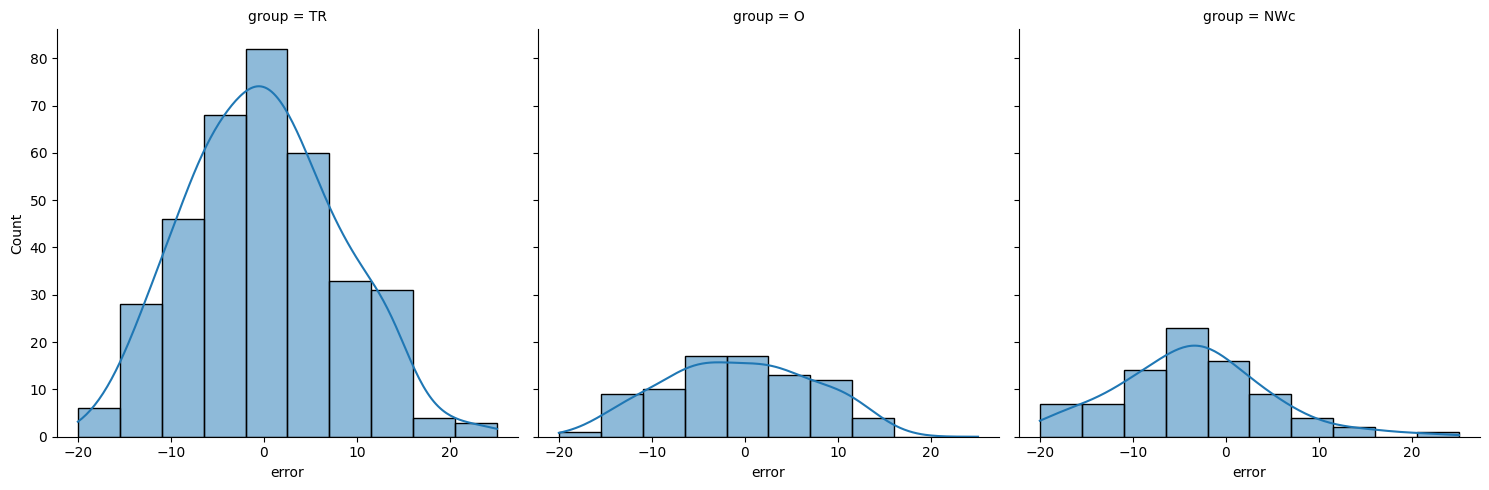

In [89]:
sns.displot(data=tot_gm_df, x='error', col='group', bins=10, kde=True)

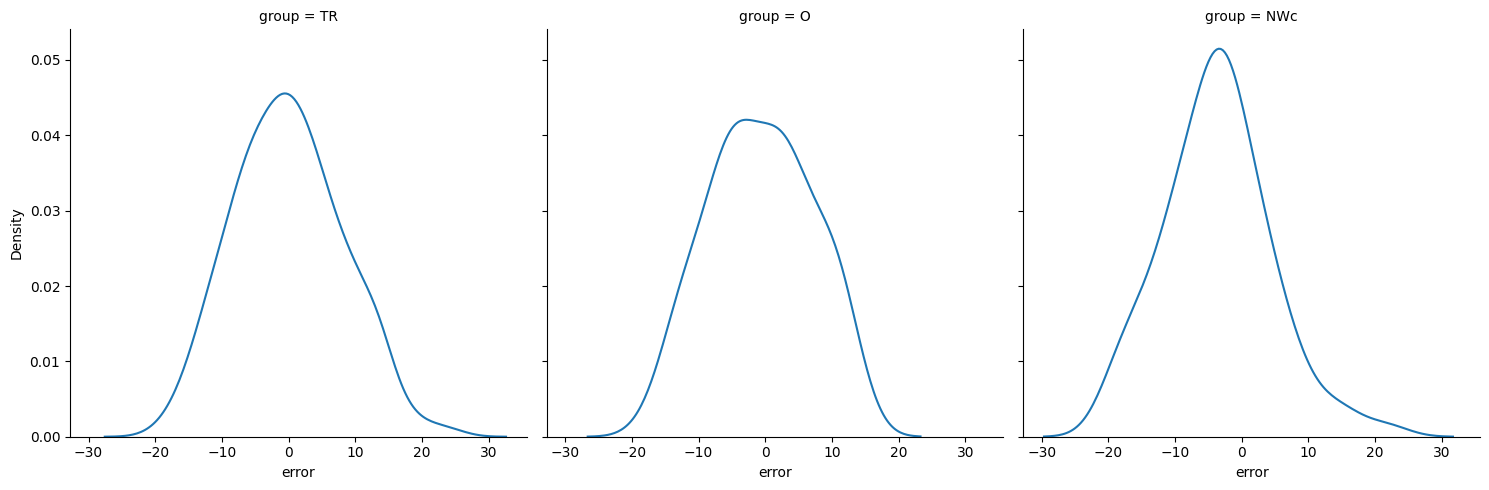

In [90]:
sns.displot(data=tot_gm_df, x='error', col='group', kind='kde', common_norm=False)

In [91]:
fig7 = px.scatter(tot_gm_df, x='true age', y='prediction', labels={'x': 'true age', 'y': 'prediction'}, height=600,
                  facet_col='group')
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig7.add_trace(trace, row='all', col='all')
fig7.update_traces(selector=-1, showlegend=True)
fig7.show()

In [92]:
fig6 = px.scatter(tot_gm_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                  trendline="ols", height=600, facet_col='group')
fig6.show()

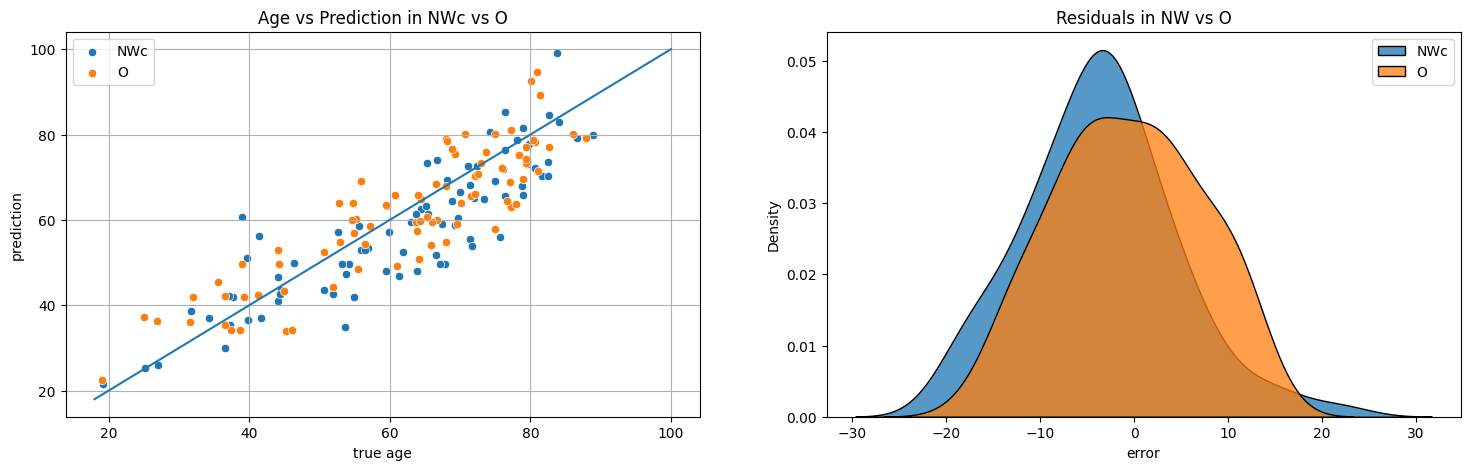

In [93]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
small_gm_df = [ob_gm_df]
labels_df = ['O']
sc1 = sns.scatterplot(test_gm_df, x='true age', y='prediction', ax=axes[0], label='NWc')
sc2 = sns.scatterplot(ob_gm_df, x='true age', y='prediction', ax=axes[0], label='O')
sns.lineplot(x=[18, 100], y=[18, 100], ax=axes[0])
kd1 = sns.kdeplot(test_gm_df, x='error', ax=axes[1], multiple='stack', label='NWc')
kd2 = sns.kdeplot(ob_gm_df, x='error', ax=axes[1], multiple='stack', label='O')
axes[0].title.set_text('Age vs Prediction in NWc vs O')
axes[1].title.set_text('Residuals in NW vs O')
axes[0].legend()
axes[1].legend()
axes[0].grid()


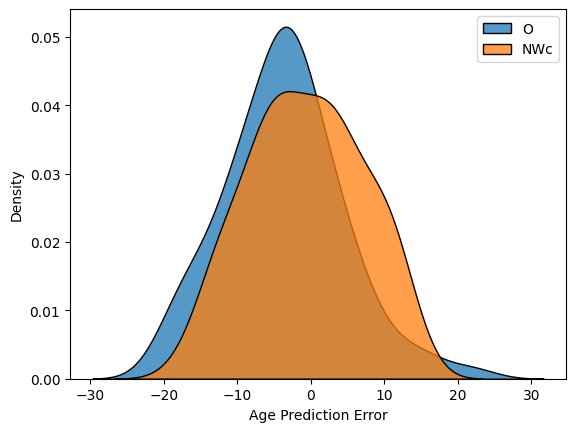

In [94]:
kd1 = sns.kdeplot(test_gm_df, x='error', multiple='stack', label='O')
kd2 = sns.kdeplot(ob_gm_df, x='error', multiple='stack', label='NWc')
plt.xlabel('Age Prediction Error')
plt.legend()

(-40.0, 40.0)

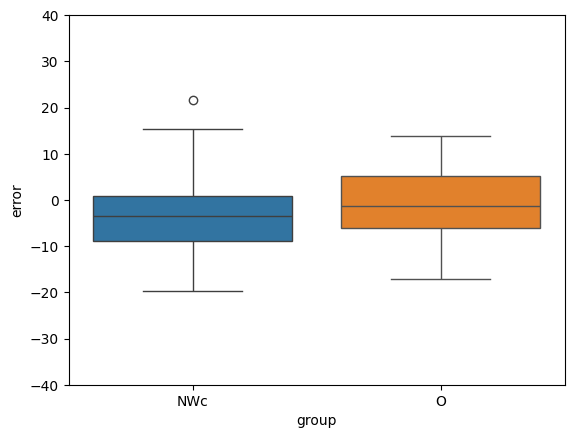

In [95]:
sns.boxplot(data=test_gm_df, x='group', y='error')
sns.boxplot(data=ob_gm_df, x='group', y='error')
plt.ylim(-40, 40)

###Comparisons in different age bins

<Figure size 1800x500 with 0 Axes>

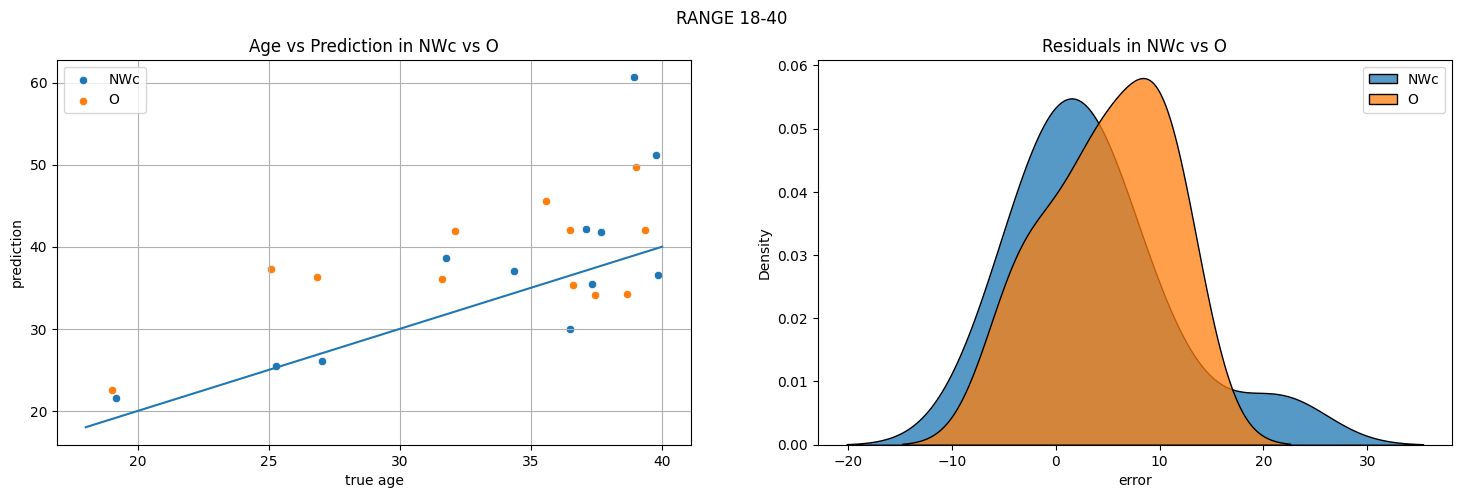

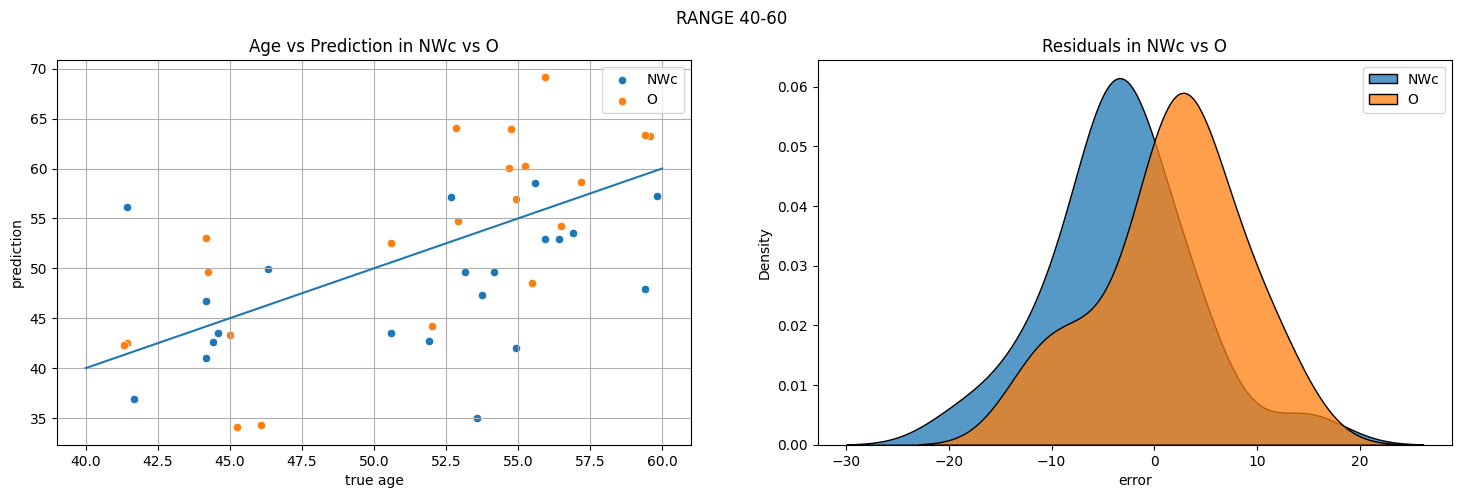

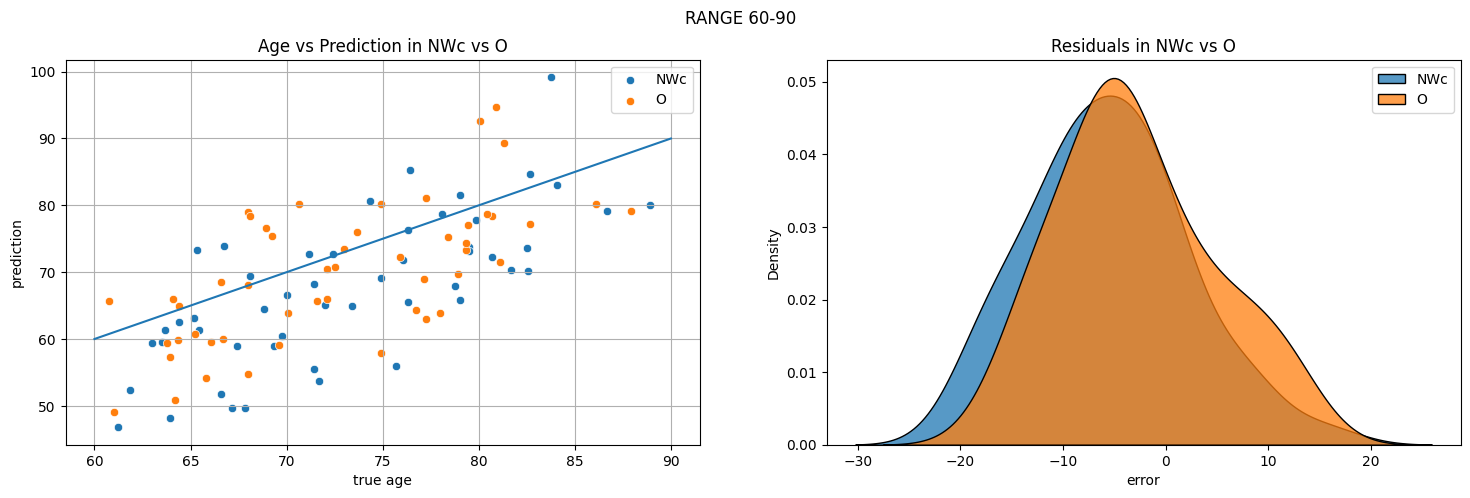

In [96]:
fig11 = plt.figure(layout='constrained', figsize=(18, 5))
subfig = fig11.subfigures(len(bins) - 1, 1)
bins = [18, 40, 60, 90]
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    gm_test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(gm_test_bin_df, x='true age', y='prediction', ax=axes[0], label='NWc')
    sc2 = sns.scatterplot(ob_bin, x='true age', y='prediction', ax=axes[0], label='O')
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(gm_test_bin_df, x='error', ax=axes[1], multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', ax=axes[1], multiple='stack', label='O')
    axes[0].title.set_text('Age vs Prediction in NWc vs O')
    axes[1].title.set_text('Residuals in NWc vs O')
    axes[0].legend()
    axes[1].legend()
    axes[0].grid()

<Figure size 800x600 with 0 Axes>

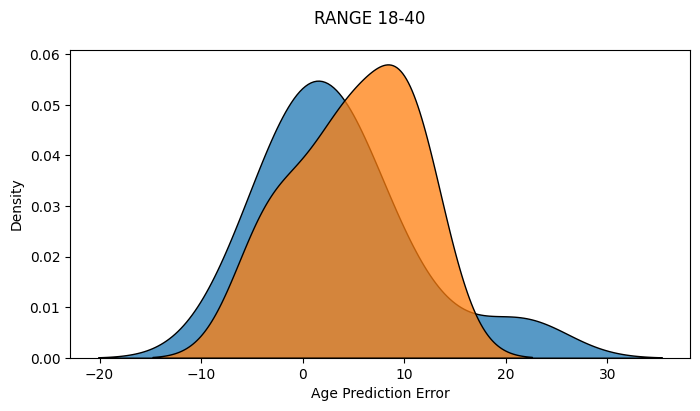

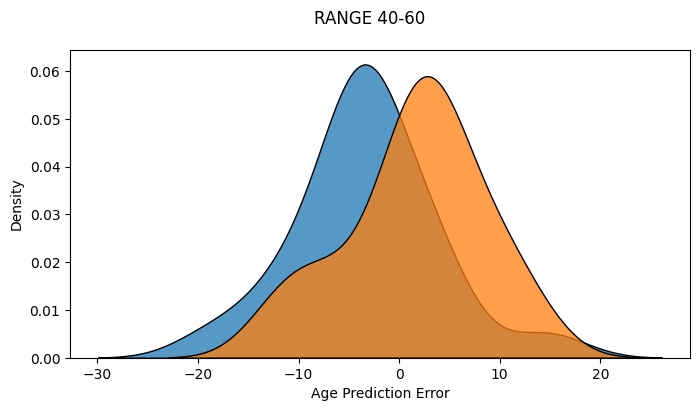

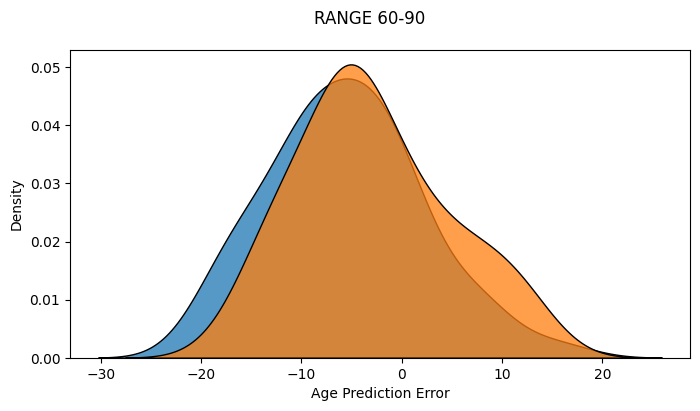

In [97]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 4))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(test_bin_df, x='error', multiple='stack', label='NWc')
    kd2 = sns.kdeplot(ob_bin, x='error', multiple='stack', label='O')
    plt.xlabel('Age Prediction Error')

<Figure size 800x600 with 0 Axes>

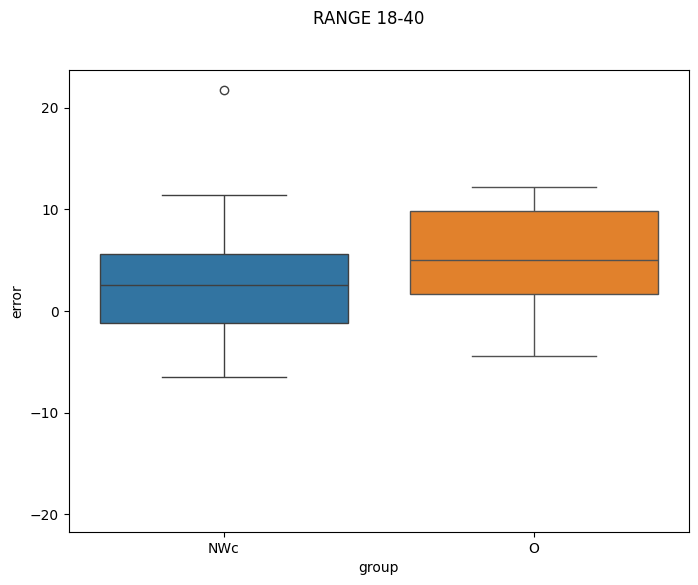

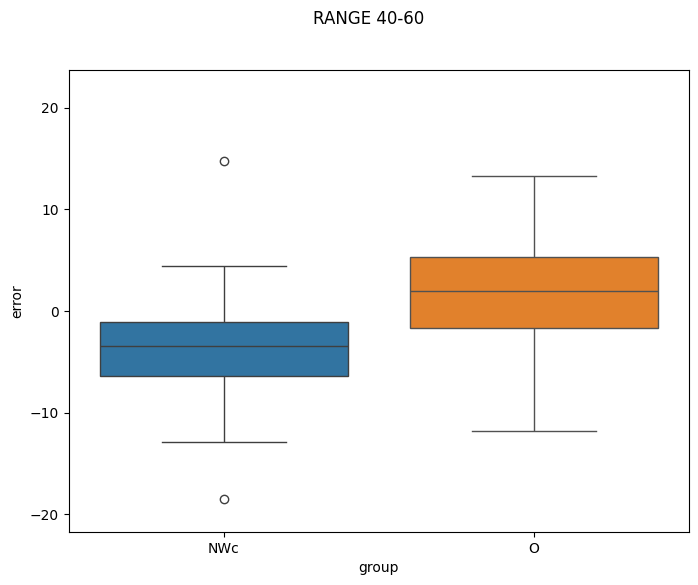

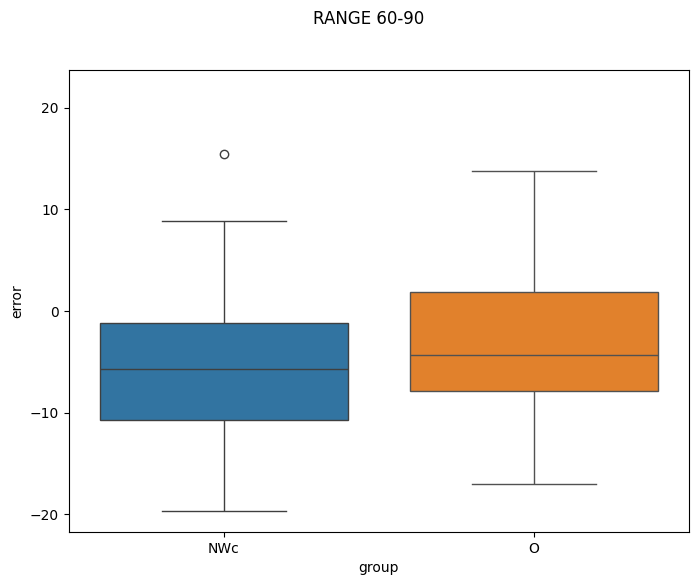

In [98]:
fig11 = plt.figure(layout='constrained', figsize=(8, 6))
subfig = fig11.subfigures(len(bins) - 1, 1)
for bin_id in range(len(bins) - 1):
    subfig[bin_id] = plt.figure(figsize=(8, 6))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    ob_bin = ob_gm_df[(bins[bin_id] <= ob_gm_df['true age']) & (ob_gm_df['true age'] < bins[bin_id + 1])]
    sc1 = sns.boxplot(test_bin_df, x='group', y='error')
    sc2 = sns.boxplot(ob_bin, x='group', y='error')
    plt.ylim([np.min(np.concatenate((ob_gm_df['error'], test_gm_df['error']))) - 2,
              np.max(np.concatenate((ob_gm_df['error'], test_gm_df['error']))) + 2])

In [99]:
intervals = []
small_gm_df = [test_gm_df, ob_gm_df]
dataf_means = [[], []]
errors_df = [[], []]
std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_gm_df)):
        dataf_bin = small_gm_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors_df[dfi].append(dfi_bin['error'].values)
        dataf_means[dfi].append(dfi_bin['error'].mean())
        std_devs[dfi].append(dfi_bin['error'].std())
print(intervals)
print(dataf_means)
print(std_devs)

['18-40', '40-60', '60-90']
[[np.float64(3.502889770347373), np.float64(-3.274431359872856), np.float64(-5.59027596924996)], [np.float64(4.96034234170006), np.float64(1.6017910735179262), np.float64(-2.8827215029696207)]]
[[7.478191870469541, 6.963802511450845, 7.664640315939648], [5.686880068181257, 6.780894478729726, 7.642165925315611]]


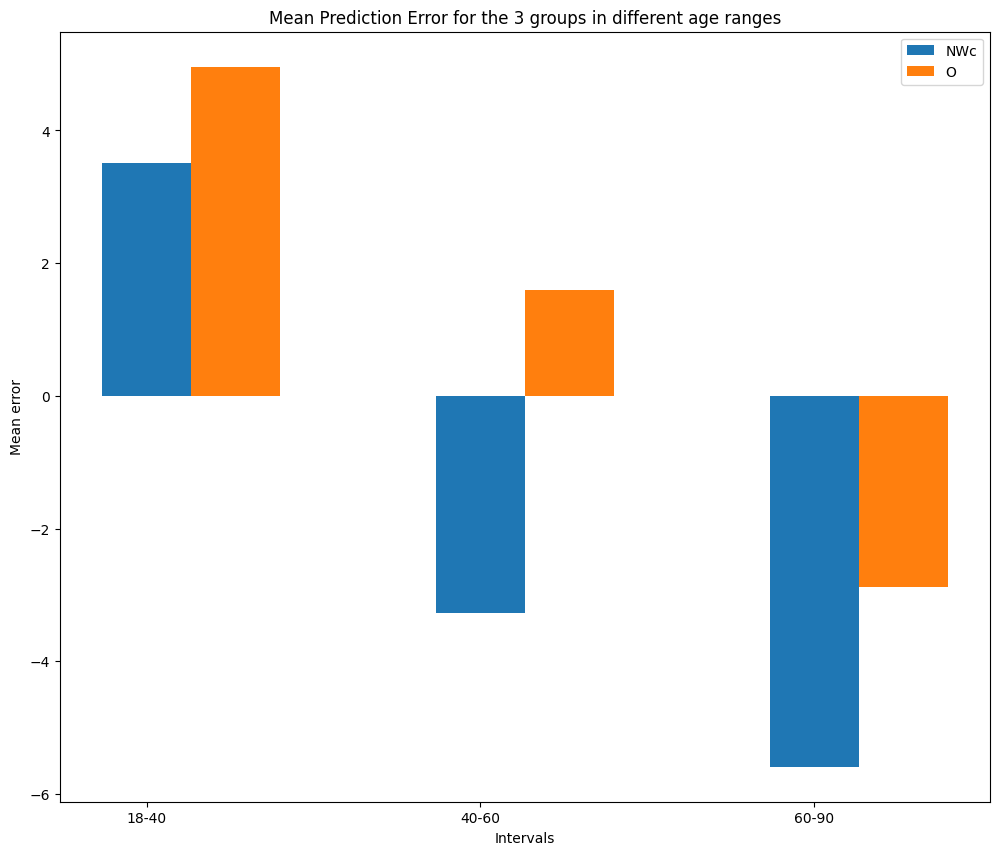

In [100]:
barfig = plt.figure(figsize=(12, 10))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 3 groups in different age ranges")
plt.legend()
plt.show()

###Stats (Age Group)

In [101]:
for bin_i in range(len(errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(errors_df[0][bin_i], errors_df[1][bin_i], equal_var=False)
    print('norm test and obese:', ob_nw_tt.pvalue)


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese: 0.5967712459397178

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese: 0.02681244258408704

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese: 0.08002939521899285


##CORRECTIONS


Correction on Residuals

In [102]:
fig_reg_gm = px.scatter(norm_gm_df, x='true age', y='error', labels={'x': 'true age', 'y': 'prediction error'},
                        trendline="ols", height=600, width=800)
#trace = go.Scatter(x=[18,100],y=[0,0], mode='lines', line_color='black', name='no prediction error')
#trace.update(showlegend=False)
#fig6.add_trace(trace, row='all', col='all')
#fig6.update_traces(selector=-1, showlegend=True)
fig_reg_gm.show()

In [103]:
b0, b1 = px.get_trendline_results(fig_reg_gm).px_fit_results.iloc[0].params
print('intercept:', b0)
print('slope:', b1)

intercept: 10.882969739846915
slope: -0.21031154067527352


In [104]:
corr_tr = norm_gm_df['prediction'] - (b1 * norm_gm_df['true age'] + b0)
corr_nw = gm_test_df['prediction'] - (b1 * gm_test_df['test true age'] + b0)
corr_ob = ob_gm_pred - (b1 * ob_age + b0)

In [105]:
corr_err_tr = corr_tr - norm_gm_df['true age']
corr_err_ob = corr_ob - ob_age
corr_err_nw = corr_nw - gm_test_df['test true age']
correction_train = pd.DataFrame({'true age': norm_gm_df['true age'], 'corr_pred': corr_tr, 'corr_res': corr_err_tr,
                                 'group': np.repeat('TR', len(norm_gm_df['true age']))})
correction_nw_df = pd.DataFrame({'true age': gm_test_df['test true age'], 'corr_pred': corr_nw, 'corr_res': corr_err_nw,
                                 'group': np.repeat('NWc', len(gm_test_df['test true age']))})
correction_ob_df = pd.DataFrame(
    {'true age': ob_age, 'corr_pred': corr_ob, 'corr_res': corr_err_ob, 'group': np.repeat('O', len(ob_age))})
tot_corr = pd.concat([correction_train, correction_nw_df, correction_ob_df])

In [106]:
alt_fig = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'corr_pred_error'},
                     trendline="ols", height=600, facet_col='group')
alt_fig.update_xaxes(showgrid=False)
alt_fig.update_yaxes(showline=True, linecolor='black', showgrid=False)
alt_fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
alt_fig.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
alt_fig.show()

In [107]:
fig93 = px.scatter(tot_corr, x='true age', y='corr_pred', labels={'x': 'true age', 'y': 'corr_pred_error'}, height=600,
                   facet_col='group')
fig93.update_xaxes(showgrid=False)
fig93.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig93.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig93.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
trace = go.Scatter(x=[18, 90], y=[18, 90], mode='lines', line_color='red', name='optimal prediction')
trace.update(showlegend=False)
fig93.add_trace(trace, row='all', col='all')
fig93.show()

####Statistics (Corrections)

In [108]:
print('R2 TRAIN:', metrics.r2_score(norm_gm_df['true age'], corr_tr))
print('R2 NW:', metrics.r2_score(gm_test_df['test true age'], corr_nw))
print('R2 OB:', metrics.r2_score(ob_age, corr_ob))

R2 TRAIN: 0.848074413926405
R2 NW: 0.775479156777882
R2 OB: 0.7935179137018109


In [109]:
print('MAE TR:', np.abs(corr_err_tr).mean())
print('MAE NW:', np.abs(corr_err_nw).mean())
print('MAE OB:', np.abs(corr_err_ob).mean())


MAE TR: 5.750324936485985
MAE NW: 5.967544521655631
MAE OB: 5.885078705810409


In [110]:
print('MEAN ERROR TR:', corr_err_tr.mean())
print('MEAN ERROR NW:', corr_err_nw.mean())
print('MEAN ERROR OB:', corr_err_ob.mean())

MEAN ERROR TR: 7.08574473334172e-16
MEAN ERROR NW: -1.5479901649217571
MEAN ERROR OB: 1.4718819295147096


In [111]:
print('NW mean residuals:', round(corr_err_nw.mean(), 2), 'std', round(corr_err_nw.std(), 2))
print('O mean residuals:', round(corr_err_ob.mean(), 2), 'std:', round(corr_err_ob.std(), 2))
print('O-NW:', round(corr_err_ob.mean() - corr_err_nw.mean(), 2))

NW mean residuals: -1.55 std 7.61
O mean residuals: 1.47 std: 7.24
O-NW: 3.02


In [112]:
stats.ttest_ind(corr_err_ob, corr_err_nw, equal_var=False)

TtestResult(statistic=np.float64(2.620717994900083), pvalue=np.float64(0.009601143371119997), df=np.float64(163.59316919146758))

In [113]:
intervals = []
small_gm_df = [correction_nw_df, correction_ob_df]
corr_dataf_means = [[], []]
corr_errors_df = [[], []]
corr_std_devs = [[], []]
for bin_id in range(len(bins) - 1):
    intervals.append(str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    for dfi in range(len(small_gm_df)):
        dataf_bin = small_gm_df[dfi]
        dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
        errors = dfi_bin['corr_res'].values
        corr_errors_df[dfi].append(errors)
        corr_dataf_means[dfi].append(errors.mean())
        corr_std_devs[dfi].append(errors.std())
print(intervals)
print(corr_dataf_means)
print(corr_std_devs)

['18-40', '40-60', '60-90']
[[np.float64(-0.28942637563269535), np.float64(-3.385344134684963), np.float64(-1.078356807050585)], [np.float64(1.046571280980022), np.float64(1.5299361562597984), np.float64(1.5495737099300977)]]
[[np.float64(7.587103970104519), np.float64(6.338654441242064), np.float64(7.884703556489466)], [np.float64(5.12088565069575), np.float64(7.0142902887741085), np.float64(7.671741650721237)]]


In [114]:
for bin_i in range(len(corr_errors_df[0])):
    print('\n#### BIN [', bins[bin_i], '-', bins[bin_i + 1], '] ####\n')
    print('####### t-test #######')
    ob_nw_tt = stats.ttest_ind(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i], equal_var=False)
    print('norm test and obese (pvalue):', round(ob_nw_tt.pvalue, 3))
    print('norm test and obese (t):', round(ob_nw_tt.statistic, 3))
    print('rel t-test:', round(stats.ttest_rel(corr_errors_df[1][bin_i], corr_errors_df[0][bin_i]).pvalue, 3))
    print('NW: ', round(corr_dataf_means[0][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[0][bin_i], 2)) + ')')
    print('O: ', round(corr_dataf_means[1][bin_i], 2),
          '(' + u"\u00B1" + ' ' + str(round(corr_std_devs[1][bin_i], 2)) + ')')
    print('O-NW: ', round(corr_dataf_means[1][bin_i] - corr_dataf_means[0][bin_i], 2))


#### BIN [ 18 - 40 ] ####

####### t-test #######
norm test and obese (pvalue): 0.634
norm test and obese (t): 0.484
rel t-test: 0.683
NW:  -0.29 (± 7.59)
O:  1.05 (± 5.12)
O-NW:  1.34

#### BIN [ 40 - 60 ] ####

####### t-test #######
norm test and obese (pvalue): 0.025
norm test and obese (t): 2.325
rel t-test: 0.049
NW:  -3.39 (± 6.34)
O:  1.53 (± 7.01)
O-NW:  4.92

#### BIN [ 60 - 90 ] ####

####### t-test #######
norm test and obese (pvalue): 0.098
norm test and obese (t): 1.672
rel t-test: 0.085
NW:  -1.08 (± 7.88)
O:  1.55 (± 7.67)
O-NW:  2.63


## Representations (entire datasets)

In [115]:
fig6 = px.scatter(tot_corr, x='true age', y='corr_res', labels={'x': 'true age', 'y': 'z (prediction error)'},
                  trendline="ols", height=600, facet_col='group')
fig6.update_traces(selector=-1, showlegend=True)
fig6.update_xaxes(showgrid=False)
fig6.update_yaxes(showline=True, linecolor='black', showgrid=False)
fig6.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig6.for_each_yaxis(lambda yax: yax.update(showticklabels=True))
fig6.show()

Text(0.5, 0, 'Corrected Brain Age Delta')

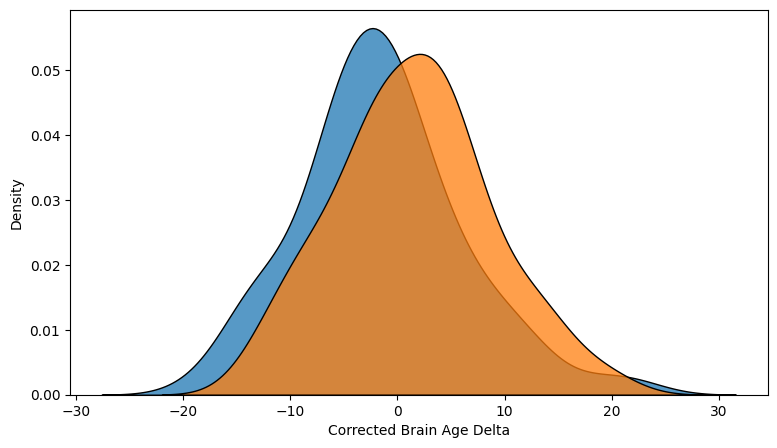

In [116]:
fig_corr = plt.figure(figsize=(9, 5))
kd1 = sns.kdeplot(correction_nw_df, x='corr_res', multiple='stack', label='NWc')
kd2 = sns.kdeplot(correction_ob_df, x='corr_res', multiple='stack', label='O')
plt.xlabel('Corrected Brain Age Delta')

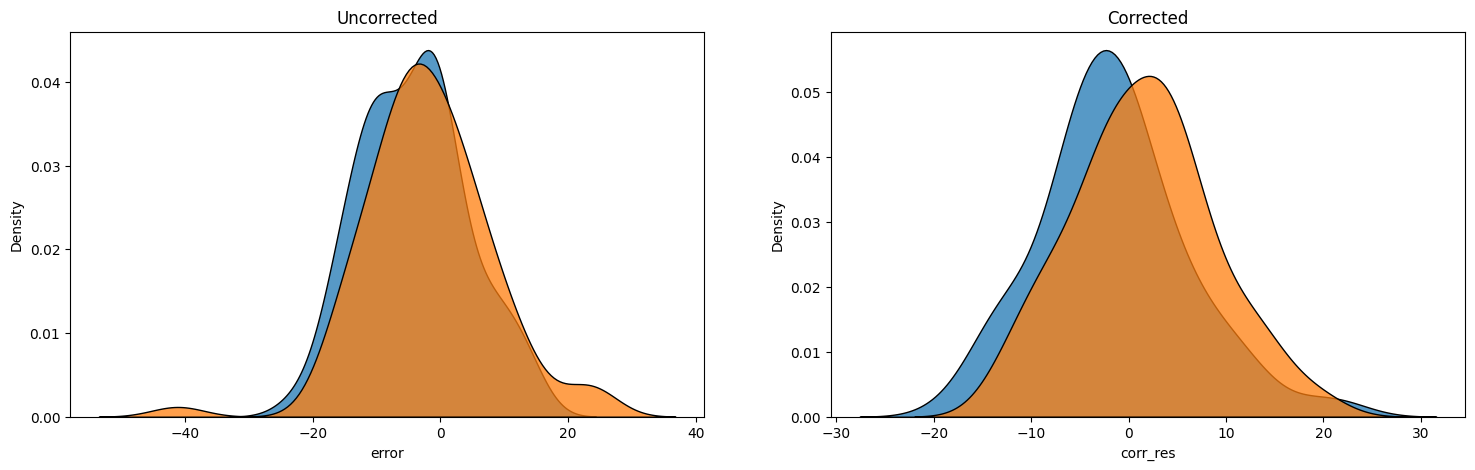

In [117]:
fig10, axes = plt.subplots(ncols=2, figsize=(18, 5))
kd1 = sns.kdeplot(test_ss_df, x='error', multiple='stack', label='NWc', ax=axes[0])
kd2 = sns.kdeplot(ob_df, x='error', multiple='stack', label='O', ax=axes[0])
kd1 = sns.kdeplot(correction_nw_df, x='corr_res', multiple='stack', label='NWc', ax=axes[1])
kd2 = sns.kdeplot(correction_ob_df, x='corr_res', multiple='stack', label='O', ax=axes[1])
axes[0].title.set_text('Uncorrected')
axes[1].title.set_text('Corrected')

Text(0, 0.5, 'Corrected Brain Age Delta')

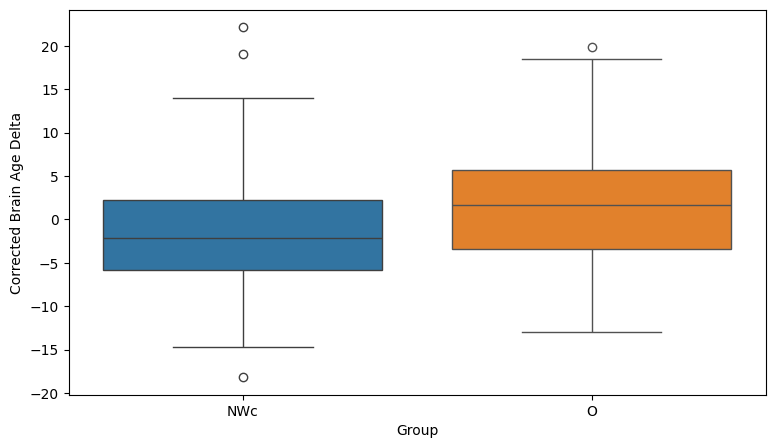

In [118]:
fig_cor2 = plt.figure(figsize=(9, 5))
sns.boxplot(data=correction_nw_df, x='group', y='corr_res')
sns.boxplot(data=correction_ob_df, x='group', y='corr_res')
plt.xlabel('Group')
plt.ylabel('Corrected Brain Age Delta')

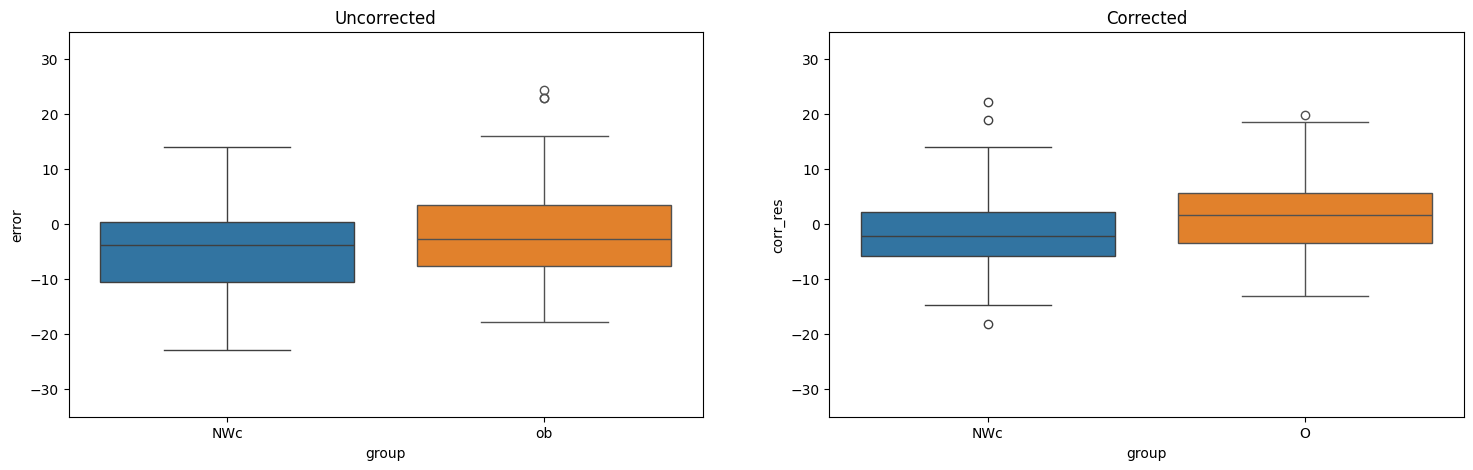

In [119]:
fig11, axes = plt.subplots(ncols=2, figsize=(18, 5))
sns.boxplot(data=test_ss_df, x='group', y='error', ax=axes[0])
sns.boxplot(data=ob_df, x='group', y='error', ax=axes[0])
sns.boxplot(data=correction_nw_df, x='group', y='corr_res', ax=axes[1])
sns.boxplot(data=correction_ob_df, x='group', y='corr_res', ax=axes[1])
axes[0].set_ylim(-35, 35)
axes[1].set_ylim(-35, 35)
axes[0].title.set_text('Uncorrected')
axes[1].title.set_text('Corrected')

In [120]:
bins = [18, 40, 60, 90]

<Figure size 1800x500 with 0 Axes>

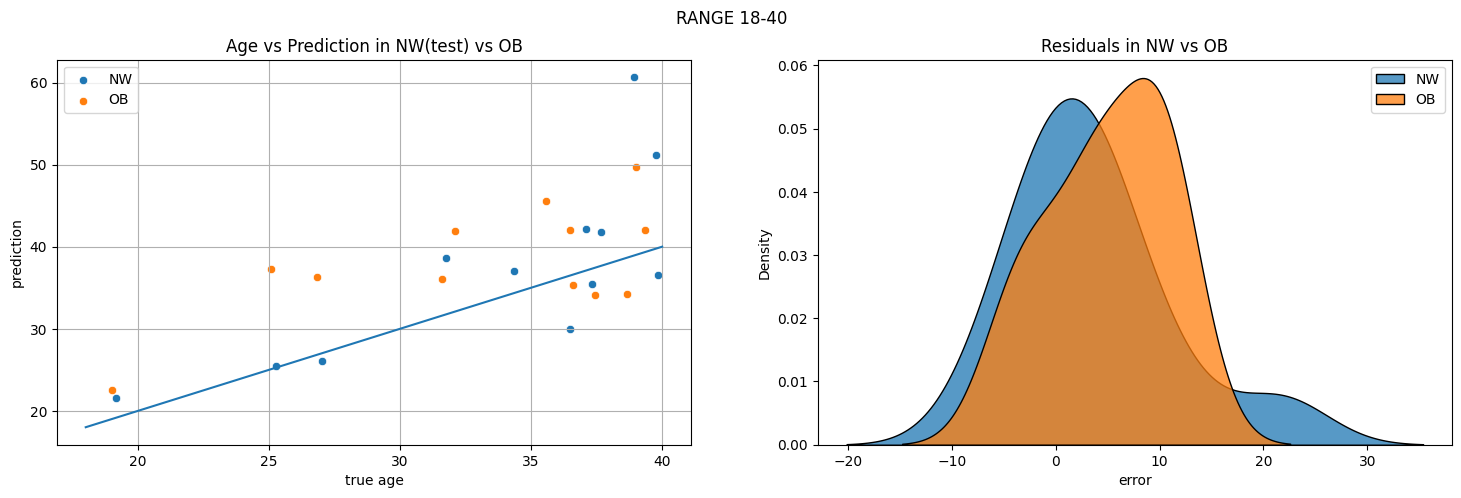

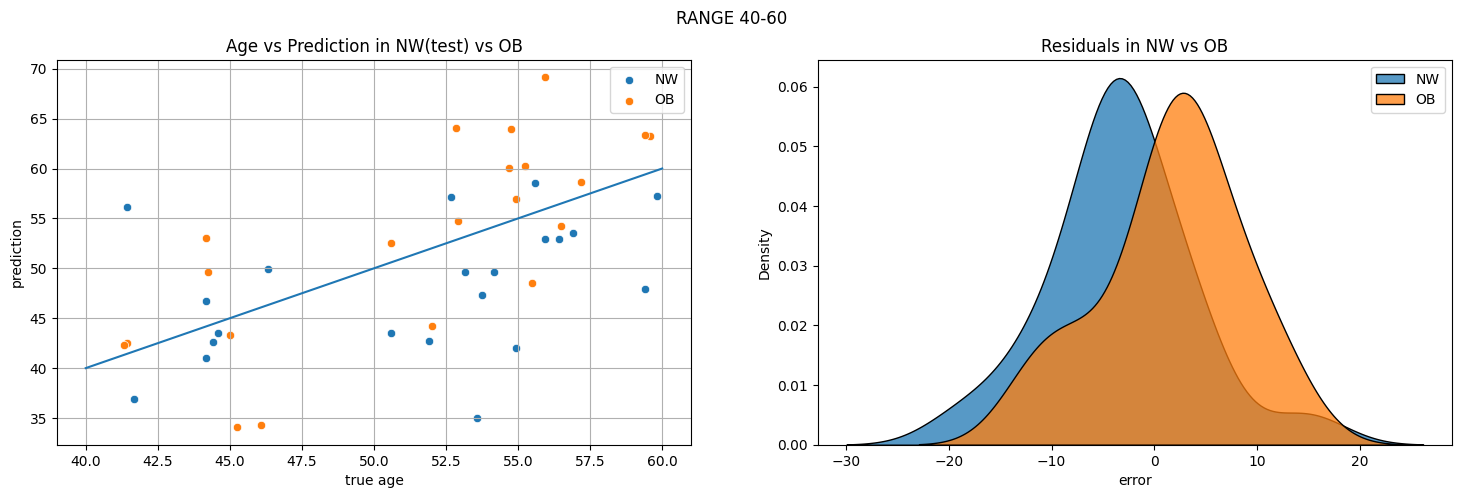

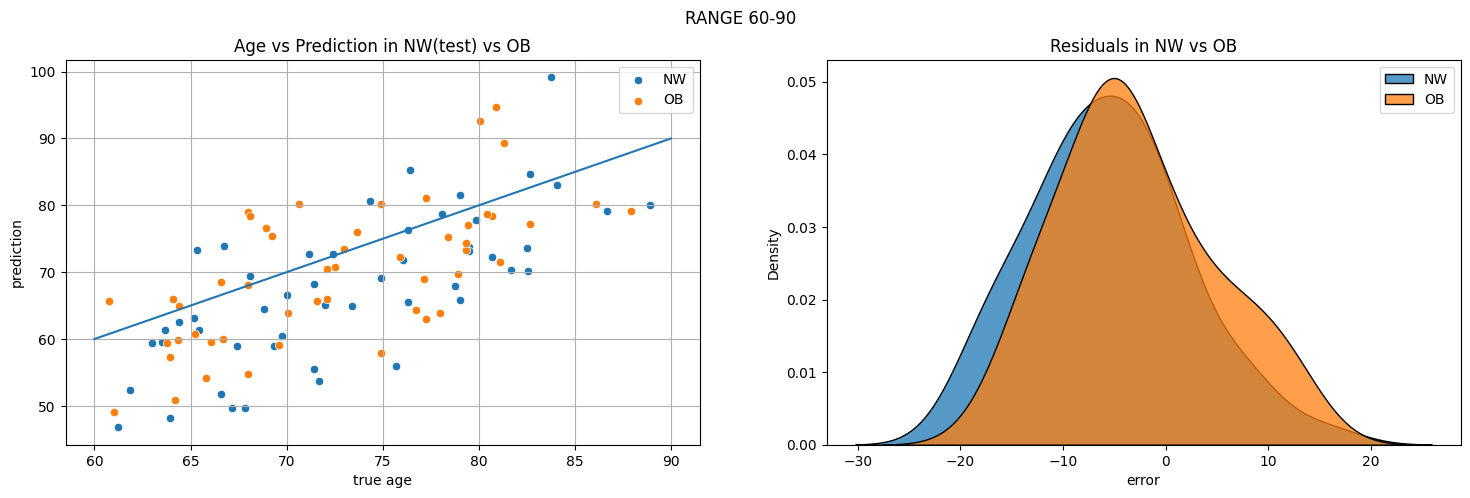

In [121]:
fig11 = plt.figure(layout='constrained', figsize=(18, 5))
subfig = fig11.subfigures(len(bins) - 1, 1)
small_df = [ob_gm_df]
labels_df = ['OB']
for bin_id in range(len(bins) - 1):
    subfig[bin_id], axes = plt.subplots(ncols=2, figsize=(18, 5))
    subfig[bin_id].suptitle('RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
    sc1 = sns.scatterplot(test_bin_df, x='true age', y='prediction', ax=axes[0], label='NW')
    sc2 = sns.scatterplot(dfi_bin, x='true age', y='prediction', ax=axes[0], label=labels_df[0])
    sns.lineplot(x=[bins[bin_id], bins[bin_id + 1]], y=[bins[bin_id], bins[bin_id + 1]], ax=axes[0])
    kd1 = sns.kdeplot(test_bin_df, x='error', ax=axes[1], multiple='stack', label='NW')
    kd2 = sns.kdeplot(dfi_bin, x='error', ax=axes[1], multiple='stack', label=labels_df[0])
    axes[0].title.set_text('Age vs Prediction in NW(test) vs ' + labels_df[0])
    axes[1].title.set_text('Residuals in NW vs ' + labels_df[0])
    axes[0].legend()
    axes[1].legend()
    axes[0].grid()

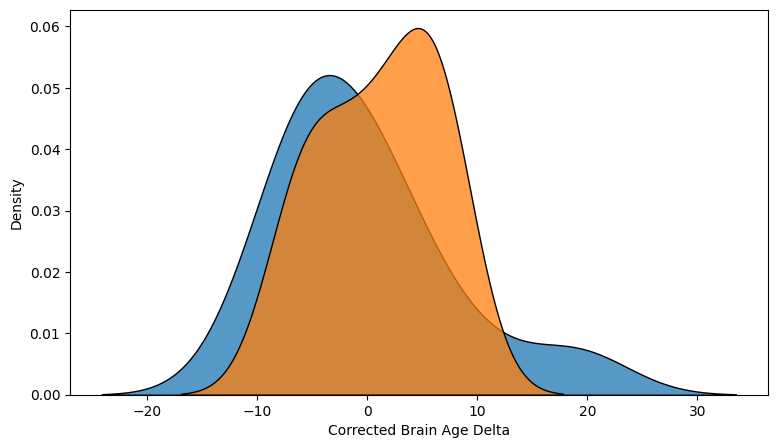

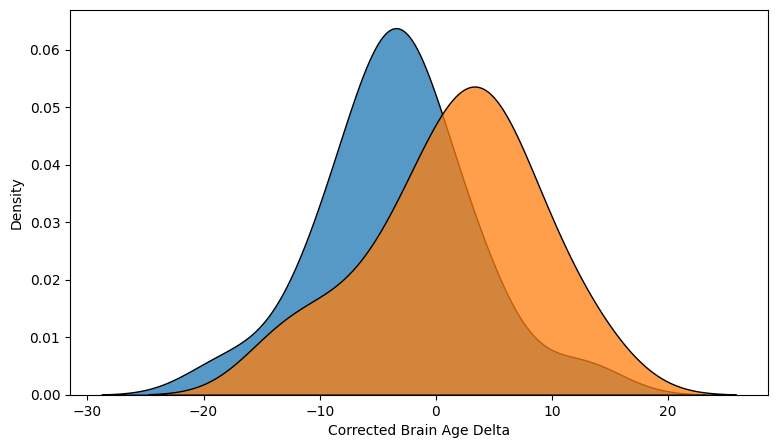

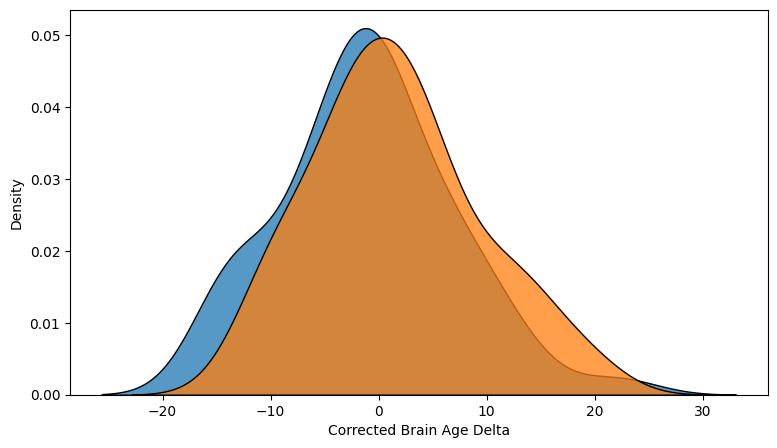

In [122]:
for bin_id in range(len(bins) - 1):
    corr_fig3 = plt.figure(figsize=(9, 5))
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(corr_test_bin_df, x='corr_res', multiple='stack', label='NW')
    kd2 = sns.kdeplot(corr_ob_bin, x='corr_res', multiple='stack', label='O')
    plt.xlabel('Corrected Brain Age Delta')

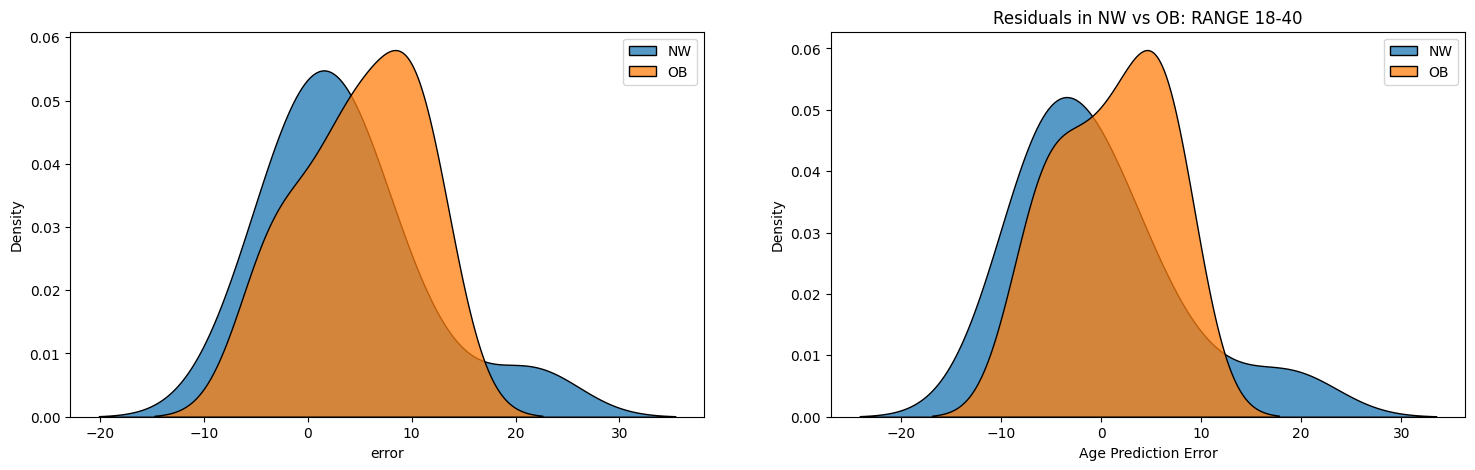

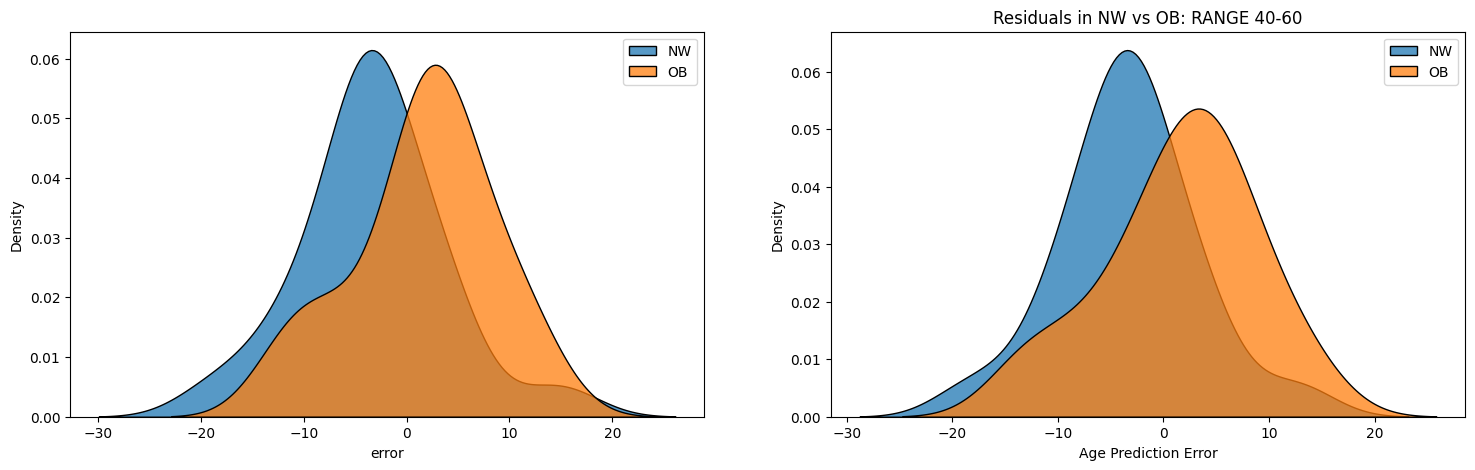

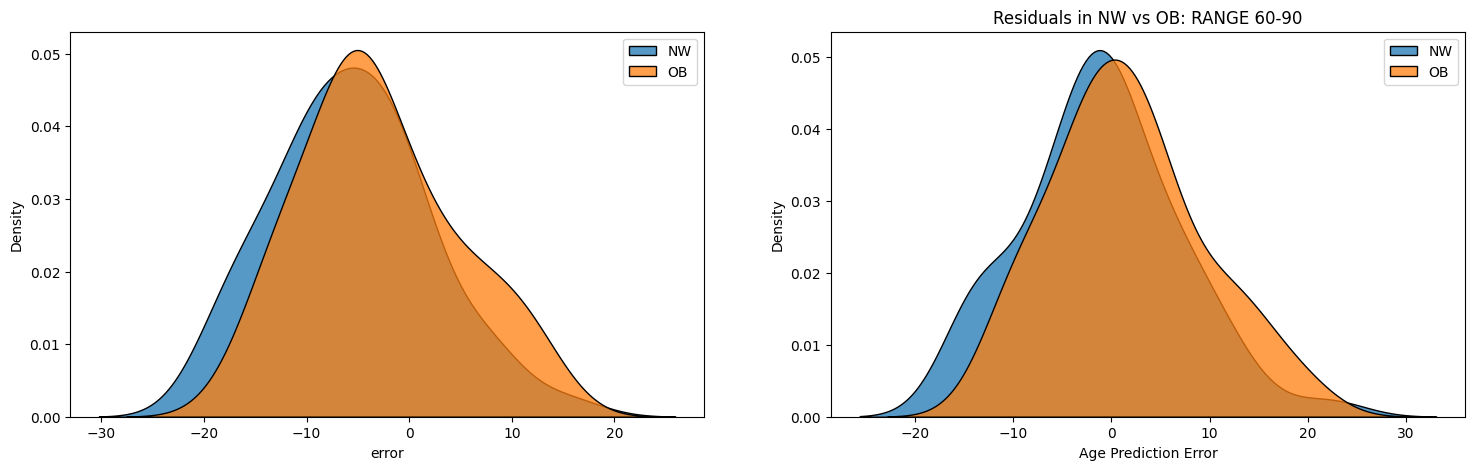

In [123]:

small_df = [ob_gm_df]
labels_df = ['OB']
for bin_id in range(len(bins) - 1):
    fig1, axes = plt.subplots(ncols=2, figsize=(18, 5))
    plt.title('Residuals in NW vs ' + labels_df[0] + ': RANGE ' + str(bins[bin_id]) + '-' + str(bins[bin_id + 1]))
    dataf_bin = small_df[0]
    test_bin_df = test_gm_df[(bins[bin_id] < test_gm_df['true age']) & (test_gm_df['true age'] < bins[bin_id + 1])]
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    dfi_bin = dataf_bin[(bins[bin_id] <= dataf_bin['true age']) & (dataf_bin['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.kdeplot(test_bin_df, x='error', multiple='stack', label='NW', ax=axes[0])
    kd2 = sns.kdeplot(dfi_bin, x='error', multiple='stack', label=labels_df[0], ax=axes[0])
    kd1 = sns.kdeplot(corr_test_bin_df, x='corr_res', multiple='stack', label='NW', ax=axes[1])
    kd2 = sns.kdeplot(corr_ob_bin, x='corr_res', multiple='stack', label=labels_df[0], ax=axes[1])
    plt.xlabel('Age Prediction Error')
    axes[0].legend()
    axes[1].legend()
    plt.show()

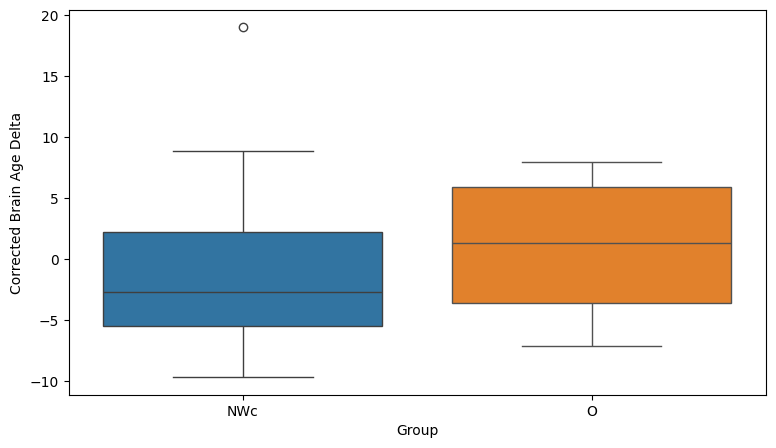

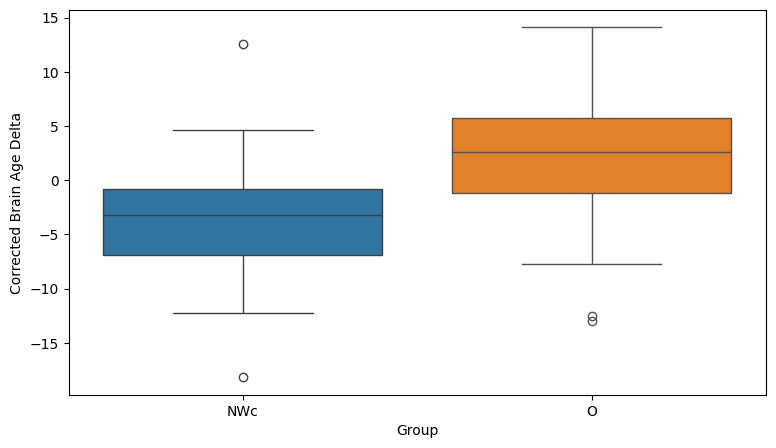

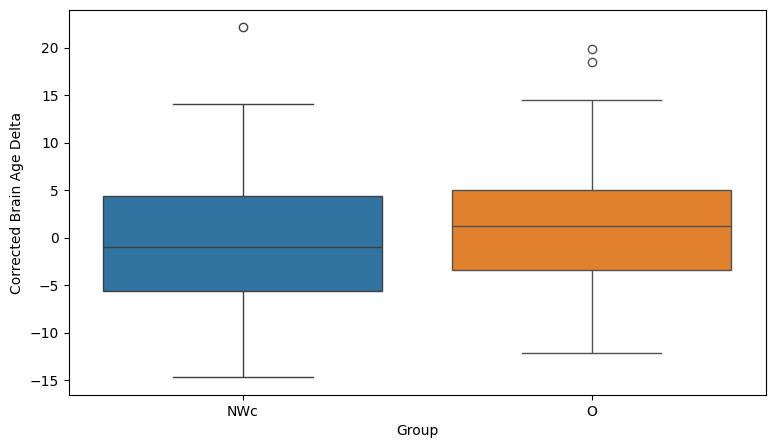

In [124]:
for bin_id in range(len(bins) - 1):
    corr_fig3 = plt.figure(figsize=(9, 5))
    corr_test_bin_df = correction_nw_df[
        (bins[bin_id] < correction_nw_df['true age']) & (correction_nw_df['true age'] < bins[bin_id + 1])]
    corr_ob_bin = correction_ob_df[
        (bins[bin_id] <= correction_ob_df['true age']) & (correction_ob_df['true age'] < bins[bin_id + 1])]
    kd1 = sns.boxplot(corr_test_bin_df, x='group', y='corr_res')
    kd2 = sns.boxplot(corr_ob_bin, x='group', y='corr_res')
    plt.xlabel('Group')
    plt.ylabel('Corrected Brain Age Delta')

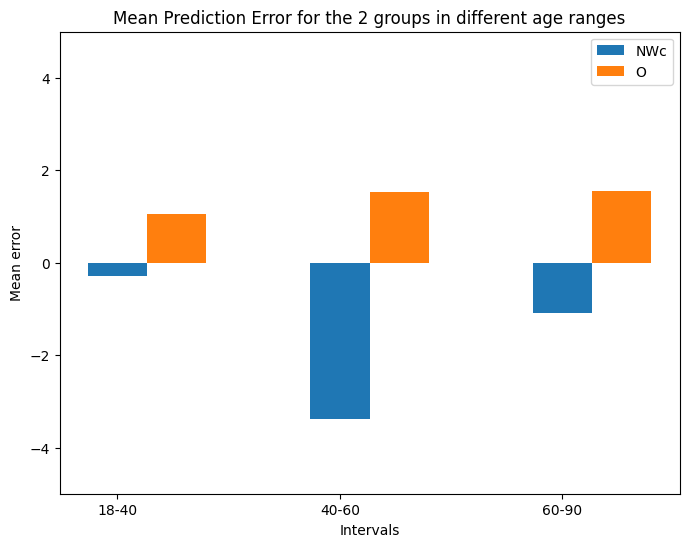

In [125]:
barfig = plt.figure(figsize=(8, 6))
labels_df = ['NWc', 'O']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    plt.bar(inter + lab * 0.8, corr_dataf_means[lab], label=labels_df[lab])
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.ylim(-5, 5)
plt.show()

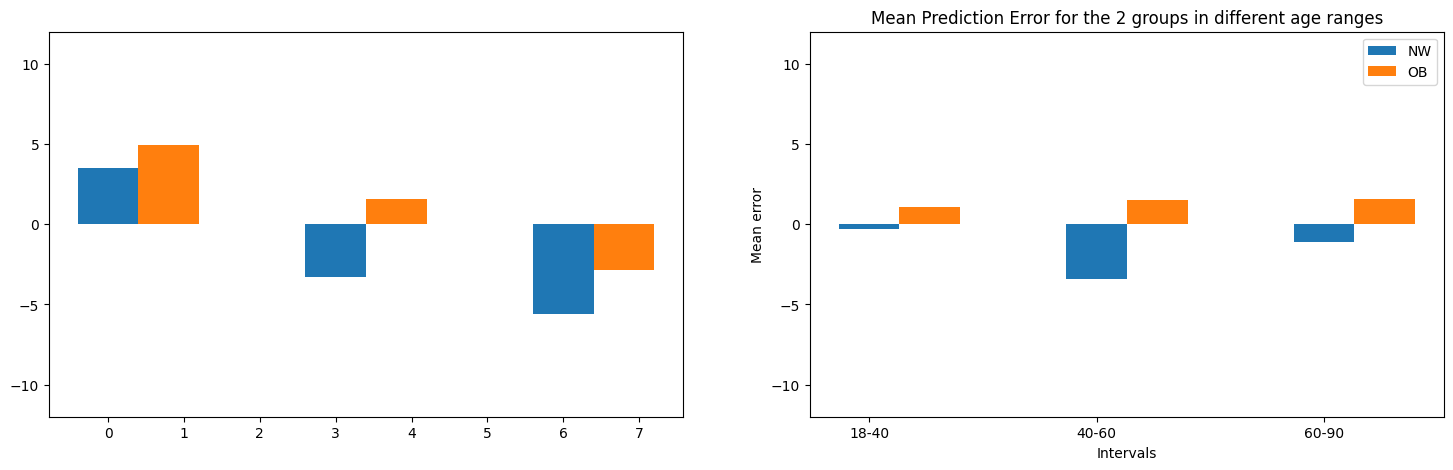

In [126]:
barfig, axes = plt.subplots(ncols=2, figsize=(18, 5))
labels_df = ['NW', 'OB']
inter = np.arange(len(intervals)) * 3
for lab in range(len(labels_df)):
    axes[0].bar(inter + lab * 0.8, dataf_means[lab], label=labels_df[lab])
    axes[1].bar(inter + lab * 0.8, corr_dataf_means[lab], label=labels_df[lab])
axes[0].set_ylim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.xticks(inter, intervals)
plt.xlabel("Intervals")
plt.ylabel("Mean error")
plt.title("Mean Prediction Error for the 2 groups in different age ranges")
plt.legend()
plt.show()

###Representation (Correction)

In [127]:
corr_nw_40_60 = correction_nw_df[(40 <= correction_nw_df['true age']) & (correction_nw_df['true age'] < 60)]
corr_ob_40_60 = correction_ob_df[(40 <= correction_ob_df['true age']) & (correction_ob_df['true age'] < 60)]

In [128]:
corr_nw_40_60['BMI'] = data.loc[corr_nw_40_60.index].BMI
corr_ob_40_60['BMI'] = data.loc[corr_ob_40_60.index].BMI

<ipython-input-128-92ba2063840e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-92ba2063840e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



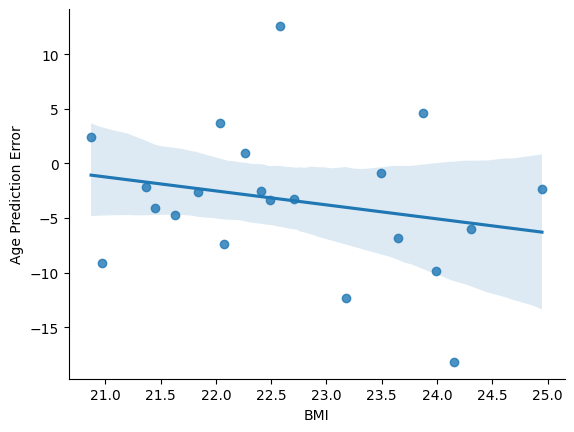

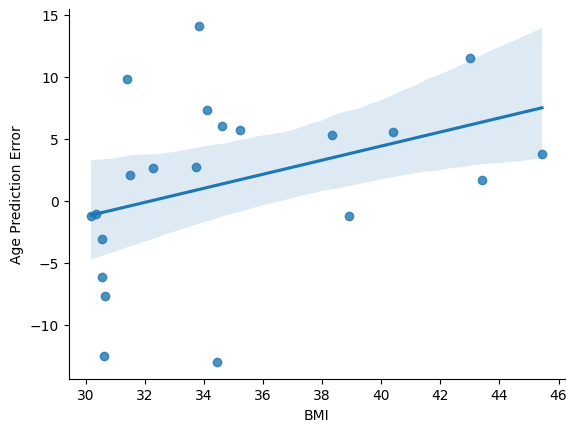

In [129]:
sns.regplot(corr_nw_40_60, x='BMI', y='corr_res')
plt.ylabel('Age Prediction Error')
sns.despine(left=False, bottom=False, right=True)
plt.show()
sns.regplot(corr_ob_40_60, x='BMI', y='corr_res')
plt.ylabel('Age Prediction Error')
sns.despine(left=False, bottom=False, right=True)
plt.show()

In [130]:
np.corrcoef(corr_nw_40_60['BMI'], corr_nw_40_60['corr_res'])

array([[ 1.        , -0.22986618],
       [-0.22986618,  1.        ]])

In [131]:
np.corrcoef(corr_ob_40_60['BMI'], corr_ob_40_60['corr_res'])

array([[1.        , 0.37832983],
       [0.37832983, 1.        ]])

In [132]:
stats.pearsonr(corr_ob_40_60['BMI'], corr_ob_40_60['corr_res'], alternative='greater')

PearsonRResult(statistic=np.float64(0.378329829232621), pvalue=np.float64(0.04540976986974402))

##Bootstrap

In [133]:
n_bs_iterations = 1000
gm_nw_bs_results = []
gm_ob_bs_results = []
gm_res_mae_nw  = []
gm_res_mae_ob = []
gm_features_bs_models = []
for bs_it in range(n_bs_iterations):
  res_train_index = resample(nw_sow_train_index, replace=True, n_samples=len(nw_sow_train_index), random_state=bs_it)

  res_gm_train_sample = gm_values[res_train_index]
  res_gm_x_test = (gm_values[norm_test.index] - np.mean(res_gm_train_sample)) / np.std(res_gm_train_sample)
  res_gm_x_train = (res_gm_train_sample - np.mean(res_gm_train_sample)) / np.std(res_gm_train_sample)
  res_gm_norm_ob_values = (gm_values[obese_ss.index]-np.mean(res_gm_train_sample))/np.std(res_gm_train_sample)

  res_train_age = data.Age[res_train_index]
  res_gm_y_test = (data.Age[norm_test.index]- np.mean(res_train_age))/np.std(res_train_age)
  res_gm_y_train = (res_train_age - np.mean(res_train_age))/np.std(res_train_age)
  res_gm_norm_ob_age = (ob_age - np.mean(res_train_age))/np.std(res_train_age)

  gm_bs_model = ElasticNet(alpha=gm_reg.alpha_, l1_ratio=gm_reg.l1_ratio_, random_state=0)
  gm_bs_model.fit(res_gm_x_train, res_gm_y_train)

  res_gm_train_pred = gm_bs_model.predict(res_gm_x_train)*np.std(res_train_age) + np.mean(res_train_age)
  res_gm_test_pred = gm_bs_model.predict(res_gm_x_test)*np.std(res_train_age) + np.mean(res_train_age)
  res_gm_ob_pred = gm_bs_model.predict(res_gm_norm_ob_values)*np.std(res_train_age) + np.mean(res_train_age)
  gm_features_bs_models.append(gm_bs_model.coef_)

  res_gm_df = pd.DataFrame({'true age': res_train_age, 'error': res_gm_train_pred-res_train_age})
  b0,b1 = px.get_trendline_results(px.scatter(res_gm_df, x='true age', y='error',
                                              trendline="ols",)).px_fit_results.iloc[0].params
  res_gm_corr_tr = res_gm_train_pred - (b1*res_train_age + b0)
  res_gm_corr_nw = res_gm_test_pred  - (b1*data.Age[norm_test.index] + b0)
  res_gm_corr_ob = res_gm_ob_pred - (b1*ob_age + b0)
  res_gm_corr_err_tr = res_gm_corr_tr - res_train_age
  res_gm_corr_err_nw = res_gm_corr_nw - data.Age[norm_test.index]
  res_gm_corr_err_ob = res_gm_corr_ob - ob_age

  gm_nw_bs_results.append(metrics.r2_score(data.Age[norm_test.index], res_gm_corr_nw))
  gm_ob_bs_results.append(metrics.r2_score(ob_age, res_gm_corr_ob))
  gm_res_mae_nw.append(np.abs(res_gm_corr_err_nw).mean())
  gm_res_mae_ob.append(np.abs(res_gm_corr_err_ob).mean())
gm_feat_bs = np.array(gm_features_bs_models)


In [134]:
print('NW R2:', np.mean(gm_nw_bs_results), '±', np.std(gm_nw_bs_results))
print('O R2:', np.mean(gm_ob_bs_results), '±', np.std(gm_ob_bs_results))
print('NW MAE:', np.mean(gm_res_mae_nw), '±', np.std(gm_res_mae_nw))
print('O MAE:', np.mean(gm_res_mae_ob), '±', np.std(gm_res_mae_ob))

NW R2: 0.7606746995083379 ± 0.018025797980637498
O R2: 0.7765038713376087 ± 0.026649954083577503
NW MAE: 6.20126559266864 ± 0.2712071845222983
O MAE: 6.0490153569500835 ± 0.3446156046107997


In [135]:
print('LOWER BOUNDS: \n')
lower_bounds = np.percentile(gm_feat_bs, 2.5, axis=0)
print(lower_bounds.round(5))
print('\n \n UPPER BOUNDS: \n')
upper_bounds = np.percentile(gm_feat_bs, 97.5, axis=0)
print(upper_bounds.round(5))
mean_weights = gm_feat_bs.mean(axis=0)
print('\n \n MEAN WEIGHTS: \n')
print(mean_weights.round(5))

LOWER BOUNDS: 

[-0.35207 -0.86093 -0.38856 -0.92401 -0.31598 -0.28954 -1.10742 -1.21257
 -0.89496 -0.54392  0.      -0.80129 -0.39631 -0.15945  0.      -0.46771
 -0.22213 -0.20254 -0.34478 -0.16619 -1.61298 -0.88574 -0.43834 -0.33171
 -0.40275 -0.75224 -0.84175  0.       0.      -0.31151 -0.36762  0.
 -0.20352 -0.29605 -0.15152 -0.19718 -0.36463 -0.00219 -0.27442 -0.8238
 -1.04937 -0.23289 -0.32559  0.      -0.49169 -0.34143 -0.52324 -1.31944]

 
 UPPER BOUNDS: 

[ 0.27143  0.       0.11455 -0.03564  0.3604  -0.02365  0.       0.
  0.       0.16443  0.76084  0.       0.15595  0.47228  0.9465   0.09246
  0.07112  0.39508  0.28083  0.20429 -0.19194 -0.09131  0.12719  0.2928
  0.       0.      -0.04621  0.86349  0.54514  0.34285  0.       0.29196
  0.18447  0.01937  0.28357  0.43729  0.2132   0.50318  0.32019  0.
 -0.14073  0.402    0.02908  0.       0.       0.       0.09258 -0.32518]

 
 MEAN WEIGHTS: 

[-0.03784 -0.33408 -0.11182 -0.48302  0.01312 -0.15384 -0.48471 -0.59062
 -0.34257 

In [136]:
gm_regions= [gm.loc[0].index[1:49][i] for i in range(48)]
gm_ci_df = pd.DataFrame({'lower': lower_bounds, 'upper': upper_bounds, 'mean': mean_weights, 'label' : gm_regions})
gm_ci_df

lower     upper      mean            label
0  -0.352072  0.271432 -0.037837        Ang_Gyrus
1  -0.860926  0.000000 -0.334080       Cent_Operc
2  -0.388555  0.114548 -0.111819         Cing_Ant
3  -0.924007 -0.035643 -0.483016        Cing_Post
4  -0.315980  0.360401  0.013120           Cuneus
5  -0.289537 -0.023653 -0.153840     Frontal_Pole
6  -1.107420  0.000000 -0.484707      Front_Operc
7  -1.212567  0.000000 -0.590622     Heschl_Gyrus
8  -0.894957  0.000000 -0.342566         IFG_Oper
9  -0.543915  0.164433 -0.085830          IFG_Tri
10  0.000000  0.760837  0.316638     Insular_pole
11 -0.801287  0.000000 -0.291734        Intracalc
12 -0.396308  0.155954 -0.020862          ITG_Ant
13 -0.159448  0.472284  0.095626         ITG_Post
14  0.000000  0.946497  0.418576    ITG_TempOccip
15 -0.467709  0.092463 -0.158045    Lat_Occip_Inf
16 -0.222133  0.071115 -0.070881    Lat_Occip_Sup
17 -0.202542  0.395083  0.057807          Lingual
18 -0.344785  0.280830 -0.011370              MFG
19 -0.166189  0.204289  0.014783  Mid_Front_gyrus
20 -1.612983 -0.191936 -0.880682          MTG_Ant
21 -0.885739 -0.091308 -0.489431         MTG_Post
22 -0.438338  0.127193 -0.094943    MTG_TempOccip
23 -0.331706  0.292802 -0.009137   Occip_Fusiform
24 -0.402752  0.000000 -0.174888       Occip_Pole
25 -0.752242  0.000000 -0.361799              OFC
26 -0.841747 -0.046213 -0.459973         Paracing
27  0.000000  0.863490  0.289400     Parahipp_Ant
28  0.000000  0.545136  0.065183    Parahipp_Post
29 -0.311507  0.342852  0.005818     Pariet_Operc
30 -0.367624  0.000000 -0.035254    Planum_Polare
31  0.000000  0.291965  0.026455      Planum_Temp
32 -0.203517  0.184468 -0.016418         PostCent
33 -0.296047  0.019375 -0.126166       Prec_Gyrus
34 -0.151520  0.283569  0.047961        Precuneus
35 -0.197175  0.437289  0.072143              SMA
36 -0.364633  0.213202 -0.041328          SMG_Ant
37 -0.002191  0.503181  0.168775         SMG_Post
38 -0.274419  0.320187  0.015370              SPL
39 -0.823801  0.000000 -0.280643          STA_Ant
40 -1.049374 -0.140730 -0.614381         STS_Post
41 -0.232887  0.401997  0.022724      Subcallosal
42 -0.325595  0.029085 -0.140618  Sup_Front_Gyrus
43  0.000000  0.000000  0.000000        Supracalc
44 -0.491692  0.000000 -0.246144        Temp_Pole
45 -0.341434  0.000000 -0.031738          TFC_Ant
46 -0.523242  0.092581 -0.100504         TFC_Post
47 -1.319436 -0.325181 -0.830232              TOF

In [137]:
gm_ci_df[(gm_ci_df['lower'] <=0) != (gm_ci_df['upper']>=0) ]

lower     upper      mean         label
3  -0.924007 -0.035643 -0.483016     Cing_Post
5  -0.289537 -0.023653 -0.153840  Frontal_Pole
20 -1.612983 -0.191936 -0.880682       MTG_Ant
21 -0.885739 -0.091308 -0.489431      MTG_Post
26 -0.841747 -0.046213 -0.459973      Paracing
40 -1.049374 -0.140730 -0.614381      STS_Post
47 -1.319436 -0.325181 -0.830232           TOF

### Permutation test

In [138]:
n_permutations = 1000
gm_nw_results = []
gm_ob_results = []
gm_res_mae_nw  = []
gm_res_mae_ob = []
gm_corr_nw_results = []
gm_corr_ob_results = []
gm_corr_res_mae_nw  = []
gm_corr_res_mae_ob = []
y_train_shuffled = np.copy(y_train)
for perm_it in range(n_permutations):
  random.shuffle(y_train_shuffled)
  gm_perm_model = ElasticNet(alpha=gm_reg.alpha_, l1_ratio=gm_reg.l1_ratio_, random_state=0)
  gm_perm_model.fit(x_gm_train, y_train_shuffled)
  gm_perm_train_pred = gm_perm_model.predict(x_gm_train)*np.std(train_age) + np.mean(train_age)
  gm_perm_test_pred = gm_perm_model.predict(x_gm_test)*np.std(train_age) + np.mean(train_age)
  gm_perm_ob_pred = gm_perm_model.predict(norm_ob_gm)*np.std(train_age) + np.mean(train_age)
  gm_nw_results.append(metrics.r2_score(test_gm_df['true age'], gm_perm_test_pred))
  gm_ob_results.append(metrics.r2_score(ob_gm_df['true age'], gm_perm_ob_pred))
  gm_res_mae_nw.append(np.abs(gm_perm_test_pred-test_gm_df['true age']).mean())
  gm_res_mae_ob.append(np.abs(gm_perm_ob_pred-ob_gm_df['true age']).mean())
  gm_perm_train_age = y_train_shuffled*np.std(train_age) + np.mean(train_age)
  gm_perm_df = pd.DataFrame({'true age': gm_perm_train_age, 'error': gm_perm_train_pred-gm_perm_train_age})
  b0,b1 = px.get_trendline_results(px.scatter(gm_perm_df, x='true age', y='error',
                                              trendline="ols",)).px_fit_results.iloc[0].params
  gm_perm_corr_tr = gm_perm_train_pred - (b1*gm_perm_train_age + b0)
  gm_perm_corr_nw = gm_perm_test_pred  - (b1*data.Age[norm_test.index] + b0)
  gm_perm_corr_ob = gm_perm_ob_pred - (b1*ob_age + b0)
  gm_perm_corr_err_tr = gm_perm_corr_tr - gm_perm_train_age
  gm_perm_corr_err_nw = gm_perm_corr_nw - data.Age[norm_test.index]
  gm_perm_corr_err_ob = gm_perm_corr_ob - ob_age

  gm_corr_nw_results.append(metrics.r2_score(data.Age[norm_test.index], gm_perm_corr_nw))
  gm_corr_ob_results.append(metrics.r2_score(ob_age, gm_perm_corr_ob))
  gm_corr_res_mae_nw.append(np.abs(gm_perm_corr_err_nw).mean())
  gm_corr_res_mae_ob.append(np.abs(gm_perm_corr_err_ob).mean())

In [139]:
results_perm_df = pd.DataFrame({'R2_nw': perm_nw_r2, 'MAE_nw' : perm_nw_mae, 'R2_ob': perm_ob_r2,
              'MAE_ob': perm_ob_mae, 'Corr_R2_nw': corr_perm_nw_r2, 'Corr_MAE_nw': corr_perm_nw_mae, 'Corr_R2_ob': corr_perm_ob_r2, 'Corr_MAE_ob': corr_perm_ob_mae})
results_perm_df

R2_nw     MAE_nw     R2_ob     MAE_ob  Corr_R2_nw  Corr_MAE_nw  \
0   -0.599762  17.237707 -0.695930  18.033649    0.858132     4.887748   
1   -0.513375  16.823943 -0.765191  18.628049    0.836685     5.433161   
2   -0.361707  16.452523 -0.534148  17.296634    0.895807     4.050858   
3   -0.391251  16.108303 -0.550294  17.581074    0.886940     4.234988   
4   -0.247595  15.376555 -0.508096  16.623113    0.843447     4.984754   
..        ...        ...       ...        ...         ...          ...   
995 -0.786902  19.004706 -0.604055  17.671555    0.822954     5.527935   
996 -0.444865  16.704259 -0.398825  16.485964    0.917821     3.589159   
997 -0.245104  15.591700 -0.454038  16.692585    0.883065     4.437117   
998 -0.376595  16.047714 -0.457592  17.403484    0.887809     4.329053   
999 -0.227577  15.314845 -0.375573  16.602330    0.918418     3.589075   

     Corr_R2_ob  Corr_MAE_ob  
0      0.840429     4.994207  
1      0.791541     6.007635  
2      0.861853     4.769214  
3      0.884022     4.404688  
4      0.766716     5.450253  
..          ...          ...  
995    0.823647     5.375064  
996    0.899007     4.194382  
997    0.882477     4.494497  
998    0.871906     4.668132  
999    0.908182     3.683201  

[1000 rows x 8 columns]

In [140]:
gm_results_perm_df = pd.DataFrame({'R2_nw': gm_nw_results, 'MAE_nw' : gm_res_mae_nw,
                                   'R2_ob': gm_ob_results, 'MAE_ob': gm_res_mae_ob,
                                   'Corr_R2_nw': gm_corr_nw_results, 'Corr_MAE_nw': gm_corr_res_mae_nw,
                                   'Corr_R2_nw': gm_corr_ob_results, 'Corr_MAE_ob': gm_corr_res_mae_ob})
gm_results_perm_df
#

R2_nw     MAE_nw     R2_ob     MAE_ob  Corr_R2_nw  Corr_MAE_nw  \
0   -0.339059  16.190575 -0.243178  15.781886    0.938769     3.413643   
1   -0.400114  16.687019 -0.538174  17.365099    0.901681     3.318250   
2   -0.395811  16.788781 -0.323028  15.672061    0.917218     3.269335   
3   -0.284141  15.740358 -0.292249  15.741750    0.871224     4.720219   
4   -0.708338  18.334354 -0.445577  16.869787    0.939840     3.439648   
..        ...        ...       ...        ...         ...          ...   
995 -0.534756  17.823864 -0.431884  16.993008    0.927884     3.505106   
996 -0.755608  18.313276 -0.553711  17.280050    0.905276     4.923355   
997 -0.369775  16.730793 -0.606479  17.363783    0.840874     3.687279   
998 -0.458610  17.324299 -0.447342  16.833655    0.920592     3.905618   
999 -0.469431  17.098194 -0.524133  17.343740    0.895215     4.236492   

     Corr_MAE_ob  
0       3.241592  
1       4.034420  
2       3.712225  
3       4.559586  
4       3.216335  
..           ...  
995     3.357180  
996     3.982885  
997     4.958382  
998     3.842083  
999     4.142896  

[1000 rows x 7 columns]

In [141]:
gm_results_perm_df.to_excel('gm_results_perm_regression.xlsx')

In [142]:
print('NW R2:', np.mean(gm_nw_results), '±', np.std(gm_nw_results))
print('O R2:', np.mean(gm_ob_results), '±', np.std(gm_ob_results))
print('NW MAE:', np.mean(gm_res_mae_nw), '±', np.std(gm_res_mae_nw))
print('O MAE:', np.mean(gm_res_mae_ob), '±', np.std(gm_res_mae_ob))

NW R2: -0.46773279693316383 ± 0.16065380787408762
O R2: -0.4617614547521304 ± 0.17436190650521607
NW MAE: 17.037449563208913 ± 0.92300291836695
O MAE: 16.914774523350967 ± 1.0379929770818026


# Classification

MRI-derived measures yielding significant differences in age prediction error (only GM) between O and NWc were also used to train models for classification of the obesity status.

In [143]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from typing import final
from typing_extensions import final
from sklearn.linear_model import LogisticRegressionCV

In [144]:
norm_ob_index = np.concatenate((norm_test.index, obese_ss.index))
print(norm_ob_index.shape)

(166,)


In [145]:
norm_ob_data = data.loc[norm_ob_index]
norm_ob_label = norm_ob_data.Group
norm_ob_ages = norm_ob_data.Age.values
norm_ob_gender = norm_ob_data.Sex.values
norm_ages = (norm_ob_ages - np.mean(norm_ob_ages)) / np.std(norm_ob_ages)

In [146]:
final_labels = []
for i in range(len(norm_ob_label)):
    if norm_ob_label.iloc[i] == 1:
        final_labels.append(0)
    else:
        final_labels.append(1)
final_labels = np.array(final_labels)

## GM

In [147]:
norm_ob_data = data.loc[norm_ob_index]
norm_ob_label = norm_ob_data.Group
norm_ob_ages = norm_ob_data.Age.values
norm_ob_gender = norm_ob_data.Sex.values


In [148]:
norm_ob_gm = gm_values[norm_ob_index]


In [149]:
norm_ob_gm.shape

(166, 48)

Area under the curve (AUC), sensitivity (SE) and specificity (SP) were utilized to evaluate the predictive performance of the different models.

This was done using the following implemented function (calculate_metrics).

In [150]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix

In [151]:
def calculate_metrics(y_true, y_pred_prob):
    # Convert probabilities to binary predictions based on the threshold
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_prob)
    difference_tpr_fpr = tpr - fpr  ##jouden j statistics is a statistic that captures the performance of a dichotomous diagnostic test
    optimal_threshold = threshold[np.argmax(difference_tpr_fpr)]
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)

    # Calculate AUC
    auc = metrics.auc(fpr, tpr)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()

    # Compute sensitivity (TPR) and specificity (1 - FPR)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return auc, sensitivity, specificity

In [152]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [153]:
final_labels[norm_ob_ages < 40].shape

(24,)

 The dataset was split into 10 folds with a k-fold cross-validation scheme stratified by age. To ensure more stable results, this process was repeated 10 times using RepeatedStratifiedKFold function

In [187]:
classifiers = ['XGBClassifier', 'Logistic Regression', 'SVC']
classifier = classifiers[1]
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
rskf.get_n_splits(norm_ob_gm, final_labels)
test_preds = np.full(norm_ob_gm.shape[0], np.nan)
results = []
model_coefficients = []
aucs_age_range = [[], [], []]
specificity_age_range = [[], [], []]
sensitivity_age_range = [[], [], []]
for i, (train_index, test_index) in enumerate(rskf.split(norm_ob_gm, final_labels)):
    print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    norm_ages = (norm_ob_ages - np.mean(norm_ob_ages[train_index])) / np.std(norm_ob_ages[train_index])
    norm_gm_values = (norm_ob_gm - np.mean(norm_ob_gm[train_index])) / np.std(norm_ob_gm[train_index], axis=None)
    x_class = np.array(
        [np.concatenate((norm_gm_values[i, :], np.array([norm_ages[i]]), np.array([norm_ob_gender[i]]))) for i in
         range(norm_gm_values.shape[0])])
    if classifier == 'Logistic Regression':
        #model = LogisticRegressionCV(cv=10, Cs=np.logspace(-4, 4, num=20), max_iter=2000, class_weight='balanced')
        model = LogisticRegression(max_iter=2000, class_weight='balanced')
        model = GridSearchCV(model, param_grid={'C': np.logspace(-4, 4, num=30),
                                                'tol': [3, 2, 1, 0.5, 0.05, 0.1, 0.01, 0.005, 0.001, 0.0001]},
                             # 3, 2, 1, 0.5, 0.005, 0.001, 0.0001]},
                             scoring='neg_log_loss', cv=10)
    elif classifier == 'XGBClassifier':
        model = XGBClassifier()  #scale_pos_weight = np.sum(np.array(final_labels)==0)/np.sum(np.array(final_labels)==1))
        model = GridSearchCV(model, param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 3, 4, 5, 6, 7],
                                                'learning_rate': [0.05, 0.1, 0.3, 0.5]},
                             scoring='neg_log_loss', cv=10,
                             refit=True)  #scoring: neg_log_loss, n_est: [5,10,15], max_depth: [2,3,4,5,6,7]
    elif classifier == 'SVC':
        model = SVC(kernel='linear', class_weight='balanced', probability=True, max_iter=10000)
        model = GridSearchCV(model, param_grid={'C': np.logspace(-4, 4, num=20), 'tol': [0.01, 0.001, 0.0001]},
                             scoring='neg_log_loss', cv=10)
    else:
        raise ValueError('Wrong classifier')

    model.fit(x_class[train_index], np.array(final_labels)[train_index])
    #model_Cs.append(model.C_)
    #coeffs.append(model.coef_)
    #model_parameters.append(model.get_params())
    test_preds[test_index] = model.predict_proba(x_class[test_index])[:, 1]
    model_coefficients.append(model.best_estimator_.coef_)
    results.append(model.best_params_)
    if not np.isnan(test_preds).any():
        auc_0, sensitivity_0, specificity_0 = calculate_metrics(np.array(final_labels), test_preds)
        print('AUC:', auc_0)
        print('Sensitivity:', sensitivity_0)
        print('Specificity:', specificity_0)
        if classifier == 'XGBClassifier':
            print(model.best_params_)
        results.append({'AUC': auc_0,
                        'sensitivity': sensitivity_0,
                        'specificity': specificity_0,
                        })
        results.append(model.best_params_)
        age_ranges = [18, 40, 60, 90]
        for age_range_i in range(len(age_ranges) - 1):
            auc_1, sensitivity_1, specificity_1 = calculate_metrics(
                np.array(final_labels)[(norm_ob_ages >= age_ranges[age_range_i])
                                       & (norm_ob_ages < age_ranges[age_range_i + 1])],
                test_preds[(norm_ob_ages >= age_ranges[age_range_i]) & (norm_ob_ages < age_ranges[age_range_i + 1])])
            aucs_age_range[age_range_i].append(auc_1)
            sensitivity_age_range[age_range_i].append(sensitivity_1)
            specificity_age_range[age_range_i].append(specificity_1)
        test_preds = np.full(norm_ob_gm.shape[0], np.nan)

results = pd.DataFrame(results)
print(f'Mean AUC: {results.AUC.mean()}')
print(f'Mean sensitivity: {results.sensitivity.mean()}')
print(f'Mean specificity: {results.specificity.mean()}')

Fold 0:
  Test:  index=[ 28  33  45  47  54  56  62  67  77 100 107 113 115 127 137 138 158]
Fold 1:
  Test:  index=[  3   4   8  10  29  39  55  66  78  85  99 118 136 139 148 149 165]
Fold 2:
  Test:  index=[  1   7  19  27  49  59  60  61  65  96  97 104 106 110 128 131 156]
Fold 3:
  Test:  index=[ 18  21  23  24  40  44  52  63  83  87  92  98 103 125 129 130 142]
Fold 4:
  Test:  index=[  0   6  13  15  17  26  30  72 105 112 122 145 146 147 151 154 160]
Fold 5:
  Test:  index=[  2  12  14  25  31  42  73  81  84  94 116 120 123 124 144 152 153]
Fold 6:
  Test:  index=[  9  11  16  35  36  37  64  68  88  91  93 117 126 141 157 163]
Fold 7:
  Test:  index=[ 38  41  43  48  50  53  69  70 102 109 119 121 133 135 161 164]
Fold 8:
  Test:  index=[ 32  46  57  71  76  79  80  82  86  89  90 101 111 140 143 150]
Fold 9:
  Test:  index=[  5  20  22  34  51  58  74  75  95 108 114 132 134 155 159 162]
AUC: 0.6947307301495138
Sensitivity: 0.7710843373493976
Specificity: 0.542168674698795

In [188]:
print('C = (', round(results.C.mean(), 3), '±', round(results.C.std(), 3), ')')
print('tol = (', round(results.tol.mean(), 3), '±', round(results.tol.std(), 3), ')')

C = ( 1.486 ± 5.856 )
tol = ( 0.008 ± 0.012 )


In [189]:
print('AUC mean:', results.AUC.mean())
print('AUC std', results.AUC.std())
print('Sensitivity mean:', results.sensitivity.mean())
print('Sensitivity std', results.sensitivity.std())
print('Specificity mean:', results.specificity.mean())
print('Specificity std', results.specificity.std())

AUC mean: 0.6953549136304253
AUC std 0.011862258501211993
Sensitivity mean: 0.6843373493975904
Sensitivity std 0.10484927789288816
Specificity mean: 0.6710843373493975
Specificity std 0.1076200318570628


In [190]:
print('Mean AUC 18-40', np.array(aucs_age_range[0]).mean())
print('SD AUC 18_40', np.array(aucs_age_range[0]).std())
print('Mean AUC 40-60', np.array(aucs_age_range[1]).mean())
print('SD AUC 40-60', np.array(aucs_age_range[1]).std())
print('Mean AUC 60-90', np.array(aucs_age_range[2]).mean())
print('SD AUC 60-90', np.array(aucs_age_range[2]).std())

Mean AUC 18-40 0.5708333333333334
SD AUC 18_40 0.017235657841653956
Mean AUC 40-60 0.8743764172335601
SD AUC 40-60 0.0157820522823631
Mean AUC 60-90 0.6395200000000001
SD AUC 60-90 0.012044982357811878


In [191]:
np.array(specificity_age_range[1])

array([0.9047619 , 0.85714286, 0.85714286, 0.80952381, 0.9047619 ,
       0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.9047619 ])

In [192]:
print('Mean specificity 18-40', np.array(specificity_age_range[0]).mean())
print('SD specificity 18-40', np.array(specificity_age_range[0]).std())
print('Mean specificity 40-60', np.array(specificity_age_range[1]).mean())
print('SD specificity 40-60', np.array(specificity_age_range[1]).std())
print('Mean specificity 60-90', np.array(specificity_age_range[2]).mean())
print('SD specificity 60-90', np.array(specificity_age_range[2]).std())

Mean specificity 18-40 0.8416666666666666
SD specificity 18-40 0.09464847243000456
Mean specificity 40-60 0.880952380952381
SD specificity 40-60 0.03194382824999701
Mean specificity 60-90 0.724
SD specificity 60-90 0.17749366185867033


In [193]:
print('Mean sensitivity 18-40', np.array(sensitivity_age_range[0]).mean())
print('SD sensitivity 18-40', np.array(sensitivity_age_range[0]).std())
print('Mean sensitivity 40-60', np.array(sensitivity_age_range[1]).mean())
print('SD sensitivity 40-60', np.array(sensitivity_age_range[1]).std())
print('Mean sensitivity 60-90', np.array(sensitivity_age_range[2]).mean())
print('SD sensitivity 60-90', np.array(sensitivity_age_range[2]).std())

Mean sensitivity 18-40 0.4666666666666667
SD sensitivity 18-40 0.09279607271383372
Mean sensitivity 40-60 0.838095238095238
SD sensitivity 40-60 0.03158690276528951
Mean sensitivity 60-90 0.554
SD sensitivity 60-90 0.1797887649437528


In [194]:
model_coeff_array = np.array(model_coefficients)
print(model_coeff_array.shape)
model_coeff_class = [model_coeff_array[i, :, :-2][0] for i in range(model_coeff_array.shape[0])]
mod_coef_arr = np.array(model_coeff_class)
mod_coef_arr.shape

(100, 1, 50)


(100, 48)

In [195]:
norm_class_coeff = (mod_coef_arr - np.mean(mod_coef_arr, axis=1)[:, np.newaxis])/np.std(mod_coef_arr, axis=-1 )[:, np.newaxis]
norm_class_coeff.mean(axis=0)

array([-0.02879012, -0.05788497,  1.55344011,  0.50734758, -0.03232369,
       -1.10953833,  0.27423771, -0.43144407,  0.80541612,  0.79149454,
        0.49038735, -0.94951109,  0.09731701, -0.31316409,  0.58868091,
       -0.45450724,  3.19295369, -1.53905408,  0.13735739,  1.02869591,
        0.1331469 , -0.05768134, -1.00875144, -0.19377271,  2.67852001,
        0.11140227,  0.71261981, -0.98306711,  0.58583374, -0.14900413,
       -0.17529224, -0.72058084, -2.25977724, -1.76391638,  0.25961266,
       -0.19822322, -0.85705034,  0.03701364, -1.23148205,  0.4425177 ,
        0.15071224, -0.2152276 ,  0.28470053,  0.13416063, -1.11153589,
        0.02105659,  0.91543852, -0.09248336])

In [196]:
norm_class_conf_interval = np.percentile(norm_class_coeff, [2.5, 97.5], axis=0)
print("95% Confidence Intervals for each coefficient:")
print(norm_class_conf_interval)

95% Confidence Intervals for each coefficient:
[[-0.5650639  -0.40755962  1.00255036  0.04902604 -0.32006903 -2.10450146
   0.00690756 -0.64895027  0.38976384  0.36692907  0.13739268 -1.65819674
  -0.09481851 -0.78001634  0.26225515 -0.92696293  2.11431435 -2.09525319
  -0.11122162  0.19231176 -0.09717708 -0.66823623 -1.79257622 -0.61443057
   1.89577348 -0.34177654  0.24304574 -1.37801153  0.33691632 -0.46647291
  -0.44124711 -1.07741852 -2.93242309 -2.4162502  -0.5030764  -0.59853906
  -1.30230856 -0.47150715 -1.87629247  0.19927815 -0.26537962 -0.41816742
  -0.31431475  0.02479221 -1.76293708 -0.17791301  0.50093503 -0.55471036]
 [ 0.54388879  0.25800243  1.96812727  0.9111999   0.2620025  -0.37042529
   0.47717979 -0.26718362  1.18259459  1.28365582  0.95563038 -0.41736429
   0.28942458  0.1079353   0.99206491  0.06671774  4.26347136 -0.94011851
   0.38820348  1.782761    0.36574454  0.60448852 -0.44215755  0.27073736
   3.41097142  0.69688713  1.28107526 -0.63762438  0.86763219  0

In [197]:
fin_coeffs = np.median(model_coefficients, axis=0)
fin_coeffs[0]

array([-0.10094074, -0.10379512,  0.54429554,  0.14027358, -0.0970255 ,
       -0.47552599,  0.02143552, -0.25324473,  0.258438  ,  0.24955585,
        0.09904149, -0.47439408, -0.0408721 , -0.20061605,  0.1232386 ,
       -0.26398331,  1.16131337, -0.73947085, -0.01493613,  0.30881319,
       -0.02710715, -0.11541416, -0.46060397, -0.17864313,  1.02251302,
       -0.05020527,  0.18198955, -0.46585179,  0.16067701, -0.1407783 ,
       -0.14836301, -0.37349123, -0.97110977, -0.78924648,  0.02228582,
       -0.16032673, -0.4264752 , -0.07577103, -0.59787099,  0.10743421,
       -0.02530938, -0.16815017,  0.01975393, -0.03477068, -0.51855617,
       -0.08183132,  0.27577982, -0.11457166, -0.64848991,  0.24114533])

In [198]:
weight_areas = {
    gm.loc[0].index[i + 1]: round(fin_coeffs[0][i], 4) for i in range(len(fin_coeffs[0][0:48]))
}

In [199]:
gm_coefs1 = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])


In [200]:
gm_coefs1.to_excel('coefs.xlsx')

In [201]:
gm_coefs = pd.DataFrame.from_dict(weight_areas, orient='index', columns=['coef'])
gm_coefs.sort_values(by='coef')

coef
PostCent        -0.9711
Prec_Gyrus      -0.7892
Lingual         -0.7395
SPL             -0.5979
Temp_Pole       -0.5186
Frontal_Pole    -0.4755
Intracalc       -0.4744
Parahipp_Ant    -0.4659
MTG_TempOccip   -0.4606
SMG_Ant         -0.4265
Planum_Temp     -0.3735
Lat_Occip_Inf   -0.2640
Heschl_Gyrus    -0.2532
ITG_Post        -0.2006
Occip_Fusiform  -0.1786
Subcallosal     -0.1682
SMA             -0.1603
Planum_Polare   -0.1484
Pariet_Operc    -0.1408
MTG_Post        -0.1154
TOF             -0.1146
Cent_Operc      -0.1038
Ang_Gyrus       -0.1009
Cuneus          -0.0970
TFC_Ant         -0.0818
SMG_Post        -0.0758
OFC             -0.0502
ITG_Ant         -0.0409
Supracalc       -0.0348
MTG_Ant         -0.0271
STS_Post        -0.0253
MFG             -0.0149
Sup_Front_Gyrus  0.0198
Front_Operc      0.0214
Precuneus        0.0223
Insular_pole     0.0990
STA_Ant          0.1074
ITG_TempOccip    0.1232
Cing_Post        0.1403
Parahipp_Post    0.1607
Paracing         0.1820
IFG_Tri          0.2496
IFG_Oper         0.2584
TFC_Post         0.2758
Mid_Front_gyrus  0.3088
Cing_Ant         0.5443
Occip_Pole       1.0225
Lat_Occip_Sup    1.1613

##Bootstrap Classification

In [202]:
import random
from sklearn.utils import resample

In [203]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assume X and y are your features and target variable.
n_bootstraps = 1000
model_coefficients = []
aucs_age_range = [[], [], []]
specificity_age_range = [[], [], []]
sensitivity_age_range = [[], [], []] # To store the coefficients and other
#performance metrics from each bootstrap sample

for i in range(n_bootstraps):
    print(i)
    # Create a bootstrap sample: sample indices with replacement
    sample_indices = np.random.choice(np.arange(final_labels.shape[0]), size=final_labels.shape[0], replace=True) # PLACE SEED
    norm_gm_values = (norm_ob_gm[sample_indices]-np.mean(norm_ob_gm[sample_indices], axis=0))/np.std(norm_ob_gm[sample_indices], axis=None)
    norm_ages = (norm_ob_ages[sample_indices]-np.mean(norm_ob_ages[sample_indices]))/np.std(norm_ob_ages[sample_indices])
    X_boot = np.array([np.concatenate((norm_gm_values[i, :], np.array([norm_ages[i]]), np.array([norm_ob_gender[i]]))) for i in range(norm_gm_values.shape[0])])
    y_boot = final_labels[sample_indices]
    # Fit logistic regression model on the bootstrap sample
    model = LogisticRegression(max_iter=2000, C=1.29,tol=0.011, class_weight= 'balanced', random_state=i)
    model.fit(X_boot, y_boot)
    # Append the coefficients (assuming binary classification)
    model_coefficients.append(model.coef_[0])
    #model_coefficients.append(np.array(model.best_estimator_.coef_))

# Convert list to a NumPy array for easier manipulation
coefficients = np.array(model_coefficients)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [204]:
norm_bs_coeffs = np.array([(coefficients[:, :-2][i,:]-np.mean(coefficients[:, :-2][i, :]))/np.std(coefficients[:, :-2][i,:]) for i in range(coefficients[:, :-2].shape[0])])
norm_bs_coeffs

array([[-0.41328088,  0.02300621,  2.12222311, ..., -0.05918851,
         0.57629378, -0.09602289],
       [-0.21407753,  0.05616108,  1.28677311, ..., -0.17306325,
         0.11341604,  0.71461963],
       [-0.14657164, -0.89837295,  2.22366186, ..., -0.35116435,
         0.7848856 , -0.43436336],
       ...,
       [ 0.05828547, -0.33118231,  0.99330594, ..., -0.11381635,
         0.21198395, -0.03238701],
       [-0.66128212,  0.29033004,  2.26688695, ..., -0.20284971,
         0.35065322, -0.56349671],
       [-0.28416527,  0.25368331,  1.45823945, ..., -0.24357987,
        -0.00952202, -1.3377334 ]])

In [205]:
norm_conf_interval = np.nanpercentile(norm_bs_coeffs, [2.5, 97.5], axis=0)
print("95% Confidence Intervals for each coefficient:")
print(norm_conf_interval)

95% Confidence Intervals for each coefficient:
[[-1.08486568e+00 -9.30439181e-01  2.10714179e-01 -4.55067484e-01
  -7.27716896e-01 -2.31409341e+00 -1.92459641e-01 -7.77830617e-01
  -1.85417663e-02 -8.76288347e-04 -5.82569327e-01 -1.78192643e+00
  -3.31556390e-01 -1.30377894e+00 -4.25782421e-01 -1.88062352e+00
   1.31614803e+00 -2.46550327e+00 -3.82568287e-01 -5.75223413e-01
  -4.12257150e-01 -1.26981368e+00 -2.01104145e+00 -1.04012392e+00
   6.34071915e-01 -9.64479077e-01 -4.02944956e-01 -1.58748113e+00
   1.10340927e-01 -7.47448865e-01 -4.55850241e-01 -1.14608592e+00
  -3.48940163e+00 -3.22280758e+00 -1.39737794e+00 -1.13909448e+00
  -1.66234929e+00 -1.27806372e+00 -2.30781184e+00  1.97518265e-02
  -7.82249004e-01 -6.89454600e-01 -1.41619857e+00 -8.55512398e-02
  -2.72425763e+00 -4.00715586e-01  5.12753115e-02 -9.16594120e-01]
 [ 1.24326155e+00  6.57836270e-01  2.68271651e+00  1.50296507e+00
   6.35920615e-01  8.22162799e-01  7.00522248e-01 -3.27669469e-02
   1.50350481e+00  1.4137651

In [206]:
features_gm_model = list(np.copy(gm.loc[0].index[1:]))
features_gm_model.append('Age')
features_gm_model.append('Sex')
features_gm_model

['Ang_Gyrus',
 'Cent_Operc',
 'Cing_Ant',
 'Cing_Post',
 'Cuneus',
 'Frontal_Pole',
 'Front_Operc',
 'Heschl_Gyrus',
 'IFG_Oper',
 'IFG_Tri',
 'Insular_pole',
 'Intracalc',
 'ITG_Ant',
 'ITG_Post',
 'ITG_TempOccip',
 'Lat_Occip_Inf',
 'Lat_Occip_Sup',
 'Lingual',
 'MFG',
 'Mid_Front_gyrus',
 'MTG_Ant',
 'MTG_Post',
 'MTG_TempOccip',
 'Occip_Fusiform',
 'Occip_Pole',
 'OFC',
 'Paracing',
 'Parahipp_Ant',
 'Parahipp_Post',
 'Pariet_Operc',
 'Planum_Polare',
 'Planum_Temp',
 'PostCent',
 'Prec_Gyrus',
 'Precuneus',
 'SMA',
 'SMG_Ant',
 'SMG_Post',
 'SPL',
 'STA_Ant',
 'STS_Post',
 'Subcallosal',
 'Sup_Front_Gyrus',
 'Supracalc',
 'Temp_Pole',
 'TFC_Ant',
 'TFC_Post',
 'TOF',
 'Age',
 'Sex']

In [207]:
perc_stab = (np.abs(norm_bs_coeffs)>1.5).sum(axis=0)/n_bootstraps*100
perc_stab

array([ 1.1,  0. , 46.1,  2.6,  0. , 11. ,  0. ,  0. ,  2.6,  1.3,  0.6,
        7.1,  0. ,  0.9,  0.5,  8.4, 96.3, 44.2,  0. , 30.5,  0. ,  1.1,
       14.4,  0.1, 80.1,  1.6, 10.6,  3.8,  0. ,  0. ,  0. ,  0.1, 75.1,
       57.1,  8.8,  0.3,  5.7,  1.4, 20.4,  0. ,  0.1,  0. , 10.7,  0. ,
       33.4,  0. ,  1.6,  0. ])

In [208]:
norm_ci_df = pd.DataFrame({'lower': norm_conf_interval[0, :], 'upper': norm_conf_interval[1, :],'mean': np.mean(norm_bs_coeffs, axis=0), '>=1.5SD(%)': perc_stab, 'label': features_gm_model[:-2] })
norm_ci_df

lower     upper      mean  >=1.5SD(%)            label
0  -1.084866  1.243262  0.008006         1.1        Ang_Gyrus
1  -0.930439  0.657836 -0.090036         0.0       Cent_Operc
2   0.210714  2.682717  1.447429        46.1         Cing_Ant
3  -0.455067  1.502965  0.438274         2.6        Cing_Post
4  -0.727717  0.635921 -0.028397         0.0           Cuneus
5  -2.314093  0.822163 -0.608061        11.0     Frontal_Pole
6  -0.192460  0.700522  0.281205         0.0      Front_Operc
7  -0.777831 -0.032767 -0.370729         0.0     Heschl_Gyrus
8  -0.018542  1.503505  0.701184         2.6         IFG_Oper
9  -0.000876  1.413765  0.702088         1.3          IFG_Tri
10 -0.582569  1.258893  0.368346         0.6     Insular_pole
11 -1.781926  0.123705 -0.767789         7.1        Intracalc
12 -0.331556  0.503397  0.086837         0.0          ITG_Ant
13 -1.303779  0.744312 -0.295539         0.9         ITG_Post
14 -0.425782  1.383075  0.461586         0.5    ITG_TempOccip
15 -1.880624  0.892368 -0.500700         8.4    Lat_Occip_Inf
16  1.316148  4.355700  2.947804        96.3    Lat_Occip_Sup
17 -2.465503 -0.452087 -1.426835        44.2          Lingual
18 -0.382568  0.748589  0.160391         0.0              MFG
19 -0.575223  2.584411  1.057028        30.5  Mid_Front_gyrus
20 -0.412257  0.639582  0.104072         0.0          MTG_Ant
21 -1.269814  1.003949 -0.104285         1.1         MTG_Post
22 -2.011041  0.296412 -0.834393        14.4    MTG_TempOccip
23 -1.040124  0.686598 -0.228142         0.1   Occip_Fusiform
24  0.634072  3.488114  2.139303        80.1       Occip_Pole
25 -0.964479  1.357273  0.099010         1.6              OFC
26 -0.402945  1.918984  0.742051        10.6         Paracing
27 -1.587481 -0.165872 -0.857229         3.8     Parahipp_Ant
28  0.110341  0.912379  0.496374         0.0    Parahipp_Post
29 -0.747449  0.401893 -0.172164         0.0     Pariet_Operc
30 -0.455850  0.175820 -0.140089         0.0    Planum_Polare
31 -1.146086 -0.164876 -0.628207         0.1      Planum_Temp
32 -3.489402 -0.494502 -1.995381        75.1         PostCent
33 -3.222808 -0.086708 -1.645007        57.1       Prec_Gyrus
34 -1.397378  1.790823  0.184480         8.8        Precuneus
35 -1.139094  0.843341 -0.163988         0.3              SMA
36 -1.662349  0.299865 -0.707356         5.7          SMG_Ant
37 -1.278064  1.156660 -0.033358         1.4         SMG_Post
38 -2.307812  0.207544 -0.990040        20.4              SPL
39  0.019752  0.698552  0.353427         0.0          STA_Ant
40 -0.782249  1.004484  0.112994         0.1         STS_Post
41 -0.689455  0.325907 -0.164517         0.0      Subcallosal
42 -1.416199  2.016998  0.259896        10.7  Sup_Front_Gyrus
43 -0.085551  0.360591  0.140385         0.0        Supracalc
44 -2.724258  0.316520 -1.187865        33.4        Temp_Pole
45 -0.400716  0.387652 -0.002727         0.0          TFC_Ant
46  0.051275  1.457902  0.742403         1.6         TFC_Post
47 -0.916594  0.715178 -0.091739         0.0              TOF

In [209]:
norm_ci_df[((norm_ci_df['lower'] <=0) != (norm_ci_df['upper']>=0))]

lower     upper      mean  >=1.5SD(%)          label
2   0.210714  2.682717  1.447429        46.1       Cing_Ant
7  -0.777831 -0.032767 -0.370729         0.0   Heschl_Gyrus
16  1.316148  4.355700  2.947804        96.3  Lat_Occip_Sup
17 -2.465503 -0.452087 -1.426835        44.2        Lingual
24  0.634072  3.488114  2.139303        80.1     Occip_Pole
27 -1.587481 -0.165872 -0.857229         3.8   Parahipp_Ant
28  0.110341  0.912379  0.496374         0.0  Parahipp_Post
31 -1.146086 -0.164876 -0.628207         0.1    Planum_Temp
32 -3.489402 -0.494502 -1.995381        75.1       PostCent
33 -3.222808 -0.086708 -1.645007        57.1     Prec_Gyrus
39  0.019752  0.698552  0.353427         0.0        STA_Ant
46  0.051275  1.457902  0.742403         1.6       TFC_Post

In [210]:
norm_ci_df[((norm_ci_df['lower'] <=0) != (norm_ci_df['upper']>=0))& (np.abs(norm_ci_df['mean'])>=1.5) ]

lower     upper      mean  >=1.5SD(%)          label
16  1.316148  4.355700  2.947804        96.3  Lat_Occip_Sup
24  0.634072  3.488114  2.139303        80.1     Occip_Pole
32 -3.489402 -0.494502 -1.995381        75.1       PostCent
33 -3.222808 -0.086708 -1.645007        57.1     Prec_Gyrus

In [211]:
raise ValueError('STOP')

ValueError: STOP

## JET BRAIN

In this final part of the notebook there is a rapresentation of the ROIs that had more impact, according to our model, on the obesity status.

Nilearn is very useful for plotting brain maps coming from Nifti-like images.

In [212]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 79.9 MB/s eta 0:00:00


In [213]:
import nilearn
from nilearn import datasets
from nilearn import plotting
from nilearn import image
from nilearn import masking
from nilearn.image import resample_to_img

The following excel file contains the extended name of the ROIs, according to the Harvard-Oxford atlas.

In [214]:
jet_brain_data1 = pd.read_excel('drive/MyDrive/SC/CCO/GM/oxf_jet_brain_data.xlsx')
jet_brain_data1['coef'] = gm_coefs['coef'].values

In [215]:
mask = image.load_img('drive/MyDrive/SC/CCO/GM/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')
mask_data = image.get_data('drive/MyDrive/SC/CCO/GM/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')

Coefficients from the model were standardized and only the largest ones (Z-score>±1.5) were also projected on a glass brain.

In [216]:
jet_brain_data1['p_coef'] = jet_brain_data1['coef'] / np.std(jet_brain_data1['coef'])
jet_brain_data1['std_coef'] = (jet_brain_data1['coef'] - np.mean(jet_brain_data1['coef'])) / jet_brain_data1[
    'coef'].std()

In [224]:
jet_brain_data1['bootstrap_coeff'] = np.mean(norm_bs_coeffs, axis=0)

In [217]:
jet_brain_data1['coef'].std()

0.3885121177439196

In [225]:
jet_brain_data1

Unnamed: 0    coef  n. area  \
0         Ang_Gyrus -0.1009       21   
1        Cent_Operc -0.1038       42   
2          Cing_Ant  0.5443       29   
3         Cing_Post  0.1403       30   
4            Cuneus -0.0970       32   
5      Frontal_Pole -0.4755        1   
6       Front_Operc  0.0214       41   
7      Heschl_Gyrus -0.2532       45   
8          IFG_Oper  0.2584        6   
9           IFG_Tri  0.2496        5   
10     Insular_pole  0.0990        2   
11        Intracalc -0.4744       24   
12          ITG_Ant -0.0409       14   
13         ITG_Post -0.2006       15   
14    ITG_TempOccip  0.1232       16   
15    Lat_Occip_Inf -0.2640       23   
16    Lat_Occip_Sup  1.1613       22   
17          Lingual -0.7395       36   
18              MFG -0.0149       25   
19  Mid_Front_gyrus  0.3088        4   
20          MTG_Ant -0.0271       11   
21         MTG_Post -0.1154       12   
22    MTG_TempOccip -0.4606       13   
23   Occip_Fusiform -0.1786       40   
24       Occip_Pole  1.0225       48   
25              OFC -0.0502       33   
26         Paracing  0.1820       28   
27     Parahipp_Ant -0.4659       34   
28    Parahipp_Post  0.1607       35   
29     Pariet_Operc -0.1408       43   
30    Planum_Polare -0.1484       44   
31      Planum_Temp -0.3735       46   
32         PostCent -0.9711       17   
33       Prec_Gyrus -0.7892        7   
34        Precuneus  0.0223       31   
35              SMA -0.1603       26   
36          SMG_Ant -0.4265       19   
37         SMG_Post -0.0758       20   
38              SPL -0.5979       18   
39          STA_Ant  0.1074        9   
40         STS_Post -0.0253       10   
41      Subcallosal -0.1682       27   
42  Sup_Front_Gyrus  0.0198        3   
43        Supracalc -0.0348       47   
44        Temp_Pole -0.5186        8   
45          TFC_Ant -0.0818       37   
46         TFC_Post  0.2758       38   
47              TOF -0.1146       39   

                                      oxf_region    p_coef  std_coef  \
0                                  Angular Gyrus -0.262457 -0.045617   
1                       Central Opercular Cortex -0.270000 -0.053082   
2             Cingulate Gyrus, anterior division  1.415812  1.615077   
3            Cingulate Gyrus, posterior division  0.364943  0.575213   
4                                  Cuneal Cortex -0.252313 -0.035579   
5                                   Frontal Pole -1.236852 -1.009809   
6                       Frontal Operculum Cortex  0.055665  0.269173   
7            Heschl's Gyrus (includes H1 and H2) -0.658614 -0.437626   
8       Inferior Frontal Gyrus, pars opercularis  0.672140  0.879193   
9      Inferior Frontal Gyrus, pars triangularis  0.649250  0.856542   
10                                Insular Cortex  0.257515  0.468910   
11                         Intracalcarine Cortex -1.233990 -1.006977   
12             Inferior Temporal Gyrus, anterior -0.106387  0.108818   
13            Inferior Temporal Gyrus, posterior -0.521793 -0.302237   
14      Inferior Temporal Gyrus, temporoccipital  0.320463  0.531199   
15   Lateral Occipital Cortex, inferior division -0.686706 -0.465424   
16   Lateral Occipital Cortex, superior division  3.020727  3.203187   
17                                 Lingual Gyrus -1.923558 -1.689324   
18                         Frontal Medial Cortex -0.038757  0.175740   
19                          Middle Frontal Gyrus  0.803238  1.008919   
20      Middle Temporal Gyrus, anterior division -0.070491  0.144338   
21     Middle Temporal Gyrus, posterior division -0.300174 -0.082939   
22  Middle Temporal Gyrus, temporooccipital part -1.198094 -0.971457   
23                      Occipital Fusiform Gyrus -0.464567 -0.245611   
24                                Occipital Pole  2.659686  2.845927   
25                        Frontal Orbital Cortex -0.130578  0.084880   
26                           Paracingulate Gyrus  0.473411  0.682545   
27      Parahippocampal Gyrus, a

In [226]:
sorted_jbdata = jet_brain_data1.sort_values(by='p_coef')
sorted_jbdata.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
sorted_jbdata

region    coef  n. area  \
32         PostCent -0.9711       17   
33       Prec_Gyrus -0.7892        7   
17          Lingual -0.7395       36   
38              SPL -0.5979       18   
44        Temp_Pole -0.5186        8   
5      Frontal_Pole -0.4755        1   
11        Intracalc -0.4744       24   
27     Parahipp_Ant -0.4659       34   
22    MTG_TempOccip -0.4606       13   
36          SMG_Ant -0.4265       19   
31      Planum_Temp -0.3735       46   
15    Lat_Occip_Inf -0.2640       23   
7      Heschl_Gyrus -0.2532       45   
13         ITG_Post -0.2006       15   
23   Occip_Fusiform -0.1786       40   
41      Subcallosal -0.1682       27   
35              SMA -0.1603       26   
30    Planum_Polare -0.1484       44   
29     Pariet_Operc -0.1408       43   
21         MTG_Post -0.1154       12   
47              TOF -0.1146       39   
1        Cent_Operc -0.1038       42   
0         Ang_Gyrus -0.1009       21   
4            Cuneus -0.0970       32   
45          TFC_Ant -0.0818       37   
37         SMG_Post -0.0758       20   
25              OFC -0.0502       33   
12          ITG_Ant -0.0409       14   
43        Supracalc -0.0348       47   
20          MTG_Ant -0.0271       11   
40         STS_Post -0.0253       10   
18              MFG -0.0149       25   
42  Sup_Front_Gyrus  0.0198        3   
6       Front_Operc  0.0214       41   
34        Precuneus  0.0223       31   
10     Insular_pole  0.0990        2   
39          STA_Ant  0.1074        9   
14    ITG_TempOccip  0.1232       16   
3         Cing_Post  0.1403       30   
28    Parahipp_Post  0.1607       35   
26         Paracing  0.1820       28   
9           IFG_Tri  0.2496        5   
8          IFG_Oper  0.2584        6   
46         TFC_Post  0.2758       38   
19  Mid_Front_gyrus  0.3088        4   
2          Cing_Ant  0.5443       29   
24       Occip_Pole  1.0225       48   
16    Lat_Occip_Sup  1.1613       22   

                                      oxf_region    p_coef  std_coef  \
32                             Postcentral Gyrus -2.525987 -2.285445   
33                              Precentral Gyrus -2.052836 -1.817248   
17                                 Lingual Gyrus -1.923558 -1.689324   
38                      Superior Parietal Lobule -1.555234 -1.324857   
44                                 Temporal Pole -1.348962 -1.120745   
5                                   Frontal Pole -1.236852 -1.009809   
11                         Intracalcarine Cortex -1.233990 -1.006977   
27      Parahippocampal Gyrus, anterior division -1.211881 -0.985099   
22  Middle Temporal Gyrus, temporooccipital part -1.198094 -0.971457   
36        Supramarginal Gyrus, anterior division -1.109395 -0.883687   
31                              Planum Temporale -0.971533 -0.747269   
15   Lateral Occipital Cortex, inferior division -0.686706 -0.465424   
7            Heschl's Gyrus (includes H1 and H2) -0.658614 -0.437626   
13            Inferior Temporal Gyrus, posterior -0.521793 -0.302237   
23                      Occipital Fusiform Gyrus -0.464567 -0.245611   
41                            Subcallosal Cortex -0.437515 -0.218842   
35                    Supplementary Motor Cortex -0.416966 -0.198508   
30                                 Planum Polare -0.386012 -0.167879   
29                     Parietal Operculum Cortex -0.366243 -0.148317   
21     Middle Temporal Gyrus, posterior division -0.300174 -0.082939   
47            Temporal Occipital Fusiform Cortex -0.298093 -0.080880   
1                       Central Opercular Cortex -0.270000 -0.053082   
0                                  Angular Gyrus -0.262457 -0.045617   
4                                  Cuneal Cortex -0.252313 -0.035579   
45   Temporal Fusiform Cortex, anterior division -0.212775  0.003545   
37       Supramarginal Gyrus, posterior division -0.197168  0.018988   
25                        Frontal Orbital Cortex -0.130578  0.084880   
12             Inferior Temporal Gyr

In [229]:
sorted_jbdata = jet_brain_data1.sort_values(by='p_coef')
sorted_jbdata.rename(columns={'Unnamed: 0': 'region'}, inplace=True)
sorted_jbdata

region    coef  n. area  \
32         PostCent -0.9711       17   
33       Prec_Gyrus -0.7892        7   
17          Lingual -0.7395       36   
38              SPL -0.5979       18   
44        Temp_Pole -0.5186        8   
5      Frontal_Pole -0.4755        1   
11        Intracalc -0.4744       24   
27     Parahipp_Ant -0.4659       34   
22    MTG_TempOccip -0.4606       13   
36          SMG_Ant -0.4265       19   
31      Planum_Temp -0.3735       46   
15    Lat_Occip_Inf -0.2640       23   
7      Heschl_Gyrus -0.2532       45   
13         ITG_Post -0.2006       15   
23   Occip_Fusiform -0.1786       40   
41      Subcallosal -0.1682       27   
35              SMA -0.1603       26   
30    Planum_Polare -0.1484       44   
29     Pariet_Operc -0.1408       43   
21         MTG_Post -0.1154       12   
47              TOF -0.1146       39   
1        Cent_Operc -0.1038       42   
0         Ang_Gyrus -0.1009       21   
4            Cuneus -0.0970       32   
45          TFC_Ant -0.0818       37   
37         SMG_Post -0.0758       20   
25              OFC -0.0502       33   
12          ITG_Ant -0.0409       14   
43        Supracalc -0.0348       47   
20          MTG_Ant -0.0271       11   
40         STS_Post -0.0253       10   
18              MFG -0.0149       25   
42  Sup_Front_Gyrus  0.0198        3   
6       Front_Operc  0.0214       41   
34        Precuneus  0.0223       31   
10     Insular_pole  0.0990        2   
39          STA_Ant  0.1074        9   
14    ITG_TempOccip  0.1232       16   
3         Cing_Post  0.1403       30   
28    Parahipp_Post  0.1607       35   
26         Paracing  0.1820       28   
9           IFG_Tri  0.2496        5   
8          IFG_Oper  0.2584        6   
46         TFC_Post  0.2758       38   
19  Mid_Front_gyrus  0.3088        4   
2          Cing_Ant  0.5443       29   
24       Occip_Pole  1.0225       48   
16    Lat_Occip_Sup  1.1613       22   

                                      oxf_region    p_coef  std_coef  \
32                             Postcentral Gyrus -2.525987 -2.285445   
33                              Precentral Gyrus -2.052836 -1.817248   
17                                 Lingual Gyrus -1.923558 -1.689324   
38                      Superior Parietal Lobule -1.555234 -1.324857   
44                                 Temporal Pole -1.348962 -1.120745   
5                                   Frontal Pole -1.236852 -1.009809   
11                         Intracalcarine Cortex -1.233990 -1.006977   
27      Parahippocampal Gyrus, anterior division -1.211881 -0.985099   
22  Middle Temporal Gyrus, temporooccipital part -1.198094 -0.971457   
36        Supramarginal Gyrus, anterior division -1.109395 -0.883687   
31                              Planum Temporale -0.971533 -0.747269   
15   Lateral Occipital Cortex, inferior division -0.686706 -0.465424   
7            Heschl's Gyrus (includes H1 and H2) -0.658614 -0.437626   
13            Inferior Temporal Gyrus, posterior -0.521793 -0.302237   
23                      Occipital Fusiform Gyrus -0.464567 -0.245611   
41                            Subcallosal Cortex -0.437515 -0.218842   
35                    Supplementary Motor Cortex -0.416966 -0.198508   
30                                 Planum Polare -0.386012 -0.167879   
29                     Parietal Operculum Cortex -0.366243 -0.148317   
21     Middle Temporal Gyrus, posterior division -0.300174 -0.082939   
47            Temporal Occipital Fusiform Cortex -0.298093 -0.080880   
1                       Central Opercular Cortex -0.270000 -0.053082   
0                                  Angular Gyrus -0.262457 -0.045617   
4                                  Cuneal Cortex -0.252313 -0.035579   
45   Temporal Fusiform Cortex, anterior division -0.212775  0.003545   
37       Supramarginal Gyrus, posterior division -0.197168  0.018988   
25                        Frontal Orbital Cortex -0.130578  0.084880   
12             Inferior Temporal Gyr

In [227]:
sorted_jbdata['region'].iloc[0]

'PostCent'

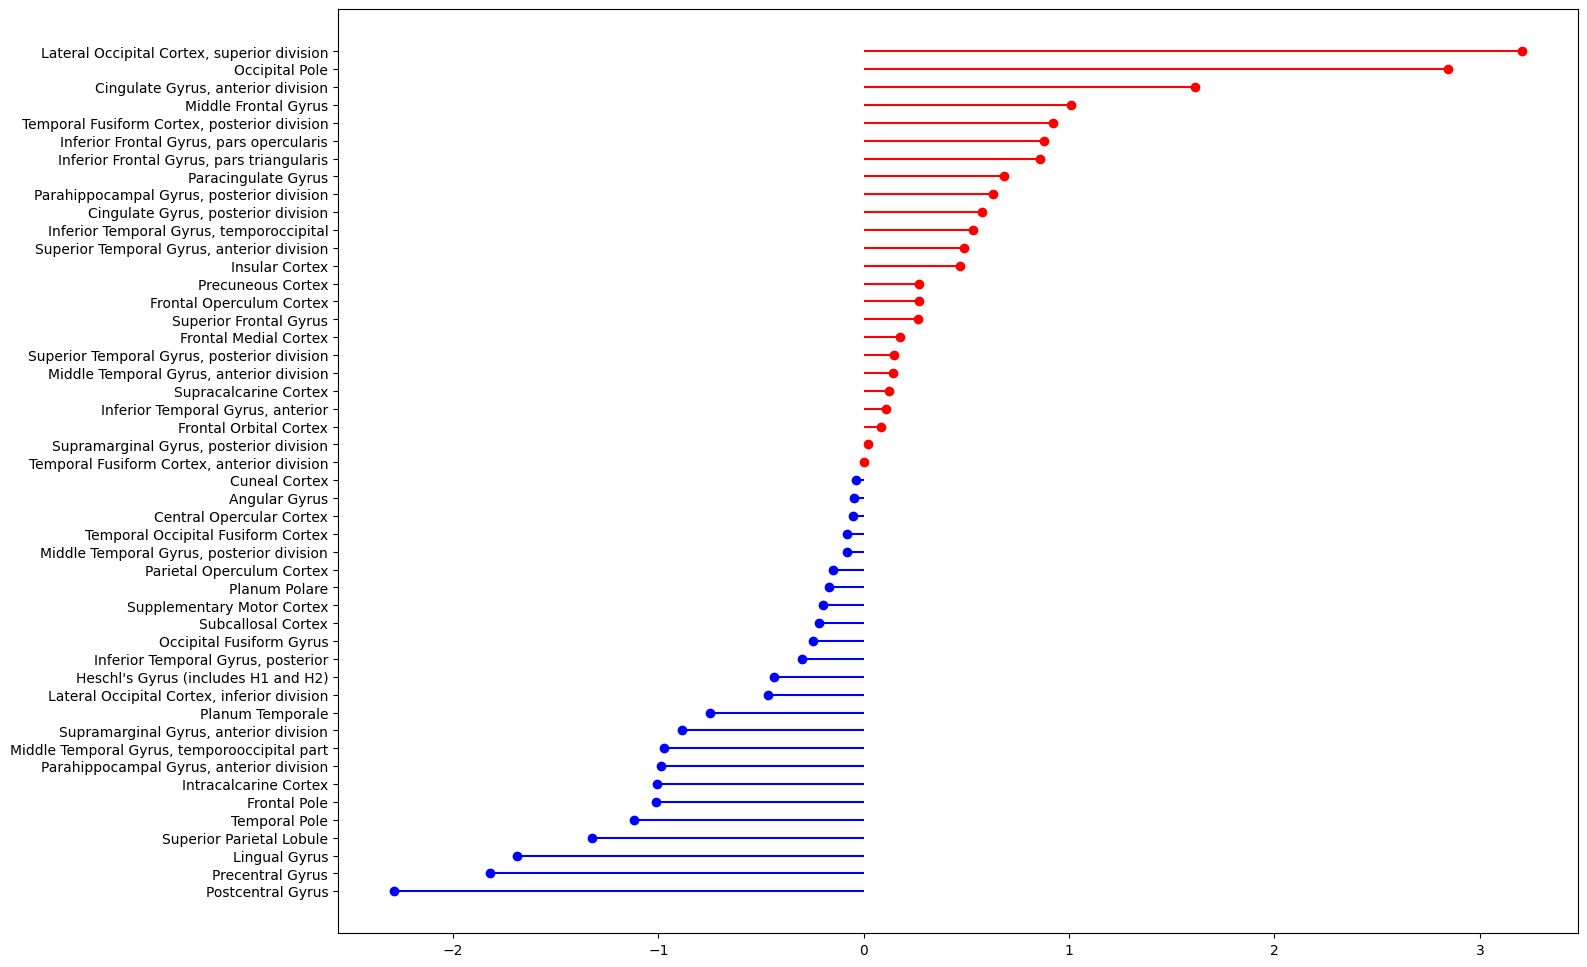

In [228]:
figure_coefficients = plt.figure(figsize=(16, 12))
threshold_plot = 0
for region in range(48):
    if sorted_jbdata['std_coef'].iloc[region] > threshold_plot:
        color_line = 'red'
        plt.hlines(y=sorted_jbdata['oxf_region'].iloc[region], xmin=0, xmax=sorted_jbdata['std_coef'].iloc[region],
                   colors=color_line)
        plt.scatter(x=sorted_jbdata['std_coef'].iloc[region], y=sorted_jbdata['oxf_region'].iloc[region],
                    color=color_line)
    elif sorted_jbdata['std_coef'].iloc[region] < - threshold_plot:
        color_line = 'blue'
        plt.hlines(y=sorted_jbdata['oxf_region'].iloc[region], xmin=0, xmax=sorted_jbdata['std_coef'].iloc[region],
                   colors=color_line)
        plt.scatter(x=sorted_jbdata['std_coef'].iloc[region], y=sorted_jbdata['oxf_region'].iloc[region],
                    color=color_line)
    #plt.gca().set_yticklabels(gm.loc[0].index[1:49])

In [247]:
#jet_brain_im_data = mask_data
std_jet_brain_im_data = np.zeros(mask_data.shape)
for x in range(mask_data.shape[0]):
    for y in range(mask_data.shape[1]):
        for z in range(mask_data.shape[2]):
            if mask_data[x, y, z] == 0:
                0
            else:
                std_jet_brain_im_data[x, y, z] = jet_brain_data1[jet_brain_data1['n. area'] == mask_data[x, y, z]][
                    'std_coef'].values

<ipython-input-247-f46453810985>:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [231]:
import nibabel as nib


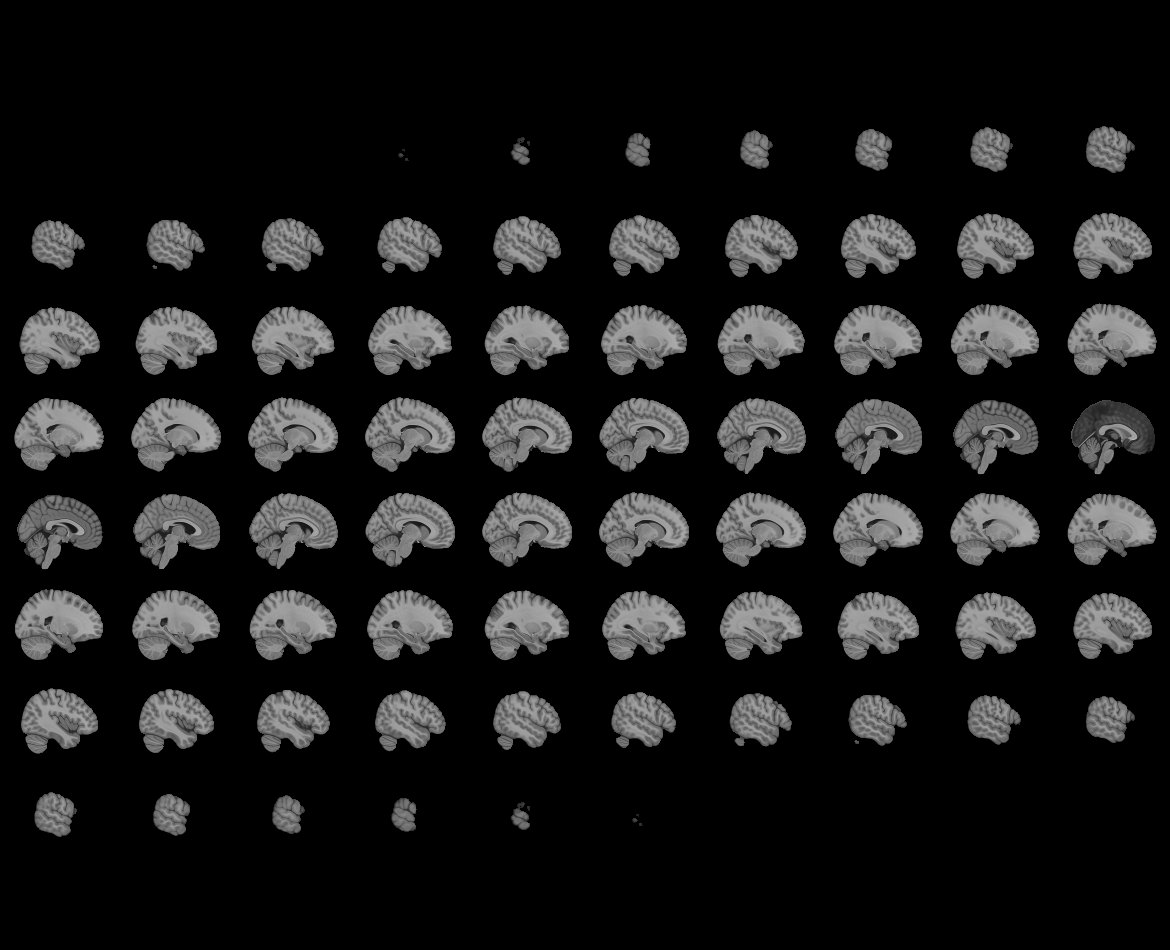
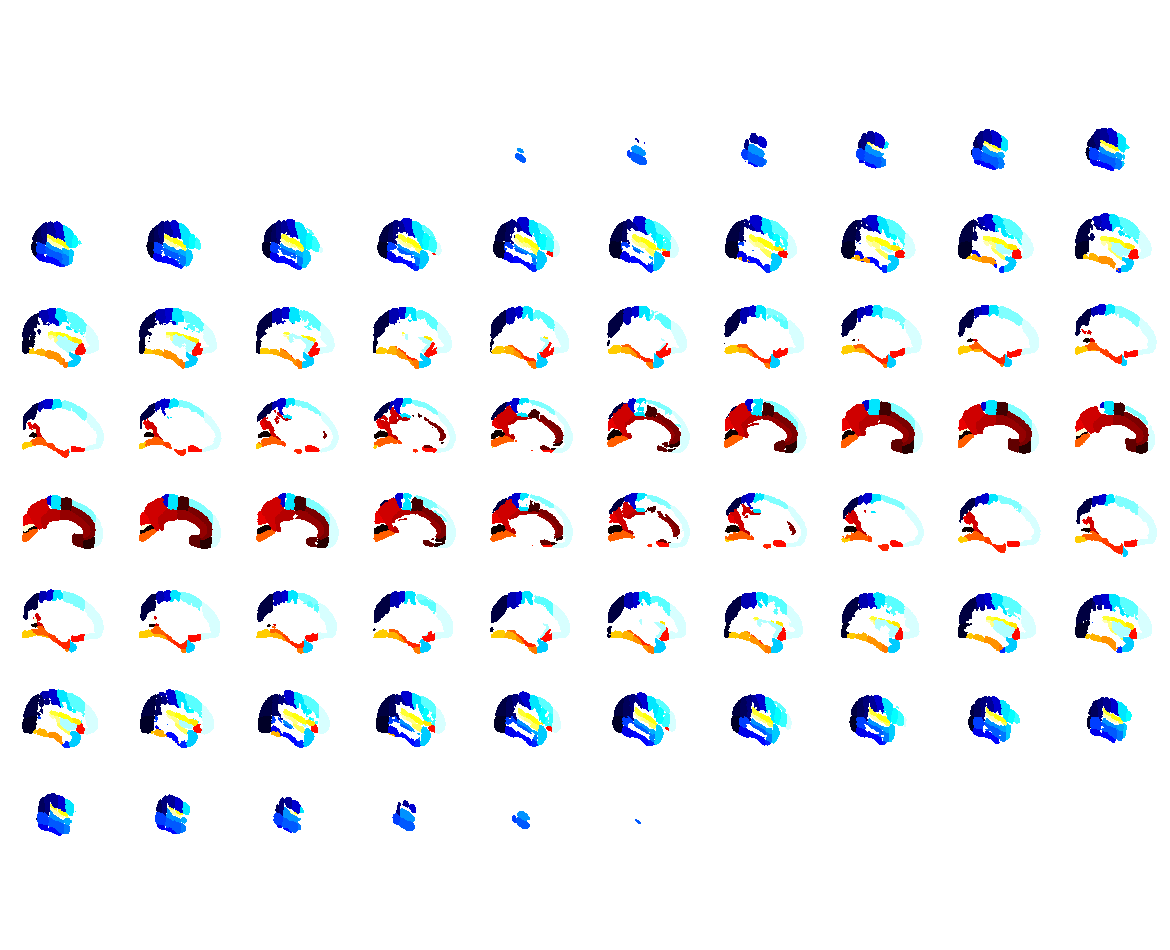

In [232]:
plotting.view_img(mask, black_bg=True, symmetric_cmap=False)

In [248]:
std_jb_img = nib.Nifti2Image(std_jet_brain_im_data, affine=mask.affine)
threshold_jet_brain = 1.5

Below some libraries that help create customized color maps have been imported

In [234]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

In [235]:
colors = [(0, 1, 1),  # Yellow for lowest negative values
          (0, 0, 0.6),  # Red for low values
          (1, 0.25, 0),  # Dark blue for high values
          (1, 1, 0)]  # Light blue for highest values
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:820: UserWarning:





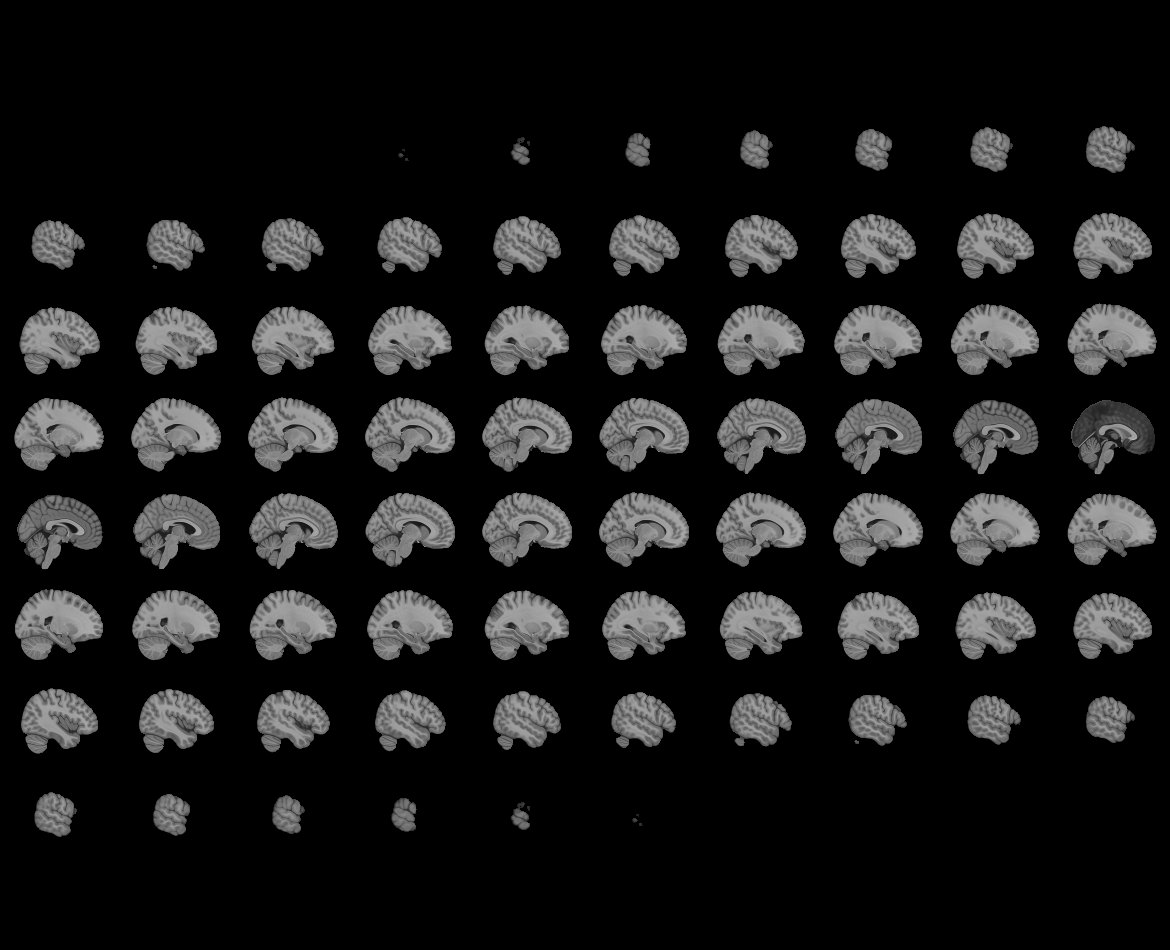
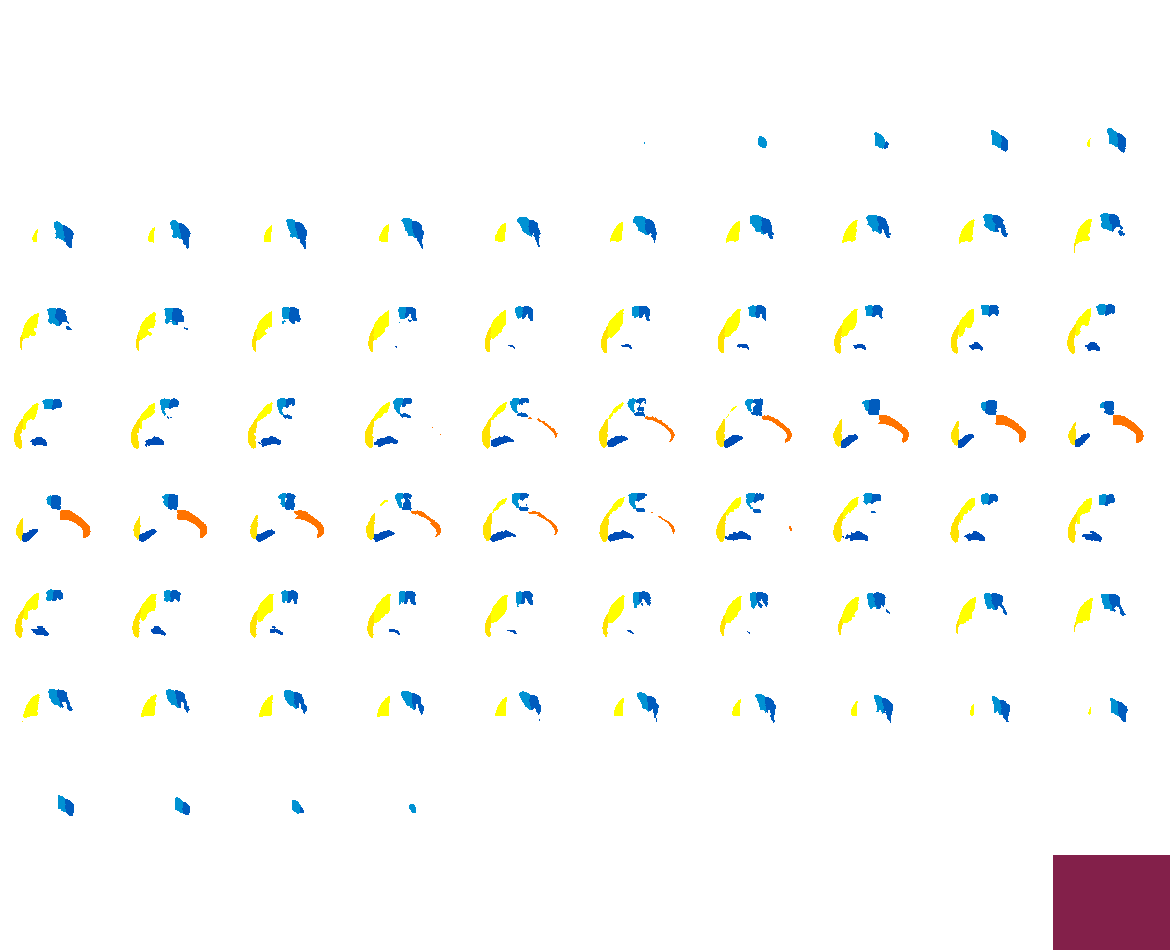

In [236]:
plotting.view_img(std_jb_img, draw_cross=False, threshold=threshold_jet_brain, cut_coords=(2, 16, 18), cmap=custom_cmap)

In [237]:
from nilearn import surface

red to yellow (max) e blue light blue(max)
- standardizzazione con e senza sottrazione media

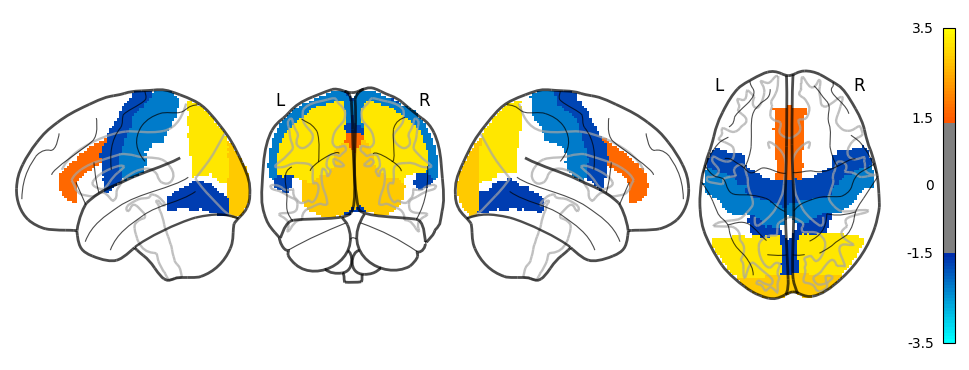

In [249]:
plotting.plot_glass_brain(std_jb_img, plot_abs=False, threshold=threshold_jet_brain, display_mode='lyrz', colorbar=True,
                          vmax=3.5, cmap=custom_cmap)

Jet brain after bootstrapping

In [239]:
#jet_brain_im_data = mask_data
std_jet_brain_im_data = np.zeros(mask_data.shape)
for x in range(mask_data.shape[0]):
    for y in range(mask_data.shape[1]):
        for z in range(mask_data.shape[2]):
            if mask_data[x, y, z] == 0:
                0
            else:
                std_jet_brain_im_data[x, y, z] = jet_brain_data1[jet_brain_data1['n. area'] == mask_data[x, y, z]][
                    'bootstrap_coeff'].values

<ipython-input-239-408de5fdb682>:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [240]:
std_jb_img = nib.Nifti2Image(std_jet_brain_im_data, affine=mask.affine)
threshold_jet_brain = 1.5

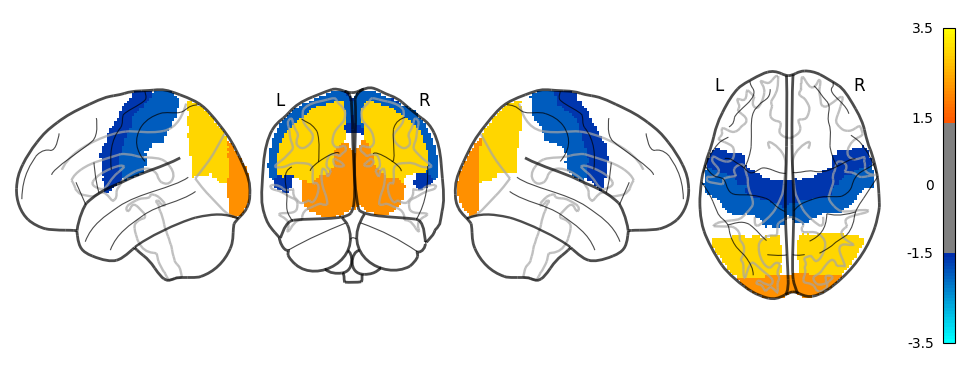

In [242]:
plotting.plot_glass_brain(std_jb_img, plot_abs=False, threshold=threshold_jet_brain, display_mode='lyrz', colorbar=True,
                          vmax=3.5, cmap=custom_cmap)

In [246]:
regions = [
    "Frontal Pole",
    "Insular Cortex",
    "Superior Frontal Gyrus",
    "Middle Frontal Gyrus",
    "Inferior Frontal Gyrus, pars triangularis",
    "Inferior Frontal Gyrus, pars opercularis",
    "Precentral Gyrus",
    "Temporal Pole",
    "Superior Temporal Gyrus, anterior division",
    "Superior Temporal Gyrus, posterior division",
    "Middle Temporal Gyrus, anterior division",
    "Middle Temporal Gyrus, posterior division",
    "Middle Temporal Gyrus, temporooccipital part",
    "Inferior Temporal Gyrus, anterior",
    "Inferior Temporal Gyrus, posterior",
    "Inferior Temporal Gyrus, temporoccipital",
    "Postcentral Gyrus",
    "Superior Parietal Lobule",
    "Supramarginal Gyrus, anterior division",
    "Supramarginal Gyrus, posterior division",
    "Angular Gyrus",
    "Lateral Occipital Cortex, superior division",
    "Lateral Occipital Cortex, inferior division",
    "Intracalcarine Cortex",
    "Frontal Medial Cortex",
    "Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)",
    "Subcallosal Cortex",
    "Paracingulate Gyrus",
    "Cingulate Gyrus, anterior division",
    "Cingulate Gyrus, posterior division",
    "Precuneous Cortex",
    "Cuneal Cortex",
    "Frontal Orbital Cortex",
    "Parahippocampal Gyrus, anterior division",
    "Parahippocampal Gyrus, posterior division",
    "Lingual Gyrus",
    "Temporal Fusiform Cortex, anterior division",
    "Temporal Fusiform Cortex, posterior division",
    "Temporal Occipital Fusiform Cortex",
    "Occipital Fusiform Gyrus",
    "Frontal Operculum Cortex",
    "Central Opercular Cortex",
    "Parietal Operculum Cortex",
    "Planum Polare",
    "Heschl's Gyrus (includes H1 and H2)",
    "Planum Temporale",
    "Supracalcarine Cortex",
    "Occipital Pole"
]